# Εισαγωγή

Στην παρούσα εργασία θα αναλύσουμε δύο γνωστά σύνολα δεδομένων κειμένου: το **BBC News dataset**, το οποίο περιλαμβάνει άρθρα κατηγοριοποιημένα σε 5 θεματικές ενότητες (Business, Entertainment, Politics, Sport, Tech), και το **20 Newsgroups dataset**, το οποίο περιλαμβάνει δεδομένα από 20 διαφορετικές κατηγορίες.

Αρχικά, τα δεδομένα θα μετατραπούν σε αριθμητική μορφή με τη χρήση τεχνικών μετατροπής σε word embeddings: θα χρησιμοποιηθούν μοντέλα όπως το **FastText** και η τεχνική **TF-IDF**. Στη συνέχεια, θα εφαρμοστούν αλγόριθμοι **μη επιβλεπόμενης μάθησης (clustering)** όπως οι **K-Means**, **Agglomerative Clustering** και **HDBSCAN** για την ομαδοποίηση των κειμένων.

Αφού αξιολογήσουμε τα αποτελέσματα των clustering τεχνικών, θα εφαρμόσουμε **PCA** (Principal Component Analysis) από τη βιβλιοθήκη `sklearn` για μείωση της διαστασιμότητας των embeddings, ώστε να επανεκτελέσουμε τους αλγορίθμους clustering πάνω στα μειωμένων διαστάσεων δεδομένα. Τέλος, θα συγκρίνουμε τα αποτελέσματα των αλγορίθμων μετρώντας δείκτες όπως **NMI**, **ARI**, **AMI** και **Silhouette Score**.

Κατέβασα το προεκπαιδευμένο μοντέλο **FastText** από το Gensim γιατί αρχικά θεώρησα ότι μπορεί να χειριστεί άγνωστες λέξεις, κάτι που τελικά δεν ίσχυε. Στην πράξη, δεν κατάφερε να διαχειριστεί λέξεις που δεν υπήρχαν στο δικό του λεξιλόγιο. Παρ’ όλα αυτά, το κράτησα στο project ως ένα παράδειγμα που λειτουργεί αντίστοιχα με το **Word2Vec**. Παρακάτω δίνεται και ένα παράδειγμα όπου φαίνεται ότι το μοντέλο δεν μπορεί να χειριστεί άγνωστες λέξεις, σε αντίθεση με το **custom FastText** που δημιούργησα, το οποίο όντως μπορεί να παράγει embedding ακόμη και για λέξεις που δεν είχε ξαναδεί. Δίνω αντίστοιχα παράδειγμα και για αυτό.

Παρόλο που έχει πλέον τη δυνατότητα να διαχειρίζεται άγνωστες λέξεις, αυτό τελικά δεν είχε μεγάλη σημασία, καθώς μετά την εκπαίδευση του **custom μοντέλου FastText** πάνω στο συγκεκριμένο σύνολο δεδομένων, δεν υπήρχαν πλέον άγνωστες λέξεις — καθώς το μοντέλο εκπαιδεύτηκε ακριβώς πάνω στο υπάρχον λεξιλόγιο.

Στη συνέχεια, εκπαιδεύτηκε ένα νέο μοντέλο **FastText** πάνω στο διαθέσιμο λεξιλόγιο, τόσο με `sg=0` όσο και με `sg=1` (Skip-gram), καθώς παρατηρήθηκε ότι η χρήση `sg=1` οδηγούσε κάποιες φορές σε καλύτερα αποτελέσματα. Για λόγους πληρότητας, παρουσιάζονται και τα δύο μοντέλα, ώστε να φανεί η διαφορά στην επίδοση.

Το **BBC News dataset** αποδείχθηκε σχετικά εύκολο στην κατηγοριοποίηση, καθώς τα 5 του clusters παρουσίαζαν υψηλή διακριτότητα μεταξύ τους. Αντίθετα, το **20 Newsgroups dataset** εμφάνισε σημαντική επικάλυψη μεταξύ κατηγοριών, κάτι που οδήγησε σε χαμηλότερη απόδοση των μοντέλων — τόσο με το προεκπαιδευμένο όσο και με το custom FastText. Σε αυτό το σύνολο, δοκιμάστηκε και η μέθοδος **TF-IDF**, η οποία όμως δεν απέδωσε καλύτερα από τα word embeddings.

Το εργαλείο **t-SNE** χρησιμοποιήθηκε εκτενώς για να εξετάσω κατά πόσο υπάρχουν σαφείς δομές στα δεδομένα. Αποδείχθηκε πολύτιμο όχι για την ταξινόμηση αυτή καθαυτή, αλλά για την κατανόηση της ποιότητας των embeddings και για να εκτιμηθεί αν η προεπεξεργασία έχει διατηρήσει ή καταστρέψει την πληροφορία. Για παράδειγμα, παρατηρήθηκε ότι όταν το t-SNE εφάρμοζε μετασχηματισμό σε δεδομένα μετά από μεγάλο αριθμό components PCA, οι συστάδες χάνονταν ή δημιουργούταν μια κυκλική, “θορυβώδης” δομή — ένδειξη ότι ίσως είχε χαθεί πολύτιμη πληροφορία.

Γενικά, αυτό που αποκόμισα από την εργασία είναι ότι η σωστή ρύθμιση των παραμέτρων κάθε τεχνικής (embedding, PCA, clustering) είναι καθοριστική. Δεν υπάρχει εργαλείο που να “δουλεύει απευθείας” χωρίς πειραματισμό. Το tuning είναι σημαντικό και πρέπει να γίνεται με επίγνωση τόσο του dataset όσο και των ιδιοτήτων κάθε μεθόδου.

Στη συνέχεια, θα φορτωθούν οι απαραίτητες βιβλιοθήκες και θα παρουσιαστούν οι συναρτήσεις που χρησιμοποιούνται σε αυτή την εργασία. **Σημείωση**: Ορισμένες από αυτές τις συναρτήσεις και βιβλιοθήκες προέρχονται από παλαιότερες εργασίες και περιλαμβάνουν επιπλέον στοιχεία που μπορεί να μην αξιοποιηθούν εδώ, αλλά επαναχρησιμοποιούνται και επεκτείνονται με βάση τις ανάγκες κάθε project.

In [1]:
# ===========================
#  Φόρτωση απαραίτητων βιβλιοθηκών
# ===========================

# --- Βασικές βιβλιοθήκες ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# --- Ρυθμίσεις εμφάνισης pandas ---
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

# ===========================
#  Προεπεξεργασία Δεδομένων
# ===========================
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    MaxAbsScaler,
    RobustScaler,
    Normalizer
)

# ===========================
#  Μοντέλα Μηχανικής Μάθησης
# ===========================

# --- Gensim: κατέβασμα προεκπαιδευμένων μοντέλων ή εκπαίδευση δικού μας ---
import gensim.downloader as api
from gensim.models import FastText

# --- Μετατροπή κειμένων σε TF-IDF πίνακα ---
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Εποπτευόμενη μάθηση (Regression) ---
from sklearn.linear_model import LinearRegression

# --- Μη εποπτευόμενη μάθηση (Clustering) ---
from sklearn.cluster import KMeans, AgglomerativeClustering, HDBSCAN
# --- Για δημιουργία δενδρογραμμάτων (hierarchical clustering) ---
from scipy.cluster.hierarchy import dendrogram, linkage as scipy_linkage

# ===========================
#  Αξιολόγηση Μοντέλων
# ===========================

# --- Εργαλεία για train/test split και cross-validation ---
from sklearn.model_selection import train_test_split, cross_val_score

# --- Μετρικές αξιολόγησης clustering και παλινδρόμησης ---
from sklearn.metrics import (
    silhouette_score,
    normalized_mutual_info_score,
    adjusted_mutual_info_score,
    adjusted_rand_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    root_mean_squared_error
)

# --- PCA & t-SNE για μείωση διαστάσεων και οπτικοποίηση ---
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# --- Dataset: 20 Newsgroups (για πειράματα με κείμενα) ---
from sklearn.datasets import fetch_20newsgroups

## Συνάρτηση `download_text_model(api_to_load)`

Η συνάρτηση αυτή χρησιμοποιείται για να **κατεβάσει και να φορτώσει ένα προεκπαιδευμένο μοντέλο κειμένου** (όπως Word2Vec, FastText) από το API της βιβλιοθήκης `gensim.downloader`.

---

#### Είσοδοι:
- `api_to_load` *(str)*:  
  Το όνομα του μοντέλου που θέλουμε να κατεβάσουμε από το `gensim.downloader`.  
  Π.χ. `"fasttext-wiki-news-subwords-300"` ή `"word2vec-google-news-300"`.

---

#### Τι κάνει:
- Εμφανίζει μήνυμα έναρξης λήψης
- Κατεβάζει το επιλεγμένο μοντέλο από το διαδίκτυο
- Εμφανίζει μήνυμα επιτυχούς λήψης
- Επιστρέφει το αντικείμενο του μοντέλου για χρήση στην επεξεργασία φυσικής γλώσσας (NLP)

---

#### Επιστρέφει:
- `pretrained_model`:  
  Το κατεβασμένο προεκπαιδευμένο μοντέλο από το Gensim (π.χ. FastText ή Word2Vec)

---

### Παράδειγμα χρήσης:

```python
from gensim import downloader as api

model = download_text_model("fasttext-wiki-news-subwords-300")

In [2]:
def download_text_model(api_to_load):
    """
    Κατεβάζει και επιστρέφει ένα προεκπαιδευμένο μοντέλο από το Gensim API.
    
    Παραμέτροι:
    -----------
    api_to_load : str
        Το όνομα του μοντέλου όπως είναι διαθέσιμο στο gensim.downloader (π.χ. "fasttext-wiki-news-subwords-300")
    
    Επιστρέφει:
    -----------
    pretrained_model : gensim model
        Το κατεβασμένο μοντέλο
    """
    print(f"\nDownloading pretrained model: {api_to_load} ...")
    print("This may take a few minutes depending on your internet speed.\n")
    
    pretrained_model = api.load(api_to_load)
    
    print("\nModel downloaded successfully.")
    return pretrained_model

## Συνάρτηση `load_data(source='file', filepath=None, dataset_func=None, sheet_name=None)`

Η συνάρτηση αυτή χρησιμοποιείται για να φορτώσει δεδομένα είτε από τοπικό αρχείο (CSV ή Excel), είτε από ενσωματωμένο dataset της βιβλιοθήκης `sklearn.datasets` (π.χ. load_iris, load_wine κ.λπ.).

#### Είσοδοι:
- source (str, προεπιλογή = 'file'): 
  Τύπος πηγής δεδομένων. Επιτρεπτές τιμές:
  - 'file' για αρχεία CSV ή Excel
  - 'sklearn' για ενσωματωμένα datasets από το Scikit-Learn

- filepath (str): 
  Η πλήρης διαδρομή προς το αρχείο (π.χ. 'data/customers.csv'). 
  Χρησιμοποιείται μόνο όταν source='file'.

- dataset_func (function): 
  Η συνάρτηση από το sklearn.datasets (π.χ. load_iris), όταν source='sklearn'.

- sheet_name (str, προαιρετικό): 
  Το όνομα του φύλλου Excel που θέλουμε να φορτώσουμε (αν πρόκειται για αρχείο .xls ή .xlsx). 
  Αν δεν δοθεί, η συνάρτηση εμφανίζει τα διαθέσιμα φύλλα.

Τι κάνει:
- Αν source='file':
  - Αν το αρχείο είναι CSV, το διαβάζει με pandas.read_csv
  - Αν είναι Excel (.xls/.xlsx), διαβάζει το φύλλο που του δίνεται ή εμφανίζει διαθέσιμα φύλλα
- Αν source='sklearn':
  - Φορτώνει το dataset μέσω της αντίστοιχης συνάρτησης sklearn (π.χ. load_iris) και δημιουργεί DataFrame
- Εμφανίζει μήνυμα με τις διαστάσεις του dataset
- Επιστρέφει tuple (df, target), ή (df, None) αν δεν υπάρχουν target labels

### Επιστρέφει:
- df (pandas DataFrame): Τα δεδομένα σε μορφή DataFrame
- target (ndarray ή None): Οι ετικέτες στόχου (αν υπάρχουν)

Παραδείγματα χρήσης:

Φόρτωση από CSV, Excel, sklearn:
```python
df, _ = load_data(source='file', filepath='data/customers.csv')

df, _ = load_data(source='file', filepath='data/dataset.xlsx', sheet_name='Sheet1')

from sklearn.datasets import load_iris
df, target = load_data(source='sklearn', dataset_func=load_iris)

In [3]:
def load_data(source='file', filepath=None,  dataset_func=None, sheet_name=None,):
    """
    Φορτώνει δεδομένα είτε από αρχείο (.csv ή .xls/.xlsx), είτε από ενσωματωμένο dataset του sklearn.

    Parameters:
        source (str): Επιλογή πηγής - 'file' ή 'sklearn'. Προεπιλογή: 'file'.
        filepath (str): Πλήρης διαδρομή του αρχείου (CSV ή Excel) αν source='file'.
        dataset_func (function): Συνάρτηση από sklearn.datasets (π.χ. load_iris) αν source='sklearn'.
        sheet_name (str, optional): Όνομα φύλλου εργασίας αν το αρχείο είναι Excel.

    Returns:
        tuple:
            - df (pd.DataFrame): Τα δεδομένα ως pandas DataFrame.
            - target (np.ndarray or None): Οι ετικέτες στόχου αν υπάρχουν (για sklearn), αλλιώς None.
    """
    if source == 'file':
        if not filepath:
            print("\nΠαρακαλώ δώσε filepath για CSV.")
            return None, None
        try:
            if filepath.endswith('.csv'):
                df = pd.read_csv(filepath)
                print("\nDataset φορτώθηκε από CSV αρχείο:", df.shape)
                return df, None
            elif filepath.endswith(('.xls', '.xlsx')):
                if sheet_name is None:
                    #Εμφάνιση διαθέσιμων sheets
                    xls = pd.ExcelFile(filepath)
                    print("\nΔιαθέσιμα φύλλα εργασίας (sheets):", xls.sheet_names)
                    print("Χρησιμοποίησε το όρισμα sheet_name για να διαλέξεις φύλλο.")
                    return None, None
                else:
                    df = pd.read_excel(filepath, sheet_name=sheet_name)
                    print("\n Dataset φορτώθηκε από XLS/XLSX αρχείο:", df.shape)
                    return df, None
        except Exception as e:
            print("\nΣφάλμα κατά το διάβασμα του αρχείου:", e)
            return None, None

    elif source == 'sklearn':
        if not dataset_func:
            print("\nΠαρακαλώ δώσε συνάρτηση π.χ. load_iris για φόρτωση sklearn dataset.")
            return None, None
        try:
            dataset = dataset_func()
            df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
            target = dataset.target
            print(f"\nDataset φορτώθηκε από sklearn ({dataset_func.__name__}):", df.shape)
            return df, target
        except Exception as e:
            print(f"\nΣφάλμα κατά το φόρτωμα του Dataset:", e)
            return None, None

    else:
        print("\nΜη έγκυρη επιλογή source. Δοκίμασε: 'file' ή 'sklearn'.")
        return None, None

## Συνάρτηση `inspect_data(df)`

Η συνάρτηση αυτή χρησιμοποιείται για μια γρήγορη επισκόπηση του περιεχομένου και της κατάστασης του DataFrame.

### Είσοδοι:
- df (pandas DataFrame):  
  Το DataFrame που θέλουμε να επιθεωρήσουμε.

Τι κάνει:
- Εμφανίζει το σχήμα του πίνακα (αριθμός γραμμών × αριθμός στηλών)
- Εμφανίζει πληροφορίες για τους τύπους δεδομένων και το πλήθος μη-κενών τιμών ανά στήλη (μέσω της `df.info()`)
- Εμφανίζει τις 5 πρώτες γραμμές του DataFrame
- Εμφανίζει περιγραφικά στατιστικά για τις αριθμητικές στήλες (`mean`, `std`, `min`, `max` κ.λπ.)
- Ελέγχει και εμφανίζει το πλήθος των κενών τιμών (`NaN`) ανά στήλη

## Επιστρέφει:
- Δεν επιστρέφει τιμή. Εμφανίζει πληροφορίες στην έξοδο του notebook (print).

Παράδειγμα χρήσης:

```python
inspect_data(df)

In [4]:
def inspect_data(df):
    """
    Εμφανίζει βασικές πληροφορίες για το dataset:
    - Σχήμα (rows, columns)
    - Τύποι δεδομένων & Nans
    - Πρώτες γραμμές
    - Περιγραφικά στατιστικά
    """
    print(f"\nΣχήμα DataFrame: {df.shape}")
    print("\nΠληροφορίες DataFrame:")
    df.info()
    print("\nΠρώτες 5 γραμμές:")
    print(df.head())
    print("\nΠεριγραφικά στατιστικά:")
    print(df.describe())
    print("\nΈλεγχος για Nan:")
    print(df.isna().sum())

## Συνάρτηση `clean_tokenize(text)`

Η συνάρτηση αυτή εκτελεί μια βασική καθαριότητα και tokenization (διάσπαση) ακατέργαστου κειμένου. Είναι χρήσιμη σε προκαταρκτικά βήματα επεξεργασίας φυσικής γλώσσας (NLP), πριν εφαρμοστούν πιο σύνθετες τεχνικές (π.χ. stopword removal, stemming, embeddings).

### Είσοδοι:
- text (str):  
  Ένα ακατέργαστο κείμενο (μια πρόταση ή παράγραφος) σε μορφή συμβολοσειράς.

Τι κάνει:
- Μετατρέπει το κείμενο σε πεζά γράμματα (lowercase)
- Κάνει διάσπαση της πρότασης σε λέξεις (tokens) με βάση τα κενά διαστήματα
- Αφαιρεί τελείες (`.`) και κόμματα (`,`) στο τέλος κάθε λέξης, εφόσον αυτά εμφανίζονται μία φορά στο τέλος
- Επιστρέφει λίστα με τις "καθαρές" λέξεις

## Επιστρέφει:
- clear_tokens (list of str):  
  Λίστα με τις λέξεις του αρχικού κειμένου, σε πεζά γράμματα και χωρίς τελείες/κόμματα στο τέλος.

Παράδειγμα χρήσης:

```python
text = "Ο σκύλος, έτρεξε γρήγορα. Μετά σταμάτησε."
tokens = clean_tokenize(text)
print(tokens)
# ['ο', 'σκύλος', 'έτρεξε', 'γρήγορα', 'μετά', 'σταμάτησε']

In [5]:
def clean_tokenize(text):
    """
    Εκτελεί απλό καθαρισμό και tokenization σε ακατέργαστο κείμενο.

    Τι κάνει:
    - Μετατρέπει όλα τα γράμματα σε πεζά
    - Διασπά το κείμενο σε λέξεις (tokens) με βάση τα κενά
    - Αφαιρεί τελείες (.) ή κόμματα (,) στο τέλος κάθε λέξης, αν υπάρχουν μόνο μία φορά

    Είσοδοι:
        text (str): Το αρχικό κείμενο (σε μορφή string)

    Επιστρέφει:
        clear_tokens (list of str): Λίστα με τις καθαρές λέξεις, χωρίς σημεία στίξης στο τέλος.
    """
    text = text.lower()
    tokens = text.split()
    clear_tokens = []
    
    for word in tokens:
        
        if word.endswith(".") and word.count(".") == 1:
            word = word.rstrip(".")
            
        if word.endswith(",") and word.count(",") == 1:
           word = word.rstrip(",")
            
        clear_tokens.append(word)
        
    return clear_tokens

Σε αυτό το βήμα δημιουργώ μια συνάρτηση που ονομάζω `token_vectorized`, η οποία μετατρέπει κάθε έγγραφο σε διάνυσμα (vector) υπολογίζοντας τον μέσο όρο των embeddings των λέξεων που περιέχει. Η συνάρτηση παίρνει ως είσοδο ένα DataFrame, το όνομα της στήλης που περιέχει τις tokenized λέξεις, και το μοντέλο embeddings που θέλω να χρησιμοποιήσω (π.χ. FastText ή Word2Vec).

Μέσα στη συνάρτηση, για κάθε λίστα tokens:
- ελέγχω αν η λέξη υπάρχει στο λεξιλόγιο του μοντέλου (`if word in model`)
- αν υπάρχει, προσθέτω το διάνυσμά της στη λίστα
- αν δεν υπάρχει, την αγνοώ

Θεωρητικά, το FastText υποστηρίζει out-of-vocabulary λέξεις δημιουργώντας διανύσματα βάσει χαρακτήρων (n-grams). Όμως, το προεκπαιδευμένο μοντέλο `"fasttext-wiki-news-subwords-300"` που κατεβάζω από το Gensim API **δεν υποστηρίζει αυτή τη δυνατότητα**. Περιέχει μόνο τις λέξεις του λεξιλογίου του, και αν προσπαθήσω να ανακτήσω embedding για άγνωστη λέξη, προκαλείται σφάλμα τύπου:
```python
KeyError: "Key 'worldcom' not present"
```
Γι’ αυτόν τον λόγο, μέσα στη συνάρτηση χρησιμοποιώ τη γραμμή:

```python
if word in model:

## Συνάρτηση `token_vectorized(df, feature_name, model, handles_uw=False)`

Η συνάρτηση αυτή χρησιμοποιείται για να μετατρέψει λίστες tokens (λέξεων) σε **διανύσματα εγγράφων**, χρησιμοποιώντας ένα προεκπαιδευμένο μοντέλο τύπου **Word2Vec ή FastText**.

### Είσοδοι:
- df (pandas DataFrame):  
  Το DataFrame που περιέχει στήλη με λίστες από tokens.

- feature_name (str):  
  Το όνομα της στήλης που περιέχει τις λίστες λέξεων (tokens), π.χ. `'tokens'`.

- model (gensim model):  
  Το embedding μοντέλο που παρέχει τα διανύσματα λέξεων (Word2Vec, FastText κ.λπ.).

- handles_uw (bool):  
  Αν το μοντέλο υποστηρίζει άγνωστες λέξεις (unknown words), θέτουμε `True`.  
  Αν είναι ένα απλό Word2Vec μοντέλο χωρίς OOV υποστήριξη, δίνουμε `False`.

Τι κάνει:
- Επαναλαμβάνει για κάθε έγγραφο και αναζητά τα embeddings των λέξεών του
- Αν βρεθούν έγκυρα embeddings, υπολογίζει τον μέσο όρο και τον αποθηκεύει ως διάνυσμα εγγράφου
- Αν δεν υπάρχει καμία έγκυρη λέξη, δημιουργεί μηδενικό διάνυσμα ίδιου μήκους
- Επιστρέφει ένα νέο DataFrame με όλα τα διανύσματα εγγράφων (ένα ανά γραμμή)

## Επιστρέφει:
- df_vectors (pandas DataFrame):  
  DataFrame στο οποίο κάθε γραμμή είναι το μέσο όρο των word embeddings του αντίστοιχου εγγράφου.

Παράδειγμα χρήσης:

```python
vectors_df = token_vectorized(df, feature_name='tokens', model=fasttext_model)

In [6]:
def token_vectorized(df, feature_name, model, handles_uw=False):
    """
    Υπολογίζει τα διανύσματα εγγράφων με βάση τα tokens κάθε εγγραφής
    και ένα προεκπαιδευμένο ή custom μοντέλο τύπου Word2Vec ή FastText.

    Τι κάνει:
    - Για κάθε λίστα λέξεων (tokens) υπολογίζει το μέσο όρο των word embeddings
    - Αν το μοντέλο δεν υποστηρίζει άγνωστες λέξεις, ελέγχει αν η λέξη υπάρχει στο λεξικό
    - Αν δεν βρεθεί καμία έγκυρη λέξη για ένα έγγραφο, δημιουργεί μηδενικό διάνυσμα

    Είσοδοι:
        df (pd.DataFrame): Το αρχικό DataFrame που περιέχει τις λίστες tokens.
        feature_name (str): Το όνομα της στήλης που περιέχει τις λίστες λέξεων.
        model: Το embedding μοντέλο (π.χ. gensim Word2Vec, FastText).
        handles_uw (bool): Αν το μοντέλο υποστηρίζει unknown words (π.χ. custom FastText), δώσε True.

    Επιστρέφει:
        df_vectors (pd.DataFrame): Νέο DataFrame όπου κάθε γραμμή είναι ένα διάνυσμα εγγράφου.

    Παράδειγμα:
        >>> vectors_df = token_vectorized(df, feature_name='tokens', model=fasttext_model)
    """
    # Τελική λίστα που θα περιέχει τα διανύσματα των εγγράφων
    document_vectors = []

    # Επανάληψη σε κάθε κείμενο στο DataFrame
    for tokens in df[feature_name]:
        valid_vectors = [] # Προσωρινή λίστα για τα έγκυρα διανύσματα των λέξεων

        for word in tokens:
            if handles_uw:
                # Αν το μοντέλο υποστηρίζει άγνωστες λέξεις, δεν χρειάζεται έλεγχος
                valid_vectors.append(model.wv[word])
            else:
                # Αν ΔΕΝ τις υποστηρίζει, ελέγχω αν υπάρχει η λέξη στο λεξικό
                if word in model:
                    valid_vectors.append(model[word])

        # Υπολογίζω το μέσο όρο όλων των έγκυρων word vectors για να πάρω το document vector
        if valid_vectors:
            document_vector = np.mean(valid_vectors, axis=0)
        else:
            # Αν δεν βρέθηκε καμία έγκυρη λέξη, δημιουργώ μηδενικό διάνυσμα
            document_vector = np.zeros(model.vector_size)

        document_vectors.append(document_vector) # Προσθέτω το διάνυσμα στη λίστα

    # Επιστρέφω όλα τα διανύσματα σε μορφή DataFrame
    df_vectors = pd.DataFrame(document_vectors)
    return df_vectors

## Συνάρτηση `evaluate_kmeans_range(X, k_range=range(2,11), init_method="k-means++", n_init=10, max_iter=300, tol=1e-4, random_state=42)`

Η συνάρτηση εφαρμόζει τον αλγόριθμο KMeans για ένα εύρος τιμών `k` (αριθμός clusters), αξιολογεί τα αποτελέσματα με τις μεθόδους **Elbow** και **Silhouette**, και εμφανίζει τα αντίστοιχα διαγράμματα.

#### Είσοδοι:
  - `X`: τα αριθμητικά δεδομένα για clustering (NumPy array ή pandas DataFrame)
  - `k_range`: εύρος τιμών του k που θα δοκιμαστούν (default: `range(2, 11)`)
  - `init_method`: τρόπος αρχικοποίησης των κέντρων (`"k-means++"`, `"random"` ή array-like)
  - `n_init`: πόσες φορές θα γίνει επανεκκίνηση με διαφορετικά αρχικά κέντρα (default: 10)
  - `max_iter`: μέγιστος αριθμός επαναλήψεων για κάθε εκτέλεση (default: 300)
  - `tol`: όριο ανοχής για τερματισμό της σύγκλισης (default: 1e-4)
  - `random_state`: σταθερός σπόρος για επαναληψιμότητα (default: 42)

- **Τι κάνει**:
  - Εκτελεί KMeans για κάθε `k` στο `k_range`
  - Υπολογίζει και αποθηκεύει το `inertia` για το Elbow Plot
  - Υπολογίζει το `silhouette score` για κάθε `k ≥ 2`
  - Εμφανίζει δύο διαγράμματα: Elbow και Silhouette καθώς και το μέγιστο k και Silhouette score

### Επιστρέφει:
  - Δεν επιστρέφει τιμή.  
    Η συνάρτηση απλώς εμφανίζει γραφήματα αξιολόγησης για την επιλογή του κατάλληλου `k`.

Παράδειγμα χρήσης:

```python
evaluate_kmeans_range(df_scaled, k_range=range(2, 11))

In [7]:
def evaluate_kmeans_range(df, k_range=range(2,11), init_method="k-means++", n_init=10, max_iter=300, tol=1e-4, random_state=42):
    """
    Εκτελεί KMeans για διαφορετικά k και εμφανίζει Elbow & Silhouette Score γραφήματα.
    
    Parameters:
        df (array-like): Τα αριθμητικά δεδομένα για clustering (NumPy array ή DataFrame).
        k_range (range): Εύρος τιμών k προς αξιολόγηση. (default: 2-11).
        init_method (str): Τρόπος αρχικοποίησης ('k-means++', 'random' ή array-like) (default: 'k-means++').
        n_init (int): Πλήθος επαναλήψεων με διαφορετικά αρχικά κέντρα (default: 10).
        max_iter (int): Μέγιστος αριθμός επαναλήψεων για κάθε εκτέλεση (default: 300).
        tol (float): Κατώφλι για τον τερματισμό σύγκλισης (default: 1e-4).
        random_state (int): Τυχαίος σπόρος για επαναληψιμότητα (default: 42).
    
    Returns:
        None
    """
    # Λίστες για το Elbow plot
    elbow_k = []
    elbow_inertia = []
    
    # Λίστες για το Silhouette plot
    silhouette_k = []
    silhouette_scores = []

    for k in k_range:
        if k < 1:
            print(f"\nΤο k πρέπει να είναι ≥ 1. Παραλείπεται: k={k}")
            continue
    
        model = KMeans(
            n_clusters=k,
            init=init_method,
            n_init=n_init,
            max_iter=max_iter,
            tol=tol,
            random_state=random_state
        )
    
        labels = model.fit_predict(df)
    
        # Καταγραφή για Elbow plot
        elbow_k.append(k)
        elbow_inertia.append(model.inertia_)
    
        # Καταγραφή για Silhouette μόνο αν k >= 2
        if k == 1:
            print("\nΤο Silhouette Score δεν ορίζεται για k=1.")
        else:
            score = silhouette_score(df, labels)
            silhouette_k.append(k)
            silhouette_scores.append(score)

    best_score = max(silhouette_scores)
    best_k = silhouette_k[silhouette_scores.index(best_score)]
    print(f"\nΒέλτιστο Silhouette Score: {best_score:.4f} για k = {best_k}")
    
    # Elbow plot
    plt.figure(figsize=(8, 6))
    plt.plot(elbow_k, elbow_inertia, marker='o', linestyle='--', color='b')
    plt.title("Elbow Method for Optimal K")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.xticks(elbow_k)
    plt.grid()
    plt.show()
    
    # Silhouette plot
    plt.figure(figsize=(8, 6))
    plt.plot(silhouette_k, silhouette_scores, marker='o', linestyle='--', color='g')
    plt.title("Silhouette Method for Optimal K")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.xticks(silhouette_k)
    plt.grid()
    plt.show()

## Συνάρτηση `run_kmeans(df, n_clusters=8, init_method='k-means++', n_init=10, max_iter=300, tol=1e-4, random_state=42, compute_score=True)`

Η συνάρτηση εκπαιδεύει το μοντέλο KMeans με βάση τα δεδομένα `X` και τις παραμέτρους που δίνονται, και εμφανίζει βασικά αποτελέσματα του clustering (κέντρα, ετικέτες, inertia).

### Είσοδοι:
  - `df`: τα αριθμητικά δεδομένα για clustering (NumPy array ή pandas DataFrame)
  - `n_clusters`: αριθμός των clusters που θα δημιουργηθούν (default: 8)
  - `init_method`: τρόπος αρχικοποίησης των κέντρων (`'k-means++'`, `'random'`, ή array-like)
  - `n_init`: αριθμός επανεκκινήσεων με διαφορετικά αρχικά κέντρα (default: 10)
  - `max_iter`: μέγιστος αριθμός επαναλήψεων για κάθε εκτέλεση (default: 300)
  - `tol`: κατώφλι για την ολοκλήρωση της σύγκλισης (default: 1e-4)
  - `random_state`: σταθερός σπόρος για επαναληψιμότητα (default: 42)
  - `compute_score`: (bool): Αν θα υπολογιστεί και τυπωθεί το Silhouette Score (default: True).

- **Τι κάνει**:
  - Εκπαιδεύει KMeans με βάση τα δεδομένα και τις παραμέτρους
  - Εμφανίζει:
    - την τιμή του inertia

### Επιστρέφει:
  - Το εκπαιδευμένο αντικείμενο `kmeans`, το οποίο μπορεί να χρησιμοποιηθεί για περαιτέρω προβλέψεις ή ανάλυση
 
Παράδειγμα χρήσης:

```python
kmeans_model = run_kmeans(df_scaled, n_clusters=3)

In [8]:
def run_kmeans(df, n_clusters=8, init_method='k-means++', n_init=10, max_iter=300, tol=1e-4, random_state=42, compute_score=True):
    """
    Εκπαιδεύει το μοντέλο KMeans με τα δεδομένα και επιστρέφει το μοντέλο και τις ετικέτες.

    Parameters:
        df (array-like): Τα αριθμητικά δεδομένα για clustering (NumPy array ή DataFrame).
        n_clusters (int): Αριθμός των clusters.
        init_method (str): Τρόπος αρχικοποίησης ('k-means++', 'random' ή array-like) (default: 'k-means++').
        n_init (int): Πλήθος επαναλήψεων με διαφορετικά αρχικά κέντρα (default: 10).
        max_iter (int): Μέγιστος αριθμός επαναλήψεων για κάθε εκτέλεση (default: 300).
        tol (float): Κατώφλι για τον τερματισμό σύγκλισης (default: 1e-4)..
        random_state (int): Τυχαίος σπόρος για επαναληψιμότητα (default: 42).
        compute_score (bool): Αν θα υπολογιστεί και τυπωθεί το Silhouette Score (default: True).

    Returns:
        kmeans (KMeans): Το εκπαιδευμένο μοντέλο.
    """
    kmeans=KMeans(
        n_clusters=n_clusters,
        init=init_method,
        n_init=n_init,
        max_iter=max_iter,
        tol=tol,
        random_state=random_state
    )

    kmeans.fit(df)
    #print("Cluster Centers:\n", kmeans.cluster_centers_)
    #print("Labels:\n", kmeans.labels_)
    print("Inertia:\n", kmeans.inertia_)

    # === Υπολογισμός Silhouette Score ===
    if compute_score and len(set(kmeans.labels_)) > 1:
        score = silhouette_score(df, kmeans.labels_)
        print(f"Silhouette Score: {score:.4f}")
    
    return kmeans

## Συνάρτηση `plot_dendrogram_only(df)`

Η συνάρτηση δημιουργεί **dendrogram** ιεραρχικής ομαδοποίησης με χρήση της `scipy`.

#### Είσοδοι:
- `df`: `DataFrame` με αριθμητικά δεδομένα (συνήθως κανονικοποιημένα)
- `linkage_method`: μέθοδος σύνδεσης (`'ward'`, `'complete'`, `'average'`, `'single'`)
- `metric`: τύπος απόστασης (`'euclidean'`, `'manhattan'`, κ.ά.)
- `figsize`: διαστάσεις γραφήματος (default: `(12, 6)`)
- `title`: τίτλος γραφήματος
- `truncate_lastp`: (προαιρετικό) Αν δοθεί ακέραιος αριθμός `p`, εμφανίζει μόνο τα **τελευταία p merges** στο dendrogram.


    Τι κάνει:
- Εκτελεί `scipy.linkage` με τις επιλεγμένες παραμέτρους
- Εμφανίζει δενδρόγραμμα που απεικονίζει τη συγχώνευση των clusters
- Αν έχει οριστεί `truncate_lastp`, εμφανίζει συμπτυγμένη εκδοχή με τα πιο πρόσφατα merges.
- Το γράφημα **δεν εμφανίζει ετικέτες** (`no_labels=True`) για καθαρότερη απεικόνιση.

Χρήσιμο για **οπτική κατανόηση της δομής** του dataset πριν την επιλογή `k`.

Παράδειγμα χρήσης:

```python
plot_dendrogram_only(df_scaled, linkage_method="ward", metric="euclidean", truncate_lastp=20)

In [9]:
def plot_dendrogram_only(df, linkage_method='ward', metric='euclidean', figsize=(12, 6), title="Dendrogram", truncate_lastp=None):
    """
    Δημιουργεί dendrogram για το DataFrame με ιεραρχική ομαδοποίηση.

    Parameters:
        df (pd.DataFrame): Τα δεδομένα (συνήθως κανονικοποιημένα αριθμητικά).
        linkage_method (str): Μέθοδος σύνδεσης ('ward', 'complete', 'average', 'single').
        metric (str): Απόσταση ('euclidean', 'manhattan', κ.ά.)
        figsize (tuple): Διαστάσεις γραφήματος.
        title (str): Τίτλος του γραφήματος.
        truncate_lastp (int or None): Αν δοθεί, εμφανίζει μόνο τα τελευταία p merges.

    Returns:
        None
    """
    linked = scipy_linkage(df, method=linkage_method, metric=metric)

    plt.figure(figsize=figsize)
    
    if truncate_lastp:
        dendrogram(linked, no_labels=True, truncate_mode='lastp', p=truncate_lastp)
    else:
        dendrogram(linked, no_labels=True)
    
    plt.title(title)
    plt.xlabel("Δείγματα")
    plt.ylabel("Απόσταση συγχώνευσης")
    plt.grid(True)
    plt.show()

### Συνάρτηση `evaluate_agglomerative_range(df, k_range=range(2,11), linkage='ward', metric='euclidean', show_scores=True)`

Η συνάρτηση εφαρμόζει τον αλγόριθμο ιεραρχικού συσταδοποίησης (Agglomerative Clustering) για μια σειρά από τιμές `k` (αριθμός clusters), υπολογίζει το **Silhouette Score** για κάθε k και εμφανίζει σχετικό διάγραμμα.

#### Είσοδοι:
- `df`: (DataFrame ή array-like)  
  Τα αριθμητικά, κανονικοποιημένα δεδομένα που θα χρησιμοποιηθούν στο clustering.

- `k_range`: (προεπιλογή: `range(2, 11)`)  
  Εύρος τιμών του k (αριθμός clusters) που θα αξιολογηθούν.

- `linkage`: (`'ward'`, `'complete'`, `'average'`, `'single'`)  
  Τρόπος σύνδεσης για την ιεραρχική συγχώνευση.  
  Αν επιλεγεί `'ward'`, η απόσταση πρέπει να είναι `'euclidean'`.

- `metric`: (προεπιλογή: `'euclidean'`)  
  Τύπος απόστασης που χρησιμοποιείται για τη μέτρηση ομοιότητας μεταξύ παρατηρήσεων.

- `show_scores**: (bool, προεπιλογή: `True`)  
  Αν είναι `True`, εμφανίζει γράφημα με τα Silhouette Scores για κάθε k.

    Τι κάνει:
- Εκτελεί Agglomerative Clustering για κάθε k στην περιοχή `k_range`.
- Υπολογίζει το **Silhouette Score** για κάθε k ≥ 2.
- Εμφανίζει το **βέλτιστο k** με βάση το μέγιστο Silhouette Score.
- Παράγει γράφημα για την εύρεση του κατάλληλου αριθμού συστάδων (clusters).

### Επιστρέφει:
Δεν επιστρέφει τιμή (`None`). Στόχος είναι η αξιολόγηση και οπτικοποίηση της ποιότητας clustering για κάθε τιμή του k.

    Παράδειγμα χρήσης:

```python
evaluate_agglomerative_range(df_scaled, k_range=range(2, 11), linkage="ward", metric="euclidean")

In [10]:
def evaluate_agglomerative_range(
    df,
    k_range=range(2, 11),
    linkage='ward',
    metric='euclidean',
    show_scores=True
    ):
    """
    Εκτελεί Agglomerative Clustering για κάθε k στο k_range,
    υπολογίζει το Silhouette Score και εμφανίζει γραφικό με τα αποτελέσματα.

    Parameters:
        df (pd.DataFrame ή array-like): Κανονικοποιημένα αριθμητικά δεδομένα για clustering.
        k_range (range): Εύρος τιμών k προς αξιολόγηση (default: range(2,11)).
        linkage (str): Τύπος σύνδεσης ('ward', 'complete', 'average', 'single').
        metric (str): Απόσταση μεταξύ σημείων ('euclidean', 'manhattan', κ.ά.). 
                      Αν linkage='ward', πρέπει να είναι 'euclidean'.
        show_scores (bool): Αν True, εμφανίζεται γραφικό με τα Silhouette Scores.

    Returns:
        None.
    """
    silhouette_k = []         # Θα κρατά τα k που δοκιμάσαμε
    silhouette_scores = []    # Θα κρατά το score κάθε k

    for k in k_range:
        if k < 2:
            print(f"\nΤο k πρέπει να είναι ≥ 2 για υπολογισμό Silhouette. Παραλείπεται: k={k}")
            continue
        
        # Δημιουργία και fit μοντέλου Agglomerative Clustering
        model = AgglomerativeClustering(
            n_clusters=k,
            linkage=linkage,
            metric=metric
        )

        labels = model.fit_predict(df)

        # Υπολογισμός Silhouette Score
        score = silhouette_score(df, labels)
        silhouette_k.append(k)
        silhouette_scores.append(score)

    # Εύρεση του βέλτιστου k με βάση το μεγαλύτερο Silhouette Score
    best_score = max(silhouette_scores)
    best_k = silhouette_k[silhouette_scores.index(best_score)]
    print(f"\nΒέλτιστο Silhouette Score: {best_score:.4f} για k = {best_k}")

    # === Οπτικοποίηση ===
    if show_scores:
        plt.figure(figsize=(8, 6))
        plt.plot(silhouette_k, silhouette_scores, marker='o', linestyle='--', color='g')
        plt.title("Silhouette Method for Optimal K (Agglomerative)")
        plt.xlabel("Number of Clusters (k)")
        plt.ylabel("Silhouette Score")
        plt.xticks(silhouette_k)
        plt.grid()
        plt.show()

    return None

## Συνάρτηση `run_agglomerative_clustering(df, n_clusters=2, metric='euclidean', compute_full_tree = 'auto', linkage = 'ward', distance_threshold = None, show_dendrogram = False, compute_score = True)`

Η συνάρτηση εφαρμόζει **ιεραρχική ομαδοποίηση (Agglomerative Clustering)** σε κανονικοποιημένα δεδομένα, με δυνατότητα εμφάνισης **δενδρογράμματος** και υπολογισμού **Silhouette Score**.

#### Είσοδοι:
- `df`: `DataFrame` με αριθμητικά κανονικοποιημένα δεδομένα
- `n_clusters`: αριθμός clusters (χρησιμοποιείται αν δεν δοθεί `distance_threshold`)
- `metric`: τύπος απόστασης (`'euclidean'`, `'manhattan'` κ.ά.)
- `compute_full_tree`: αν θα υπολογιστεί ολόκληρο το δέντρο (απαραίτητο όταν υπάρχει `distance_threshold`)
- `linkage`: μέθοδος σύνδεσης (`'ward'`, `'complete'`, `'average'`, `'single'`)
- `distance_threshold`: όριο απόστασης για συγχώνευση, εναλλακτικό του `n_clusters`
- `show_dendrogram`: αν είναι `True`, εμφανίζεται δενδρόγραμμα μέσω `scipy`
- `compute_score`: αν είναι `True`, υπολογίζεται και εμφανίζεται το **Silhouette Score**

### Επιστρέφει:
- `model` (AgglomerativeClustering): Το εκπαιδευμένο μοντέλο Agglomerative Clustering.

    Παράδειγμα χρήσης:

```python
agg_model = run_agglomerative_clustering(df_scaled, n_clusters=3, show_dendrogram=True)

In [11]:
def run_agglomerative_clustering(
    df,
    n_clusters=2,
    metric='euclidean',
    compute_full_tree = 'auto',
    linkage = 'ward',
    distance_threshold = None,
    show_dendrogram = False,
    compute_score = True
    ):
    """
    Εκτελεί Agglomerative Clustering με δυνατότητα εμφάνισης dendrogram και υπολογισμού Silhouette Score.

    Parameters:
        df (pd.DataFrame): Τα κανονικοποιημένα αριθμητικά δεδομένα.
        n_clusters (int): Αριθμός των clusters (παραλείπεται αν δοθεί distance_threshold).
        metric (str): Απόσταση ('euclidean', 'manhattan', κ.ά.).
        compute_full_tree (str or bool): Υπολογισμός πλήρους δέντρου αν χρησιμοποιηθεί distance_threshold.
        linkage (str): Μέθοδος σύνδεσης ('ward', 'complete', 'average', 'single').
        distance_threshold (float): Εναλλακτικά του n_clusters, όριο απόστασης για συγχώνευση.
        show_dendrogram (bool): Αν True, εμφανίζει το dendrogram χρησιμοποιώντας scipy.
        compute_score (bool): Αν True και υπάρχουν >1 clusters, υπολογίζει Silhouette Score.

    Returns:
        model (AgglomerativeClustering): Το εκπαιδευμένο μοντέλο Agglomerative Clustering.
    """
    labels = None

    # === Αν ζητήθηκε dendrogram ===
    if show_dendrogram:
        link = scipy_linkage(df, method=linkage, metric=metric)
        plt.figure(figsize=(12,6))
        dendrogram(link)
        plt.title("Dendrogram - Hierarchical Clustering")
        plt.xlabel("Δείγματα")
        plt.ylabel("Απόσταση συγχώνευσης")
        plt.grid(True)
        plt.show()

    # === Αν δεν δόθηκαν ούτε clusters ούτε threshold, σταματάμε ===
    if n_clusters is None and distance_threshold is None:
        print("\nΠρέπει να δοθεί είτε n_clusters είτε distance_threshold.")
        return None

    # === Δημιουργία μοντέλου ===
    model = AgglomerativeClustering(
        distance_threshold=distance_threshold,
        n_clusters=n_clusters,
        linkage=linkage,
        metric=metric,
        compute_full_tree=compute_full_tree,
        )

    # === Εκπαίδευση ===
    labels = model.fit_predict(df)

    # === Υπολογισμός Silhouette Score ===
    if compute_score and len(set(labels)) > 1:
        score = silhouette_score(df, labels)
        print(f"\nSilhouette Score: {score:.4f}")

    return model

### Συνάρτηση `run_hdbscan_clustering(df, min_cluster_size=5, ...)`

Η συνάρτηση εφαρμόζει τον αλγόριθμο **HDBSCAN** για ομαδοποίηση (clustering) δεδομένων, με δυνατότητα εμφάνισης του **Silhouette Score** και της **κατανομής πιθανοτήτων συσχέτισης** των σημείων με τα clusters τους.

---

#### Είσοδοι (Parameters):

- `df` *(pd.DataFrame)*: Τα κανονικοποιημένα αριθμητικά δεδομένα που θα υποβληθούν σε clustering.
- `min_cluster_size` *(int)*: Ελάχιστο πλήθος σημείων για να σχηματιστεί ένα cluster.
- `min_samples` *(int ή None)*: Χρήσιμο για outlier detection. Αν είναι `None`, ισούται με `min_cluster_size`.
- `cluster_selection_epsilon` *(float)*: Απόσταση μέσα στην οποία επιτρέπεται η συγχώνευση παρόμοιων clusters.
- `metric` *(str)*: Απόσταση για υπολογισμούς, π.χ. `'euclidean'`, `'manhattan'`.
- `alpha` *(float)*: Σταθερά regularization για το MST.
- `cluster_selection_method` *(str)*: `'eom'` ή `'leaf'`, ελέγχει το πώς επιλέγονται τα τελικά clusters.
- `show_probabilities` *(bool)*: Αν είναι `True`, εμφανίζει **ιστογράφημα** με την **κατανομή των πιθανοτήτων συμμετοχής** κάθε δείγματος στο cluster του. Δεν εμφανίζεται πληροφορία για το **ποιο** cluster είναι — μόνο πόσο "σίγουρο" είναι το μοντέλο ότι το κάθε δείγμα ανήκει στο cluster του.
- `compute_score` *(bool)*: Αν είναι `True`, υπολογίζεται το **Silhouette Score**, εξαιρώντας τα σημεία με label = -1 (outliers).

---

     Τι κάνει η συνάρτηση:

- Εκπαιδεύει μοντέλο HDBSCAN με τα δοσμένα χαρακτηριστικά.
- Επιστρέφει τις ετικέτες των clusters για κάθε δείγμα (`labels`).
- Αν `compute_score=True`, υπολογίζει το **Silhouette Score**, αγνοώντας τους outliers.
- Αν `show_probabilities=True`, προβάλλει **ιστογράφημα** των πιθανοτήτων που κάθε δείγμα ανήκει στο cluster του, χωρίς να αποκαλύπτεται η ταυτότητα του cluster.

---

### Επιστρέφει:

- **model** (run_hdbscan_clustering): Το εκπαιδευμένο μοντέλο HDBSCAN.

     Παράδειγμα χρήσης:

```python
hdbscan_model = run_hdbscan_clustering(df_scaled, min_cluster_size=5, compute_score=True, show_probabilities=True)

In [12]:
def run_hdbscan_clustering(
    df,
    min_cluster_size=5,
    min_samples=None,
    cluster_selection_epsilon=0.0,
    metric='euclidean',
    alpha=1.0,
    cluster_selection_method='eom',
    show_probabilities=False,
    compute_score=False
    ):
    """
    Εκτελεί HDBSCAN Clustering με δυνατότητα υπολογισμού Silhouette Score και εμφάνισης πιθανοτήτων.

    Parameters:
        df (pd.DataFrame): Τα κανονικοποιημένα αριθμητικά δεδομένα.
        min_cluster_size (int): Ελάχιστος αριθμός σημείων ανά cluster.
        min_samples (int or None): k για τον υπολογισμό των αποστάσεων. Αν None, τότε = min_cluster_size.
        cluster_selection_epsilon (float): Threshold για συγχώνευση παρόμοιων clusters.
        metric (str): Απόσταση ('euclidean', 'manhattan', κ.ά.).
        alpha (float): Παράμετρος που επηρεάζει την ευαισθησία του clustering 
        cluster_selection_method (str): 'eom' ή 'leaf'.
        show_probabilities (bool): Αν True, εμφανίζει histogram με πιθανότητες ανά σημείο.
        compute_score (bool): Αν True και υπάρχουν >1 labels, υπολογίζει Silhouette Score.
    Returns:
        model (run_hdbscan_clustering): Το εκπαιδευμένο μοντέλο HDBSCAN.
    """
    # === Δημιουργία μοντέλου ===
    model = HDBSCAN(
        min_cluster_size=min_cluster_size,
        min_samples=min_samples,
        cluster_selection_epsilon=cluster_selection_epsilon,
        metric=metric,
        alpha=alpha,
        cluster_selection_method=cluster_selection_method,
    )

    # === Εκπαίδευση ===
    labels = model.fit_predict(df)

    # === Υπολογισμός Silhouette Score (χωρίς outliers -1) ===
    if compute_score:
        unique_labels = set(labels)

        if -1 in unique_labels:
            unique_labels.remove(-1) #αφαιρεση της ενδειξης outliers για να ελεχθεί αν υπάρχουν πάνω από 1 cluster(s)

        if len(unique_labels) > 1:
            mask = labels!=(-1) #περνάμε σε μάσκα τα cluster των σημείων που δεν είναι outliers 
            score = silhouette_score(df[mask],labels[mask])
            print(f"\nSilhouette Score (χωρίς τους outliers): {score:.4f}")
        else:
            print("\nSilhouette Score: Δεν υπολογίζεται (λιγότερα από 2 clusters).")

    # === Προβολή πιθανοτήτων (αν ζητηθεί)
    if show_probabilities:
        probs = model.probabilities_
        sns.histplot(probs, bins=20, kde=True)
        plt.title("Πιθανότητες συσχέτισης με το cluster (HDBSCAN)")
        plt.xlabel("Πιθανότητα")
        plt.ylabel("Πλήθος Δειγμάτων")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # === Εμφάνιση αριθμού clusters και outliers ===
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_outliers = list(labels).count(-1)
    print(f"\nΑριθμός clusters: {n_clusters}")
    print(f"Αριθμός outliers: {n_outliers}")

    return model

## Συνάρτηση `evaluate_clustering_models(true_labels_list, models, titles=None)`

Η συνάρτηση αυτή χρησιμοποιείται για να **αξιολογήσει και συγκρίνει πολλαπλά clustering μοντέλα** χρησιμοποιώντας τρεις μετρικές:  
- **NMI** (Normalized Mutual Information)  
- **AMI** (Adjusted Mutual Information)  
- **ARI** (Adjusted Rand Index)

### Είσοδοι:
- `true_labels_list` (list of arrays):  
  Λίστα με τις πραγματικές ετικέτες (ground truth) για κάθε μοντέλο.

- `models` (list):  
  Λίστα με αντικείμενα μοντέλων clustering που διαθέτουν `.labels_` (όπως KMeans, Agglomerative, HDBSCAN).

- `titles` (list of str, προαιρετικό):  
  Ονόματα των μοντέλων για εμφάνιση στο γράφημα. Αν δεν δοθούν, χρησιμοποιούνται τα "Model 1", "Model 2", κ.λπ.

    Τι κάνει:
- Υπολογίζει τις μετρικές NMI, AMI και ARI για κάθε μοντέλο
- Εκτυπώνει τις τιμές για κάθε μοντέλο ξεχωριστά
- Παράγει γράφημα (bar chart) για άμεση σύγκριση των μοντέλων ανά μετρική

### Επιστρέφει:
- Δεν επιστρέφει τιμές. Εμφανίζει τις μετρικές και το γράφημα μέσα στο notebook.

Παράδειγμα χρήσης:

```python
evaluate_clustering_models(
    true_labels_list=[y_true, y_true],
    models=[kmeans_model, hdbscan_model],
    titles=["KMeans", "HDBSCAN"]
)

In [15]:
def evaluate_clustering_models(true_labels_list, models, titles=None):
    """
    Υπολογίζει και προβάλλει τις μετρικές NMI, AMI και ARI για πολλαπλά clustering μοντέλα.

    Τι κάνει:
    - Υπολογίζει τις μετρικές ομοιότητας (NMI, AMI, ARI) μεταξύ predicted και πραγματικών ετικετών
    - Εκτυπώνει τις τιμές των μετρικών για κάθε μοντέλο
    - Δημιουργεί γράφημα (bar chart) για σύγκριση των μοντέλων ανά μετρική

    Είσοδοι:
        true_labels_list (list of arrays): Πραγματικές ετικέτες (ground truth) για κάθε μοντέλο.
        models (list): Λίστα από αντικείμενα clustering με ιδιότητα labels_.
        titles (list of str, optional): Προαιρετικά ονόματα για κάθε μοντέλο (π.χ. 'KMeans', 'HDBSCAN').

    Επιστρέφει:
        None: Εμφανίζει αποτελέσματα και γράφημα στο notebook.

    Παράδειγμα:
         evaluate_clustering_models([y_true, y_true], [kmeans_model, hdbscan_model], titles=["KMeans", "HDBSCAN"])
    """
    if titles is None:
        titles = [f"Model {i+1}" for i in range(len(models))]

    metrics = ['NMI', 'AMI', 'ARI']
    scores = []

    for true_labels, model in zip(true_labels_list, models):
        if not hasattr(model, 'labels_'):
            print("Ένα από τα μοντέλα δεν έχει labels_. Το παραλείπουμε.")
            continue

        pred = model.labels_
        ari = adjusted_rand_score(true_labels, pred)
        nmi = normalized_mutual_info_score(true_labels, pred)
        ami = adjusted_mutual_info_score(true_labels, pred)
        scores.append([nmi, ami, ari])

        print(f"\n{titles[models.index(model)]}:")
        print(f"  NMI: {nmi:.4f}")
        print(f"  AMI: {ami:.4f}")
        print(f"  ARI: {ari:.4f}")

    # Μετατροπή σε numpy array για εύκολο plotting
    scores = np.array(scores).T  # shape: (3 metrics, N models)

    x = np.arange(len(models))
    width = 0.25

    fig, ax = plt.subplots(figsize=(10, 5))
    for i, metric in enumerate(metrics):
        ax.bar(x + i*width, scores[i], width, label=metric)

    ax.set_xticks(x + width)
    ax.set_xticklabels(titles)
    ax.set_ylim(0, 1)
    ax.set_ylabel("Score")
    ax.set_title("Clustering Evaluation Metrics per Model")
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

## Συνάρτηση `add_results(dataset, embedding, dim_reduction, clustering, n_clusters, silhouette, nmi, ami, ari, notes="")`

Η συνάρτηση αυτή χρησιμοποιείται για να προσθέσει τα αποτελέσματα μιας εκτέλεσης clustering στον συνολικό πίνακα αποτελεσμάτων `clustering_results_df`.

#### Είσοδοι:
- dataset (str):  
  Όνομα του dataset που χρησιμοποιήθηκε (π.χ. "Iris", "BBC News").

- embedding (str):  
  Τεχνική μετατροπής κειμένου/δεδομένων σε διανύσματα (π.χ. "TF-IDF", "FastText").

- dim_reduction (str):  
  Τεχνική μείωσης διάστασης (π.χ. "PCA", "t-SNE", "None").

- clustering (str):  
  Όνομα του clustering αλγορίθμου (π.χ. "KMeans", "Agglomerative", "HDBSCAN").

- n_clusters (int ή str):  
  Πλήθος clusters (π.χ. `3`) ή `"auto"` για αλγορίθμους που τα επιλέγουν δυναμικά.

- silhouette (float):  
  Τιμή του Silhouette Score για την εκτέλεση (μεταξύ -1 και 1).

- nmi (float):  
  Τιμή του Normalized Mutual Information (NMI) score.

- ami (float):  
  Τιμή του Adjusted Mutual Information (AMI) score.

- ari (float):  
  Τιμή του Adjusted Rand Index (ARI) score.

- notes (str, προαιρετικό):  
  Επιπλέον σχόλια, παρατηρήσεις, ή ειδικές συνθήκες (default: "").

Τι κάνει:
- Δημιουργεί ένα λεξικό με τα αποτελέσματα της εκτέλεσης
- Το προσθέτει ως νέα γραμμή στο global DataFrame `clustering_results_df`

### Επιστρέφει:
- Τίποτα (`None`). Η αλλαγή γίνεται στο global μεταβλητό πίνακα αποτελεσμάτων.

Παράδειγμα χρήσης:

```python
add_results(
    dataset="Iris", 
    embedding="TF-IDF", 
    dim_reduction="PCA", 
    clustering="KMeans", 
    n_clusters=3,
    silhouette=0.71,
    nmi=0.65,
    ami=0.64,
    ari=0.62,
    notes="baseline run"
)

In [16]:
clustering_results_df = pd.DataFrame(columns=[
    "Dataset", "Embedding", "Dim_Reduction", "Clustering", "n_clusters",
    "Silhouette", "NMI", "AMI", "ARI", "Notes"
])

def add_results(dataset, embedding, dim_reduction, clustering, n_clusters, silhouette, nmi, ami, ari, notes=""):
    """
    Προσθέτει νέα γραμμή με αποτελέσματα clustering στον πίνακα αποτελεσμάτων (clustering_results_df).

    Τι κάνει:
    - Δημιουργεί ένα νέο λεξικό με τα αποτελέσματα από μία εκτέλεση clustering
    - Το προσθέτει ως νέα γραμμή στο global DataFrame clustering_results_df

    Είσοδοι:
        dataset (str): Όνομα dataset (π.χ. "Iris").
        embedding (str): Τεχνική vectorization (π.χ. "TF-IDF", "FastText").
        dim_reduction (str): Τεχνική μείωσης διάστασης (π.χ. "PCA", "t-SNE", ή "None").
        clustering (str): Όνομα του clustering αλγορίθμου (π.χ. "KMeans", "HDBSCAN").
        n_clusters (int or str): Πλήθος clusters (ή "auto" για density-based μεθόδους).
        silhouette (float): Τιμή Silhouette Score για το clustering.
        nmi (float): Τιμή NMI (Normalized Mutual Information).
        ami (float): Τιμή AMI (Adjusted Mutual Information).
        ari (float): Τιμή ARI (Adjusted Rand Index).
        notes (str): Προαιρετικές σημειώσεις (π.χ. παρατηρήσεις, ρυθμίσεις, special cases).

    Επιστρέφει:
        None: Ενημερώνει το global DataFrame clustering_results_df.
    """
    new_entry = {
        "Dataset": dataset, 
        "Embedding": embedding, 
        "Dim_Reduction": dim_reduction, 
        "Clustering": clustering, 
        "n_clusters": n_clusters, 
        "Silhouette": silhouette, 
        "NMI": nmi, 
        "AMI": ami, 
        "ARI": ari, 
        "Notes": notes
    }
    global clustering_results_df
    clustering_results_df = pd.concat([clustering_results_df, pd.DataFrame([new_entry])], ignore_index=True)

Σε αυτό το σημείο καλώ τη συνάρτηση `download_text_model` για να κατεβάσω το προεκπαιδευμένο μοντέλο `"fasttext-wiki-news-subwords-300"` από το Gensim API.

In [17]:
pretrained_model_fasttext_model = download_text_model("fasttext-wiki-news-subwords-300")


This may take a few minutes depending on your internet speed.


Model downloaded successfully.


## Επεξεργασία BBC News Dataset

Στα επόμενα βήματα θα επικεντρωθούμε στο **BBC dataset**. Θα ξεκινήσουμε με τη δοκιμή ενός προεκπαιδευμένου μοντέλου **FastText**, θα το εφαρμόσουμε στα δεδομένα, και στη συνέχεια θα προχωρήσουμε στην **εκπαίδευση νέου μοντέλου** FastText με βάση το λεξιλόγιο των άρθρων.

Καλώ τη συνάρτηση `load_data` για να φορτώσω το αρχείο `bbc_news_test.csv` στο `df`.

In [25]:
df, target = load_data(source='file', filepath='datasets/bbc_news_test.csv')


Dataset φορτώθηκε από CSV αρχείο: (1490, 3)


Χρησιμοποιώ τη συνάρτηση `inspect_data` για να εξετάσω τη δομή του DataFrame `df` που μόλις φόρτωσα. Το dataset αποτελείται από **1490 εγγραφές** και **3 χαρακτηριστικά**: το `ArticleId` (ακέραιος αριθμός, πιθανόν μοναδικό ID κάθε άρθρου), το `Text` (το πλήρες σώμα του άρθρου σε μορφή string) και το `Category` (η κατηγορία στην οποία ανήκει το άρθρο). Καμία από τις τιμές δεν είναι NaN.

In [26]:
inspect_data(df)


Σχήμα DataFrame: (1490, 3)

Πληροφορίες DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB

Πρώτες 5 γραμμές:
   ArticleId  \
0       1833   
1        154   
2       1101   
3       1976   
4        917   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

Σε αυτό το βήμα εφαρμόζω έναν ελαφρύ "καθαρισμό" στα κείμενα. Χρησιμοποιώ τη συνάρτηση `clean_tokenize`, η οποία:
- διασπά το κείμενο σε λέξεις (`split`)
- μετατρέπει όλες τις λέξεις σε πεζά (`lower`)
- αφαιρεί τελείες και κόμματα που βρίσκονται στο τέλος των λέξεων

Δεν αφαιρώ άλλα σημεία στίξης ή χαρακτήρες, καθώς η εργασία δεν απαιτεί καθολική προεπεξεργασία των δεδομένων.

Στη συνέχεια, δημιουργώ μια νέα στήλη `df["Tokens"]`, όπου αποθηκεύω τις καθαρισμένες λέξεις κάθε άρθρου σε μορφή λίστας.

In [27]:
df["Tokens"] = df["Text"].apply(clean_tokenize)

In [28]:
inspect_data(df)


Σχήμα DataFrame: (1490, 4)

Πληροφορίες DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
 3   Tokens     1490 non-null   object
dtypes: int64(1), object(3)
memory usage: 46.7+ KB

Πρώτες 5 γραμμές:
   ArticleId  \
0       1833   
1        154   
2       1101   
3       1976   
4        917   

                                                                                                                                                                                                                                                                                                                                                                                                                                                         

Σε αυτό το βήμα δημιουργώ έναν διάνυσμα (vector) για κάθε κείμενο, υπολογίζοντας τον μέσο όρο των λέξεων που περιέχει. Για κάθε λίστα tokens στο `df["Tokens"]`, παίρνω το embedding κάθε λέξης από το προεκπαιδευμένο FastText μοντέλο.

Θεωρητικά, το FastText μπορεί να χειριστεί άγνωστες λέξεις (out-of-vocabulary) δημιουργώντας διανύσματα με βάση τα χαρακτήρα-n-grams. Ωστόσο, το συγκεκριμένο μοντέλο που κατεβάζω από το `Gensim API` (`"fasttext-wiki-news-subwords-300"`) **δεν υποστηρίζει αυτή τη δυνατότητα**: περιέχει μόνο λέξεις του λεξιλογίου του, και δεν μπορεί να υπολογίσει embedding για άγνωστες λέξεις.



## Έλεγχος Συμπεριφοράς του Προεκπαιδευμένου FastText Μοντέλου

Σε αυτό το σημείο, εκτελώ τη μέθοδο `.most_similar()` για δύο περιπτώσεις:

- Μια λέξη που **υπάρχει** στο vocabulary του προεκπαιδευμένου μοντέλου (π.χ. `"economy"`).
- Μια λέξη που **δεν υπάρχει** (π.χ. `"coolhead"`).

Αν και το FastText θεωρητικά μπορεί να διαχειρίζεται άγνωστες λέξεις, το συγκεκριμένο προεκπαιδευμένο μοντέλο (`"fasttext-wiki-news-subwords-300"`) που κατεβάζω μέσω Gensim **δεν υποστηρίζει αυτή τη λειτουργία**. Περιέχει μόνο συγκεκριμενο λεξιλόγιο, χωρίς δυνατότητα υπολογισμού embeddings για out-of-vocabulary λέξεις.

Αυτό επιβεβαιώνεται όταν ζητήσω similarity για τη λέξη `"coolhead"`, η οποία **δεν περιλαμβάνεται στο λεξιλόγιο** του μοντέλου. Το αποτέλεσμα είναι σφάλμα:

```python
KeyError: "Key 'coolhead' not present in vocabulary"
```
Η συμπεριφορά αυτή δείχνει ότι το μοντέλο λειτουργεί πρακτικά σαν `Word2Vec`.

Παρακάτω, θα επανέλθω στην ίδια εντολή με το δικό μου εκπαιδευμένο FastText μοντέλο (βασισμένο στα tokenized δεδομένα του BBC dataset), όπου θα φανεί ότι μπορεί όντως να χειριστεί άγνωστες λέξεις και να επιστρέψει σχετικούς όρους ακόμα κι αν η λέξη δεν υπήρχε στο αρχικό λεξιλόγιο.

In [29]:
similar = pretrained_model_fasttext_model.most_similar("economy")
print(similar)

[('economy-', 0.8162562251091003), ('economy--', 0.8156778216362), ('economy--and', 0.78758704662323), ('macro-economy', 0.7809234857559204), ('micro-economy', 0.7799662351608276), ('macroeconomy', 0.7707034945487976), ('political-economy', 0.7458489537239075), ('e-economy', 0.7444375157356262), ('socio-economy', 0.7406526207923889), ('market-economy', 0.7390345335006714)]


In [30]:
similar = pretrained_model_fasttext_model.most_similar("coolhead")
print(similar)

KeyError: "Key 'coolhead' not present in vocabulary"

Για αυτόν τον λόγο, αναγκάζομαι να προσθέσω την εντολή:
```python
if word in pretrained_model:
```
ώστε να αγνοώ λέξεις που δεν υπάρχουν στο λεξιλόγιο του μοντέλου. Ουσιαστικά, αναγκάζομαι να χειριστώ το FastText σαν να ήταν Word2Vec, επειδή δεν υποστηρίζει υπολογισμό embeddings για εκτός λεξικού λέξεις. Σε αντίθετη περίπτωση εμφανίζεται σφάλμα τύπου:
```python
KeyError: "Key 'worldcom' not present"

Σε αυτό το σημείο καλώ τη συνάρτηση `token_vectorized`, περνώντας ως ορίσματα το DataFrame `df`, το όνομα της στήλης `"Tokens"` που περιέχει τις tokenized λέξεις, και το προεκπαιδευμένο FastText μοντέλο `pretrained_model_fasttext_model`.

Η συνάρτηση επιστρέφει ένα νέο DataFrame `df_vectors`, όπου κάθε γραμμή είναι το διάνυσμα που αντιστοιχεί σε ένα κείμενο, υπολογισμένο ως ο μέσος όρος των λέξεων που αναγνωρίζει το μοντέλο.

In [31]:
df_vectors = token_vectorized(df, "Tokens", pretrained_model_fasttext_model)

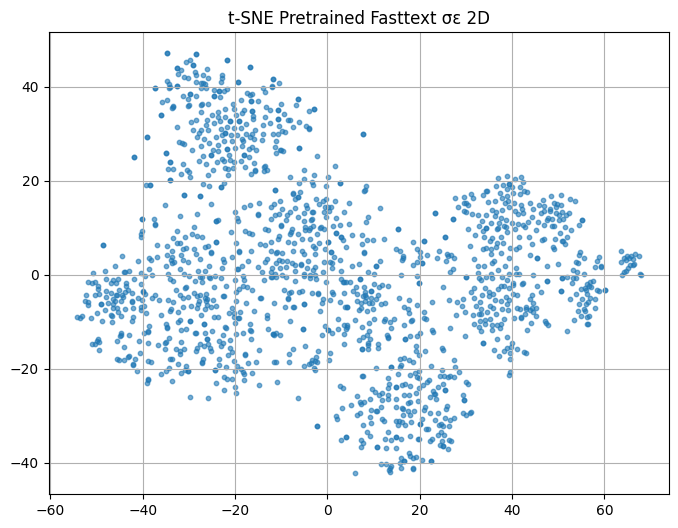

In [32]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
df_vectors_tsne = tsne.fit_transform(df_vectors)

plt.figure(figsize=(8, 6))
plt.scatter(df_vectors_tsne[:, 0], df_vectors_tsne[:, 1], s=10, alpha=0.6)
plt.title("t-SNE Pretrained Fasttext σε 2D")
plt.grid(True)
plt.show()

## Οπτική Ανάλυση μέσω t-SNE

Από την προβολή t-SNE σε δύο διαστάσεις, παρατηρούμε την ύπαρξη περίπου **5 διακριτών ομάδων**, γεγονός που ενισχύει την υπόθεση ότι το dataset παρουσιάζει κάποια δομή. Επιπλέον, μέσα σε ορισμένες από αυτές τις ομάδες, διαφαίνονται **υποομάδες** ή περιοχές με μεγαλύτερη πυκνότητα, κάτι που ίσως υποδηλώνει την παρουσία επιμέρους θεματικών ή υποκατηγοριών.

Σε αυτό το βήμα καλώ τη συνάρτηση `evaluate_kmeans_range`, η οποία εφαρμόζει τον αλγόριθμο K-Means για διαφορετικές τιμές του `k` (αριθμός clusters) και υπολογίζει δύο μετρικές:

- **Inertia**: το άθροισμα των αποστάσεων όλων των σημείων από το πλησιέστερο κέντρο τους (μέθοδος Elbow)
- **Silhouette Score**: μετρά πόσο καλά διαχωρισμένα είναι τα clusters μεταξύ τους

Χρησιμοποιώ τα παρακάτω ορίσματα:
- `df_vectors` ως τα διανύσματα των εγγράφων
- `k_range=range(2,11)` για να εξετάσω τιμές του k από 2 έως 10
- `init_method="k-means++"` για σταθερή αρχικοποίηση
- `random_state=42` για αναπαραγωγιμότητα

Παρατηρώ πως ο καλύτερος **Silhouette Score** είναι **0.1539** και εμφανίζεται για **k = 2**.

Παρακάτω φαίνονται τα αντίστοιχα διαγράμματα:
- Elbow Method για την Inertia
- Silhouette Method για το k


Βέλτιστο Silhouette Score: 0.1539 για k = 2


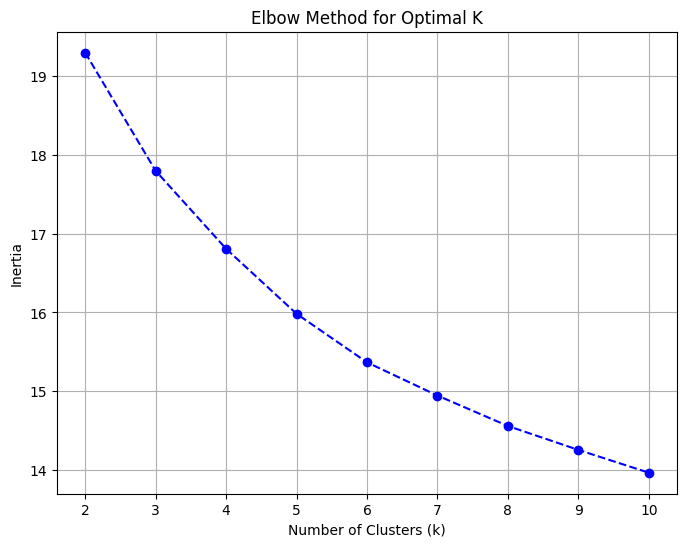

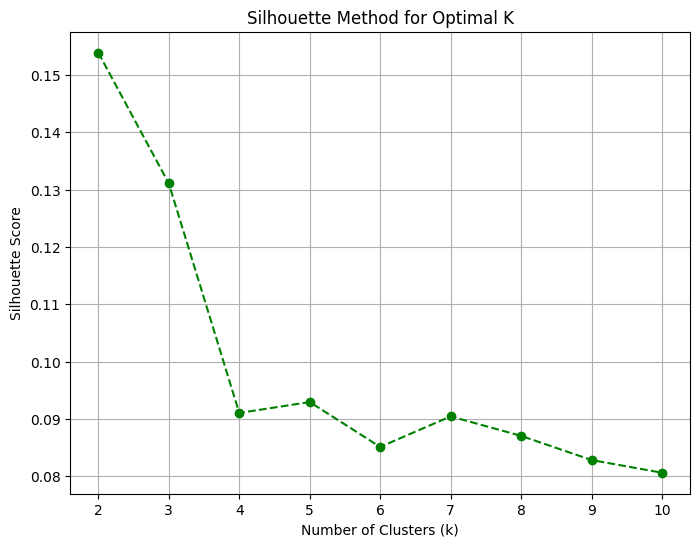

In [33]:
evaluate_kmeans_range(df_vectors, k_range=range(2,11), init_method="k-means++", n_init=10, max_iter=300, tol=1e-4, random_state=42)

Σε αυτό το σημείο εφαρμόζω τον αλγόριθμο **K-Means** πάνω στα διανύσματα κειμένων (`df_vectors`), χρησιμοποιώντας 2 clusters, όπως υποδεικνύει η προηγούμενη αξιολόγηση με τη μέθοδο του Silhouette Score.

Καλώ τη συνάρτηση `run_kmeans` με `n_clusters=2` και αποθηκεύω το αποτέλεσμα στο `kmeans_model`.

In [34]:
kmeans_model_bbc = run_kmeans(df_vectors, n_clusters=2)

Inertia:
 19.299772262573242
Silhouette Score: 0.1539


### Agglomerative Clustering – επιλογή αριθμού clusters

Σε αυτό το σημείο εφαρμόζω agglomerative clustering στα document vectors. Πρώτα δημιουργώ ένα dendrogram με ward linkage και euclidean απόσταση.

Έπειτα, δοκιμάζω τιμές του k από 2 έως 10 και υπολογίζω το Silhouette Score για κάθε μία. Το καλύτερο σκορ βγαίνει για k = 2 (0.1255), οπότε συνεχίζω με αυτό.

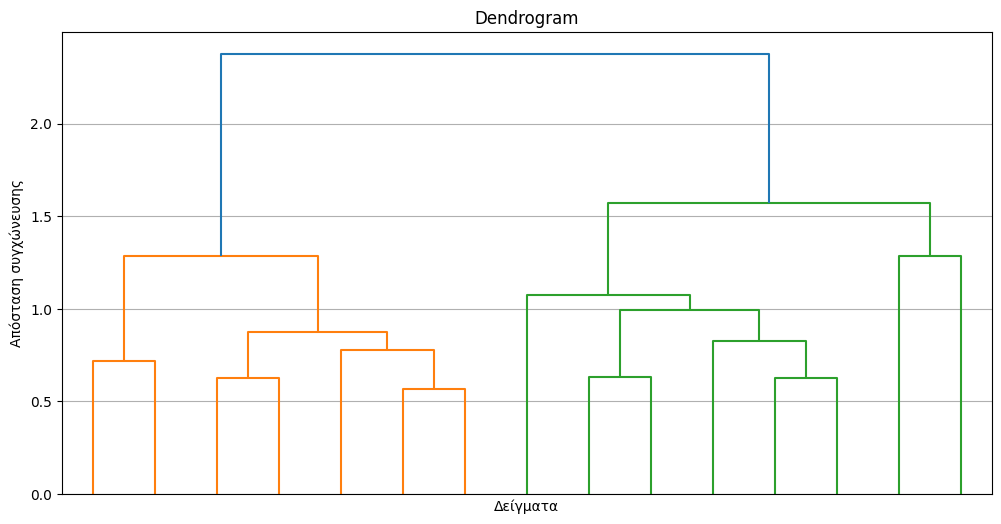

In [35]:
plot_dendrogram_only(df_vectors, linkage_method='ward', metric='euclidean', figsize=(12, 6), title="Dendrogram", truncate_lastp=15)


Βέλτιστο Silhouette Score: 0.1255 για k = 2


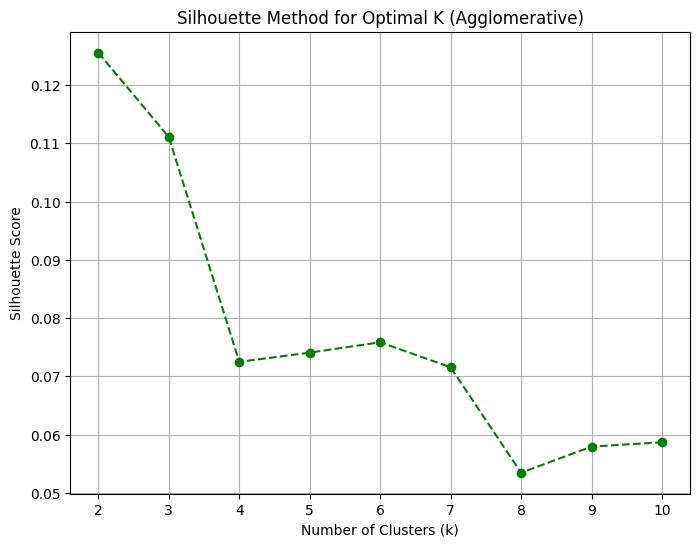

In [36]:
evaluate_agglomerative_range(df_vectors, k_range=range(2, 11), linkage='ward', metric='euclidean', show_scores=True)

### Εκτέλεση Agglomerative Clustering με k=2

Τρέχω το agglomerative clustering με 2 clusters, όπως έδειξε και η προηγούμενη αξιολόγηση με Silhouette Score. 

Το τελικό Silhouette Score είναι 0.1255.

In [37]:
agg_model_bbc = run_agglomerative_clustering(df_vectors, n_clusters=2, show_dendrogram=False)


Silhouette Score: 0.1255


# Δοκιμή HDBSCAN 

Τρέχω τον HDBSCAN με `min_cluster_size=10` και `min_samples=5`, ώστε να δώσω στον αλγόριθμο μεγαλύτερη ευελιξία να εντοπίσει μικρότερες ομάδες.

- Βρέθηκαν 2 clusters.
- Το Silhouette Score είναι στα 00.4357.
- Οι outliers είναι 166 .

In [38]:
hdbscan_model_bbc = run_hdbscan_clustering(df_vectors, min_cluster_size=10, min_samples=5, compute_score=True, show_probabilities=False)


Silhouette Score (χωρίς τους outliers): 0.4357

Αριθμός clusters: 2
Αριθμός outliers: 166


## Σύγκριση
Σε αυτό το σημείο συγκρίνω τα αποτελέσματα των τριών clustering αλγορίθμων (KMeans, Agglomerative και HDBSCAN), χρησιμοποιώντας τις μετρικές NMI (Normalized Mutual Information), AMI (Adjusted Mutual Information) και ARI (Adjusted Rand Index).  

Καμία από τις clustering τεχνικές δεν έδωσε ικανοποιητικά αποτελέσματα. Όλοι οι αλγόριθμοι – KMeans, Agglomerative και HDBSCAN – εμφάνισαν χαμηλές τιμές στις μετρικές NMI, AMI και ARI, κάτι που δείχνει ασθενή συμφωνία με τις πραγματικές κατηγορίες του dataset.


KMeans (k = 2):
  NMI: 0.1886
  AMI: 0.1876
  ARI: 0.1299

Agglomerative (k = 2):
  NMI: 0.3001
  AMI: 0.2993
  ARI: 0.2329

HDBSCAN (k = 2):
  NMI: 0.0344
  AMI: 0.0316
  ARI: 0.0013


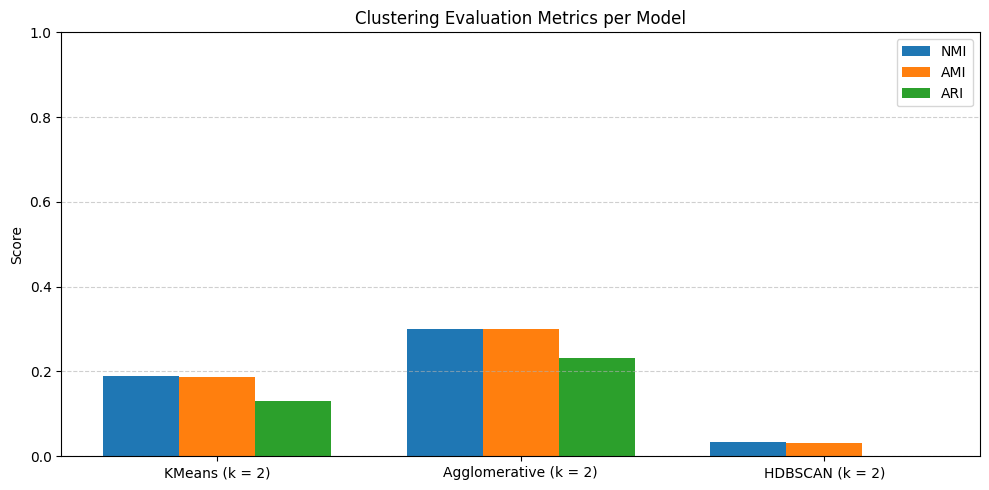

In [40]:
models = [kmeans_model_bbc, agg_model_bbc, hdbscan_model_bbc]
titles = ["KMeans (k = 2)", "Agglomerative (k = 2)", "HDBSCAN (k = 2)"]
true_labels_list = [df["Category"], df["Category"], df["Category"]]

evaluate_clustering_models(true_labels_list, models, titles)

In [41]:
add_results("BBC News dataset",
        "Pretrained Fasttext",
        "None",
        "KMeans",
        2,
        0.1539,
        0.1886,
        0.1876,
        0.1299,
        "Χαμηλά αποτελέσματα")

add_results("BBC News dataset",
        "Pretrained Fasttext",
        "None",
        "Agglomerative",
        2,
        0.1255,
        0.3001,
        0.2993,
        0.2329,
        "Λίγο καλύτερο από KMeans")

add_results("BBC News dataset",
        "Pretrained Fasttext",
        "None",
        "HDBSCAN",
        2,
        0.4357,
        0.0344,
        0.0316,
        0.0013,
        "Πολύ χαμηλά αποτελέσματα")

C:\Users\giorg\AppData\Local\Temp\ipykernel_14504\1866691522.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clustering_results_df = pd.concat([clustering_results_df, pd.DataFrame([new_entry])], ignore_index=True)


## PCA
Συνεχίζω τώρα με εφαρμογή PCA (Principal Component Analysis) στο ίδιο dataset. Στόχος είναι να μειώσω τις διαστάσεις των embeddings και να επαναλάβω την εφαρμογή των clustering αλγορίθμων, ώστε να συγκρίνω αν η μείωση διαστάσεων μπορεί να βελτιώσει τα αποτελέσματα των μοντέλων.

Ο παρακάτω κώδικας εφαρμόζει PCA (Principal Component Analysis) για να μελετήσω πόσες συνιστώσες (components) χρειάζομαι ώστε να διατηρήσω ένα ικανοποιητικό ποσοστό πληροφορίας (variance) από τα αρχικά δεδομένα. 

Επιλέγω σαν όριο το 90% της πληροφορίας.

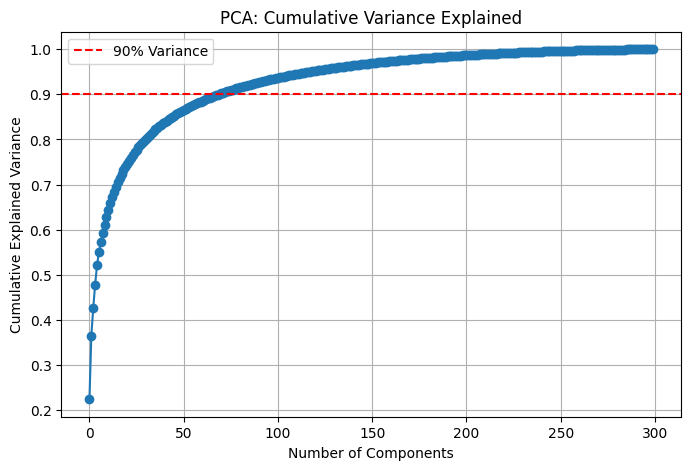

In [42]:
# Κάνουμε PCA με όλους τους συντελεστές για ανάλυση
pca_full = PCA()
pca_full.fit(df_vectors)

# Υπολογίζω το σωρευτικό άθροισμα (cumulative sum) των ποσοστών διασποράς που εξηγούνται από τις συνιστώσες του PCA.
# Η pca_full.explained_variance_ratio_ περιέχει για κάθε PCA συνιστώσα το ποσοστό της αρχικής πληροφορίας (variance) που εξηγεί.
# Με την np.cumsum υπολογίζω πόση συνολική πληροφορία καλύπτεται αν κρατήσω τις πρώτες n συνιστώσες.
# Αυτό με βοηθά να αποφασίσω πόσες συνιστώσες χρειάζομαι για να διατηρώ, π.χ., το 90% της πληροφορίας.
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Cumulative Variance Explained")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label="90% Variance")
plt.legend()
plt.show()

### Επιλογή αριθμού συνιστωσών PCA

Από το διάγραμμα βλέπουμε τη συσωρευτική διασπορά που εξηγείται καθώς αυξάνεται ο αριθμός των PCA συνιστωσών. Η κόκκινη διακεκομμένη γραμμή αντιστοιχεί στο όριο του 90% της εξηγούμενης διασποράς.

Παρατηρούμε ότι για να φτάσουμε αυτό το όριο απαιτούνται περίπου 65 με 70 συνιστώσες. Αυτό σημαίνει ότι μπορούμε να μειώσουμε δραστικά τις διαστάσεις των δεδομένων μας (από 300 αρχικές διαστάσεις) χωρίς να χάσουμε μεγάλο μέρος της πληροφορίας.

Στη συνέχεια, θα επιλέξουμε τις πρώτες 65 PCA συνιστώσες για να συνεχίσουμε την ανάλυση και θα επαναλάβουμε τα προηγούμενα βήματα και αλγόριθμους.

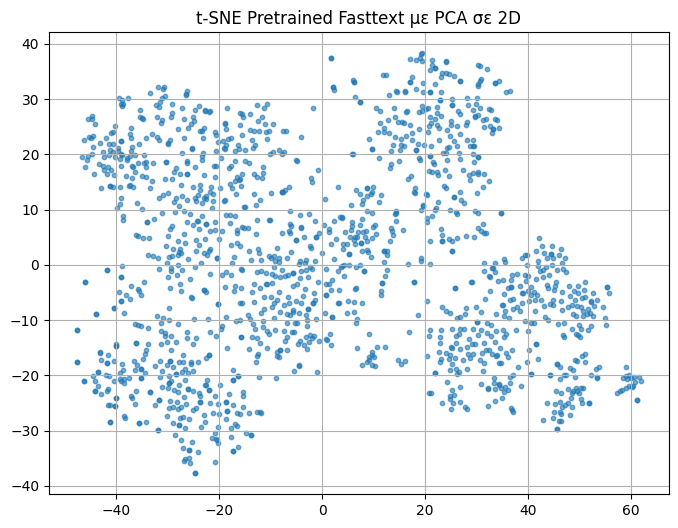

In [43]:
pca_65n = PCA(65)
df_vectors_pca = pca_65n.fit_transform(df_vectors)

tsne = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
df_vectors_pca_tsne = tsne.fit_transform(df_vectors_pca)

plt.figure(figsize=(8, 6))
plt.scatter(df_vectors_pca_tsne[:, 0], df_vectors_pca_tsne[:, 1], s=10, alpha=0.6)
plt.title("t-SNE Pretrained Fasttext με PCA σε 2D")
plt.grid(True)
plt.show()

## Παρατήρηση μετά την PCA και t-SNE

Αν και εφαρμόστηκε PCA για μείωση των διαστάσεων πριν την t-SNE, παρατηρείται ότι η οπτικοποίηση των δεδομένων παραμένει ουσιαστικά παρόμοια με την t-SNE χωρίς PCA.

Αυτό δείχνει ότι η εφαρμογή του PCA, τουλάχιστον με τις συγκεκριμένες παραμέτρους και δεδομένα, **δεν προσέφερε κάποιο εμφανές όφελος** στην οπτική διάκριση των ομάδων μέσω t-SNE.

Συνεχίζω με επανάληψη των προηγούμενων βημάτων.


Βέλτιστο Silhouette Score: 0.1720 για k = 2


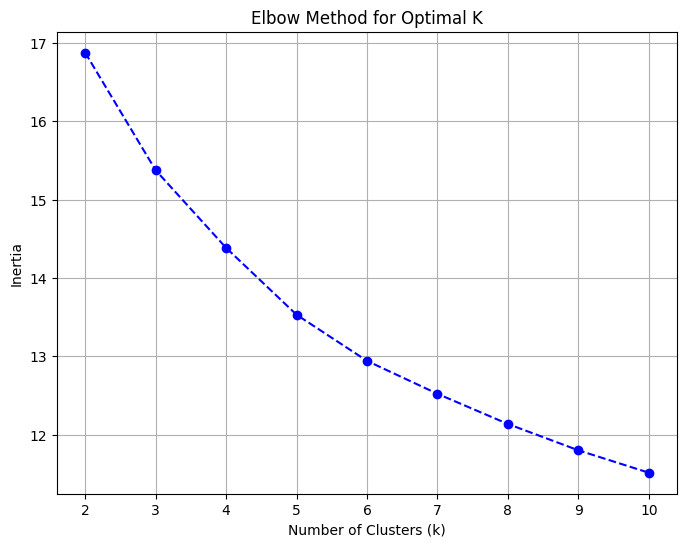

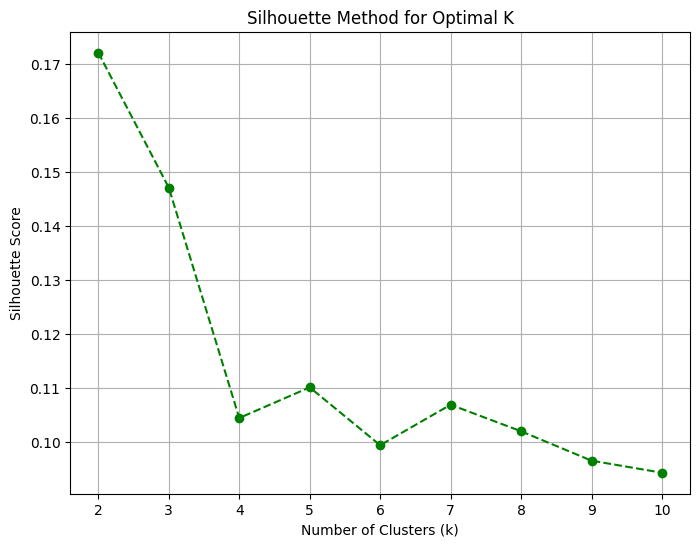

In [44]:
evaluate_kmeans_range(df_vectors_pca, k_range=range(2,11), init_method="k-means++", n_init=10, max_iter=300, tol=1e-4, random_state=42)

In [45]:
kmeans_model_bbc_pca65 = run_kmeans(df_vectors_pca, n_clusters=2)

Inertia:
 16.873971939086914
Silhouette Score: 0.1720



Βέλτιστο Silhouette Score: 0.1370 για k = 2


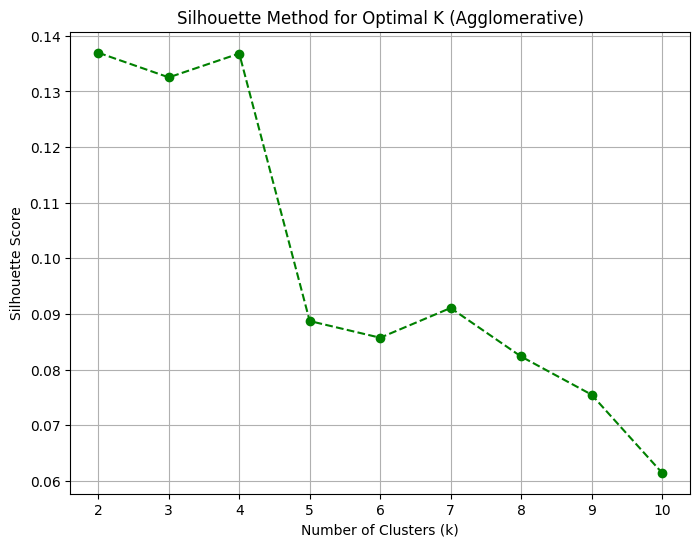

In [48]:
evaluate_agglomerative_range(df_vectors_pca, k_range=range(2, 11), linkage='ward', metric='euclidean', show_scores=True)

In [52]:
agg_model_bbc_pca65 = run_agglomerative_clustering(df_vectors_pca, n_clusters=2, show_dendrogram=False)


Silhouette Score: 0.1370


In [50]:
hdbscan_model_bbc_pca65 = run_hdbscan_clustering(df_vectors_pca, min_cluster_size=10, min_samples=5, compute_score=True, show_probabilities=False)


Silhouette Score (χωρίς τους outliers): 0.4751

Αριθμός clusters: 2
Αριθμός outliers: 133



KMeans (k = 2):
  NMI: 0.1886
  AMI: 0.1876
  ARI: 0.1299

Agglomerative (k = 2):
  NMI: 0.4122
  AMI: 0.4115
  ARI: 0.3016

HDBSCAN:
  NMI: 0.0361
  AMI: 0.0332
  ARI: 0.0012


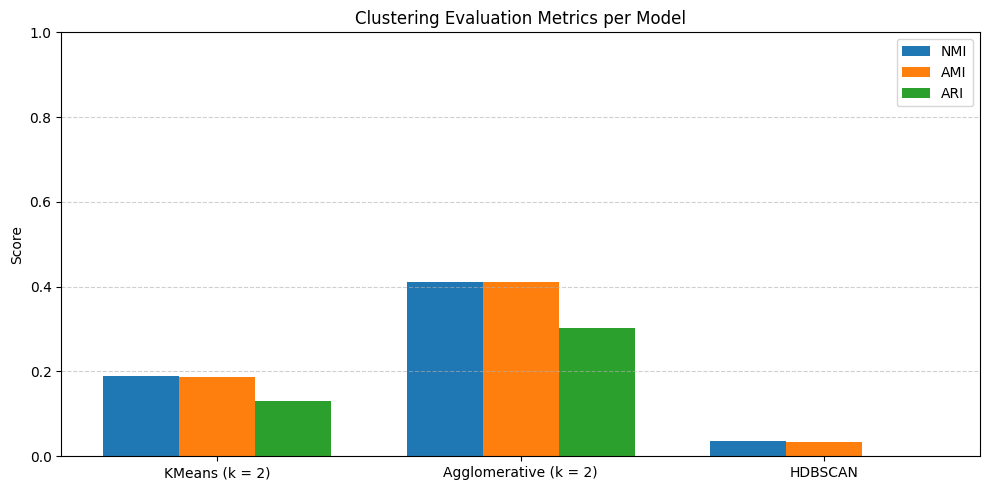

In [53]:
models = [kmeans_model_bbc_pca65, agg_model_bbc_pca65, hdbscan_model_bbc_pca65]
titles = ["KMeans (k = 2)", "Agglomerative (k = 2)", "HDBSCAN"]
true_labels_list = [df["Category"], df["Category"], df["Category"]]

evaluate_clustering_models(true_labels_list, models, titles)

Από τα αποτελέσματα βλέπω ότι η εφαρμογή του PCA δεν βελτίωσε ουσιαστικά τις επιδόσεις των αλγορίθμων clustering. Υποθέτω ότι ο βασικός λόγος είναι πως τα αρχικά διανύσματα (embeddings) δεν καταφέρνουν να αποτυπώσουν σωστά τη σημασιολογική πληροφορία των κειμένων.

Αυτό οφείλεται στο γεγονός ότι το προεκπαιδευμένο μοντέλο FastText που χρησιμοποίησα (μέσω Gensim API) λειτουργεί πρακτικά σαν Word2Vec: περιέχει μόνο λέξεις από το λεξιλόγιό του και **δεν μπορεί να υπολογίσει διανύσματα για άγνωστες λέξεις (out-of-vocabulary)**. Έτσι, μεγάλο μέρος της πληροφορίας χάνεται κατά τον υπολογισμό των document vectors.

Στο επόμενο βήμα, θα ακολουθήσω την ίδια διαδικασία, αλλά αυτή τη φορά θα εκπαιδεύσω ένα FastText μοντέλο **πάνω στο δικό μου λεξιλόγιο**, χρησιμοποιώντας τα tokenized κείμενα του dataset.

In [54]:
add_results("BBC News dataset",
        "Pretrained Fasttext",
        "PCA 65",
        "KMeans",
        2,
        0.1720,
        0.1886,
        0.1876,
        0.1299,
        "Χαμηλά αποτελέσματα")

add_results("BBC News dataset",
        "Pretrained Fasttext",
        "PCA 65",
        "Agglomerative",
        2,
        0.1370,
        0.4122,
        0.4115,
        0.3016,
        "Αρκετή βελτίωση αλλά όχι αρκετή")

add_results("BBC News dataset",
        "Pretrained Fasttext",
        "PCA 65",
        "HDBSCAN",
        2,
        0.4751,
        0.0361,
        0.0332,
        0.0012,
        "Κακά αποτελέσματα")

In [55]:
# Εκπαίδευση FastText πάνω στα tokens των άρθρων
ft_custom_sg_0 = FastText(
    sentences=df["Tokens"],
    vector_size=300,       # ίδια διάσταση με pretrained
    window=5,              # πόσες λέξεις δεξιά/αριστερά κοιτάει
    min_count=2,           # αγνοεί λέξεις που εμφανίζονται <2 φορές
    sg=0,
    epochs=10,
    workers=1
)

## Έλεγχος Συμπεριφοράς Εκπαιδευμένου FastText Μοντέλου σε Άγνωστες Λέξεις

Σε αυτό το σημείο, τρέχω την εντολή:

```python
ft_custom_sg_0.wv.most_similar("coolhead")
```
ώστε να ελέγξω αν το εκπαιδευμένο FastText μοντέλο (ft_custom), το οποίο έχει εκπαιδευτεί πάνω στα 
tokenized δεδομένα του BBC dataset, μπορεί να διαχειριστεί άγνωστες λέξεις (λέξεις που δεν υπήρχαν στα 
δεδομένα εκπαίδευσης ή στο λεξιλόγιο του Word2Vec).

In [56]:
similar = ft_custom_sg_0.wv.most_similar("coolhead")
print(similar)

[('dead', 0.9286460876464844), ('gateshead', 0.9285395741462708), ('contradictory', 0.9217077493667603), ('cory', 0.9160912036895752), ('stead', 0.9080057740211487), ('parallel', 0.9068951606750488), ('brentford', 0.9038565754890442), ('heads', 0.9036785960197449), ('chunk', 0.9028720259666443), ('co-wrote', 0.9028112888336182)]


Όπως φαίνεται από το αποτέλεσμα, το μοντέλο δεν επιστρέφει σφάλμα, αλλά αντίθετα επιστρέφει τις πιο παρόμοιες λέξεις. Αυτό δείχνει ότι το μοντέλο αξιοποιεί τις δυνατότητες του FastText και μπορεί να δημιουργήσει embedding ακόμη και για λέξεις που δεν έχει ξαναδεί.

Άρα, το custom μοντέλο λειτουργεί όπως αναμένεται από ένα κανονικό FastText, σε αντίθεση με το προεκπαιδευμένο που λειτουργούσε σαν Word2Vec.

Καλώ πάλι τη συνάρτηση `token_vectorized` ώστε να δημιουργήσω το DataFrame με τα διανύσματα των λέξεων, αυτή τη φορά χρησιμοποιώντας το μοντέλο `ft_custom_sg_0` που έχω εκπαιδεύσει. Ενεργοποιώ την παράμετρο `handles_uw=True` επειδή το μοντέλο μπορεί να διαχειριστεί άγνωστες λέξεις.

In [57]:
df_vectors_trainedsg0 = token_vectorized(df, "Tokens", ft_custom_sg_0, handles_uw=True)

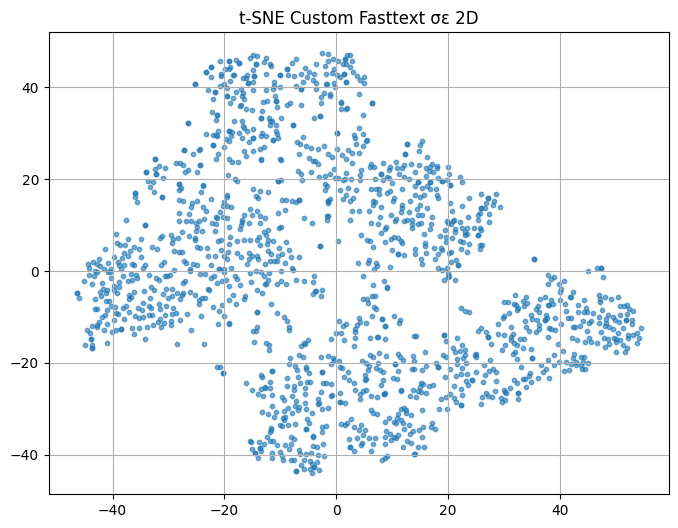

In [58]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
df_vectors_trained_tsne = tsne.fit_transform(df_vectors_trainedsg0)

plt.figure(figsize=(8, 6))
plt.scatter(df_vectors_trained_tsne[:, 0], df_vectors_trained_tsne[:, 1], s=10, alpha=0.6)
plt.title("t-SNE Custom Fasttext σε 2D")
plt.grid(True)
plt.show()

## Παρατήρηση μετά από t-SNE στο custom FastText

Αφού εκπαιδεύτηκε το μοντέλο FastText (με sg=0) και εφαρμόστηκε η μέθοδος t-SNE, η οπτικοποίηση δείχνει **μια ελαφρώς διαφορετική κατανομή** σε σχέση με τα προηγούμενα plots.

Υπάρχει μια γενική ένδειξη για περίπου πέντε βασικές ομάδες, ωστόσο **ο διαχωρισμός μεταξύ των clusters παραμένει ασαφής**. Κάποιες ομάδες φαίνονται να έχουν κοντινά ή επικαλυπτόμενα όρια.

Συνολικά, το αποτέλεσμα δείχνει μια μικρή βελτίωση στην απεικόνιση, αλλά **δεν προκύπτει σαφής και καθαρός διαχωρισμός των clusters**.

Ακολούθως συνεχίζω με τα ίδια βήματα που ακολούθησα και με το pretrained FastText. Πρώτα εφαρμόζω τους clustering αλγορίθμους (KMeans, Agglomerative, HDBSCAN) πάνω στα embeddings που προέκυψαν από το εκπαιδευμένο FastText μοντέλο, **χωρίς** χρήση PCA. Έπειτα, θα εφαρμόσω PCA για μείωση διαστάσεων και θα επαναλάβω τους ίδιους αλγορίθμους για σύγκριση αποτελεσμάτων.


Βέλτιστο Silhouette Score: 0.2564 για k = 2


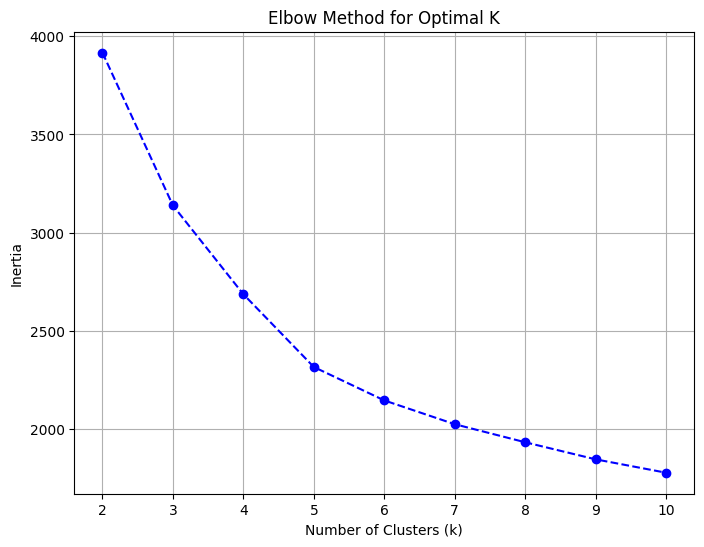

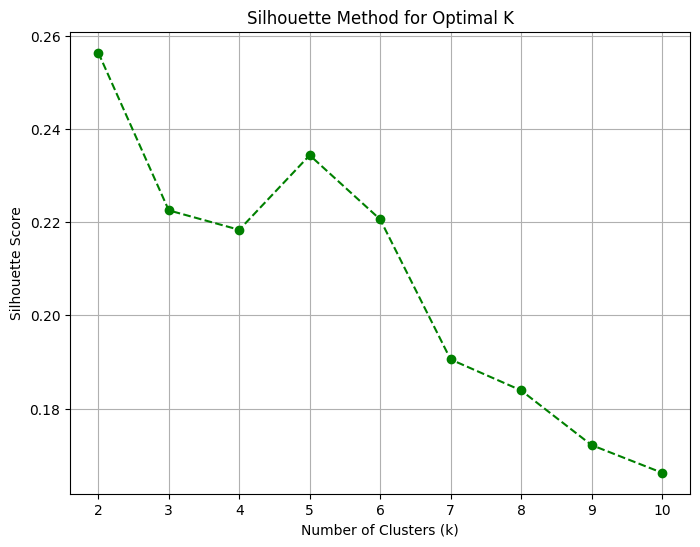

In [59]:
evaluate_kmeans_range(df_vectors_trainedsg0, k_range=range(2,11), init_method="k-means++", n_init=10, max_iter=300, tol=1e-4, random_state=42)

In [60]:
kmeans_model_bbc_trained = run_kmeans(df_vectors_trainedsg0, n_clusters=2)

Inertia:
 3916.28662109375
Silhouette Score: 0.2564


## Αξιολόγηση με νέο εκπαιδευμένο FastText

Ξαναέτρεξα τη συνάρτηση evaluate_kmeans_range για τιμές k από 2 έως 10. Το βέλτιστο k παραμένει στο 2, σύμφωνα με το Silhouette Score. Ωστόσο, η τιμή k=5, που αντιστοιχεί στο πραγματικό πλήθος κατηγοριών του dataset, παρουσίασε αισθητά βελτιωμένο σκορ συγκριτικά με το προηγούμενο μοντέλο. Γενικά, το νέο εκπαιδευμένο FastText οδήγησε σε υψηλότερο Silhouette Score από το προεκπαιδευμένο μοντέλο.

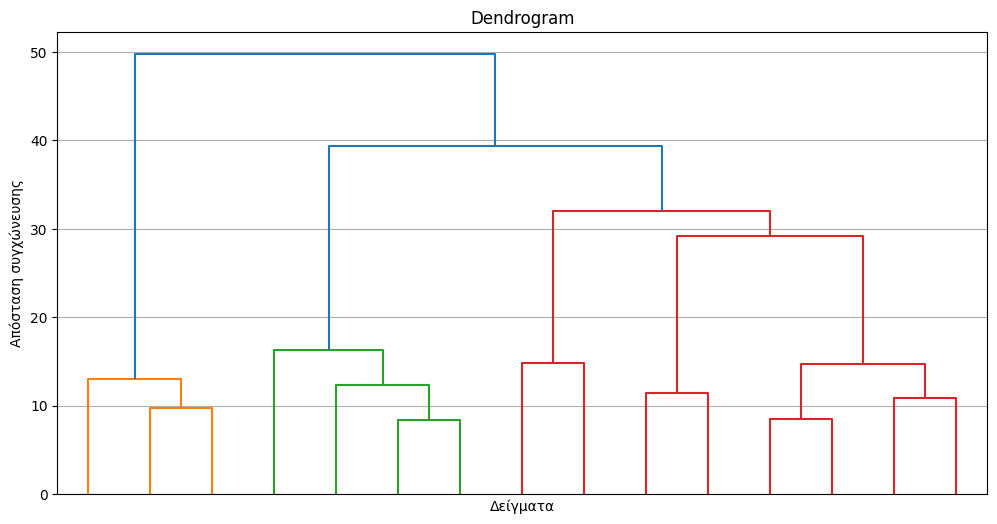

In [61]:
plot_dendrogram_only(df_vectors_trainedsg0, linkage_method='ward', metric='euclidean', figsize=(12, 6), title="Dendrogram", truncate_lastp=15)


Βέλτιστο Silhouette Score: 0.2903 για k = 2


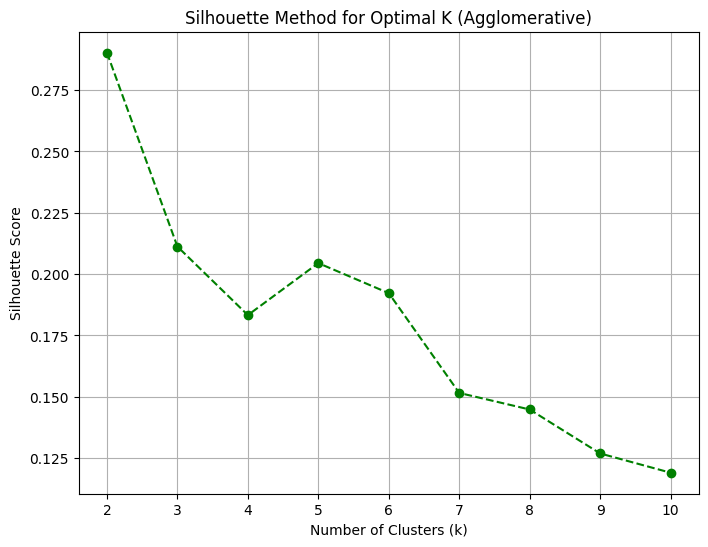

In [62]:
evaluate_agglomerative_range(df_vectors_trainedsg0, k_range=range(2, 11), linkage='ward', metric='euclidean', show_scores=True)

In [63]:
agg_model_bbc_trained = run_agglomerative_clustering(df_vectors_trainedsg0, n_clusters=2, show_dendrogram=False)


Silhouette Score: 0.2903


Ακολούθησε η αξιολόγηση του `Agglomerative Clustering` για τις νέες αναπαραστάσεις (εκπαιδευμένο FastText).

Αρχικά, από το dendrogram παρατηρούμε την ύπαρξη 5 διακριτών ομάδων. Ωστόσο, κατά την εκτέλεση της `evaluate_agglomerative_range()` για τιμές k από 2 έως 10, το βέλτιστο αποτέλεσμα εμφανίζεται στο **k = 2**, με **Silhouette Score = 0.2903**.

Συνέχισα επομένως με την εκπαίδευση του μοντέλου με `n_clusters=2`.

In [64]:
hdbscan_model_bbc_trained = run_hdbscan_clustering(df_vectors_trainedsg0, min_cluster_size=10, min_samples=5, compute_score=True, show_probabilities=False)


Silhouette Score (χωρίς τους outliers): 0.2604

Αριθμός clusters: 3
Αριθμός outliers: 986


Τρέχουμε τον HDBSCAN με το εκπαιδευμένο FastText και ίδιες παραμέτρους `min_cluster_size=10`, `min_samples=5`.

Το αποτέλεσμα δίνει:
- **Silhouette Score** (χωρίς τους outliers): **0.2604**
- **Αριθμός clusters**: 3
- **Αριθμός outliers**: 986

Παρατηρείται βελτίωση στο Silhouette Score σε σχέση με την προηγούμενη εκτέλεση με pretrained embeddings, αλλά το ποσοστό των outliers παραμένει αρκετά υψηλό.


KMeans (k = 2):
  NMI: 0.1614
  AMI: 0.1604
  ARI: 0.1187

Agglomerative (k = 2):
  NMI: 0.1368
  AMI: 0.1356
  ARI: 0.0370

HDBSCAN:
  NMI: 0.1633
  AMI: 0.1604
  ARI: 0.0586


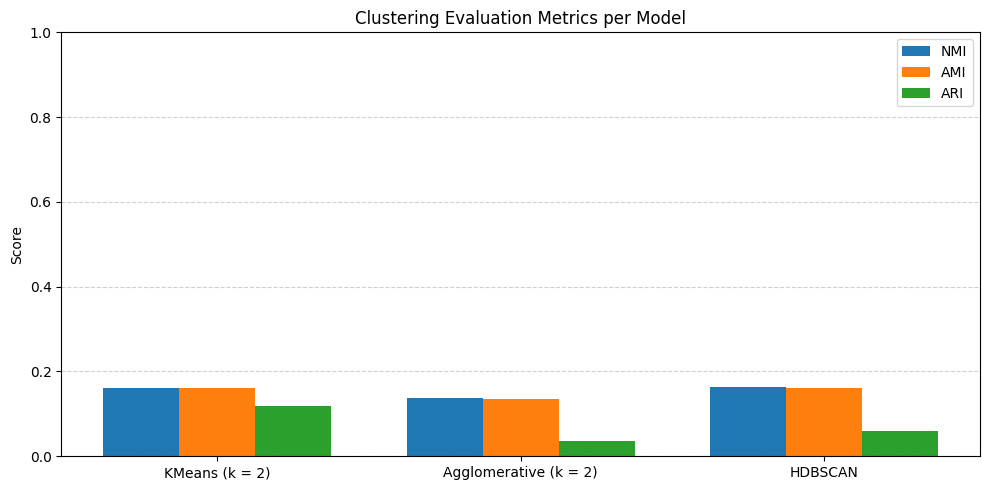

In [65]:
models = [kmeans_model_bbc_trained, agg_model_bbc_trained, hdbscan_model_bbc_trained]
titles = ["KMeans (k = 2)", "Agglomerative (k = 2)", "HDBSCAN"]
true_labels_list = [df["Category"], df["Category"], df["Category"]]

evaluate_clustering_models(true_labels_list, models, titles)

Παρά τη χρήση του εκπαιδευμένο FastText, τα αποτελέσματα παραμένουν σε χαμηλά επίπεδα.
Τα αποτελέσματα δεν κρίνονται ικανοποιητικά, οπότε προχωράμε με εφαρμογή PCA πάνω στα νέα διανύσματα και επανάληψη της διαδικασίας.

In [66]:
add_results("BBC News dataset",
        "Custom Fasttext SG=0",
        "None",
        "KMeans",
        2,
        0.2564,
        0.1614,
        0.1604,
        0.1187,
        "Χαμηλά αποτελέσματα")

add_results("BBC News dataset",
        "Custom Fasttext SG=0",
        "None",
        "Agglomerative",
        2,
        0.2903,
        0.1368,
        0.1356,
        0.0370,
        "Χαμηλά αποτελέσματα")

add_results("BBC News dataset",
        "Custom Fasttext SG=0",
        "None",
        "HDBSCAN",
        3,
        0.2604,
        0.1633,
        0.1604,
        0.0586,
        "Χαμηλά αποτελέσματα")

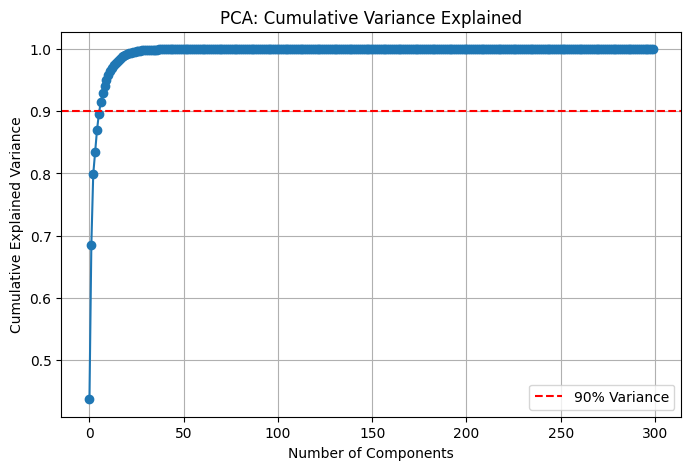

In [67]:
# Κάνουμε PCA με όλους τους συντελεστές για ανάλυση
pca_full = PCA()
pca_full.fit(df_vectors_trainedsg0)

# Υπολογίζω το σωρευτικό άθροισμα (cumulative sum) των ποσοστών διασποράς που εξηγούνται από τις συνιστώσες του PCA.
# Η pca_full.explained_variance_ratio_ περιέχει για κάθε PCA συνιστώσα το ποσοστό της αρχικής πληροφορίας (variance) που εξηγεί.
# Με την np.cumsum υπολογίζω πόση συνολική πληροφορία καλύπτεται αν κρατήσω τις πρώτες n συνιστώσες.
# Αυτό με βοηθά να αποφασίσω πόσες συνιστώσες χρειάζομαι για να διατηρώ, π.χ., το 90% της πληροφορίας.
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Cumulative Variance Explained")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label="90% Variance")
plt.legend()
plt.show()

Όπως παρατηρούμε από το γράφημα της σωρευτικής εξηγούμενης διασποράς, το 90% της πληροφορίας καλύπτεται ήδη από τις 6 πρώτες συνιστώσες του PCA.

Οπότε συνεχίζω με εφαρμογή PCA ώστε `n_components = 6` πάνω στα διανύσματα του εκπαιδευμένου μοντέλου FastText.

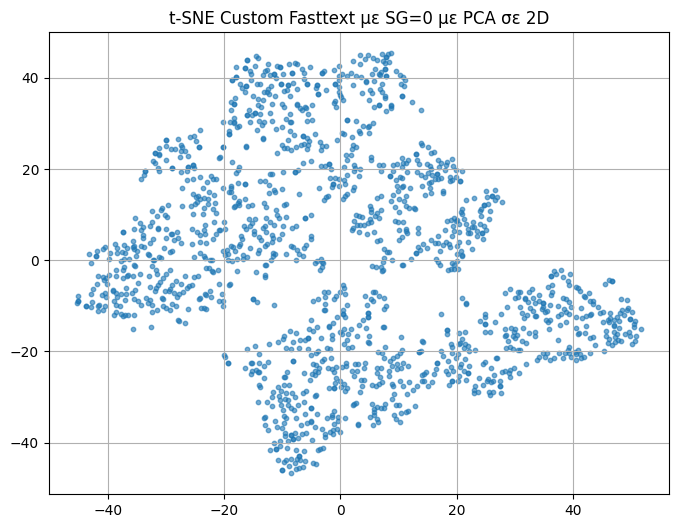

In [68]:
pca_6n = PCA(6)
df_vectors_trained_pcasg0 = pca_6n.fit_transform(df_vectors_trainedsg0)

tsne = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
df_vectors_trained_tsnesg0 = tsne.fit_transform(df_vectors_trained_pcasg0)

plt.figure(figsize=(8, 6))
plt.scatter(df_vectors_trained_tsnesg0[:, 0], df_vectors_trained_tsnesg0[:, 1], s=10, alpha=0.6)
plt.title("t-SNE Custom Fasttext με SG=0 με PCA σε 2D")
plt.grid(True)
plt.show()

## Παρατήρηση μετά από t-SNE στο Custom FastText (SG = 0) με PCA

Η οπτικοποίηση με t-SNE, αφού πρώτα εφαρμόστηκε PCA και χρησιμοποιήθηκε το εκπαιδευμένο μοντέλο FastText (με SG = 0), δείχνει **παρόμοια εικόνα** με τις προηγούμενες προσπάθειες.

Παρατηρούνται περίπου πέντε βασικές ομάδες, και μετά την εφαρμογή του PCA φαίνεται να υπάρχει **μια μικρή βελτίωση στη συνοχή των clusters**. Οι δομές τους είναι κάπως πιο καθαρές σε σχέση με πριν.

Ωστόσο, οι ομάδες **παραμένουν αρκετά κοντά η μία στην άλλη**, με δεδομένα που συχνά αλληλοεπικαλύπτονται στα όριά τους, κάτι που κάνει τον διαχωρισμό μεταξύ των clusters να μην είναι καθαρός.


Βέλτιστο Silhouette Score: 0.2880 για k = 2


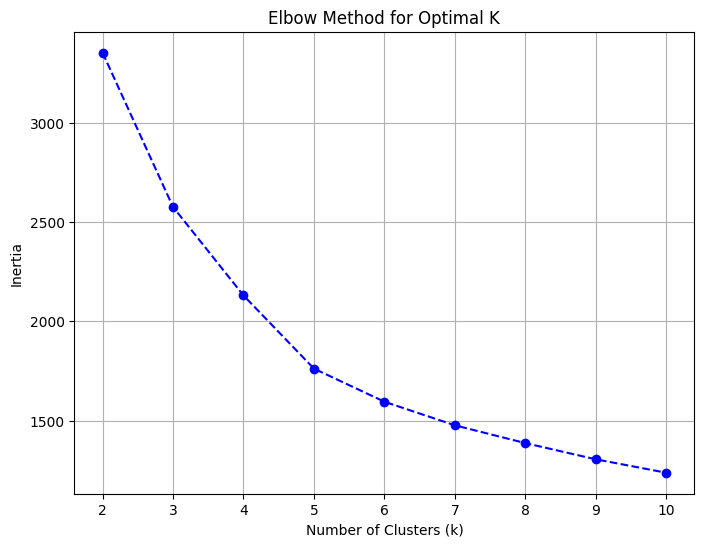

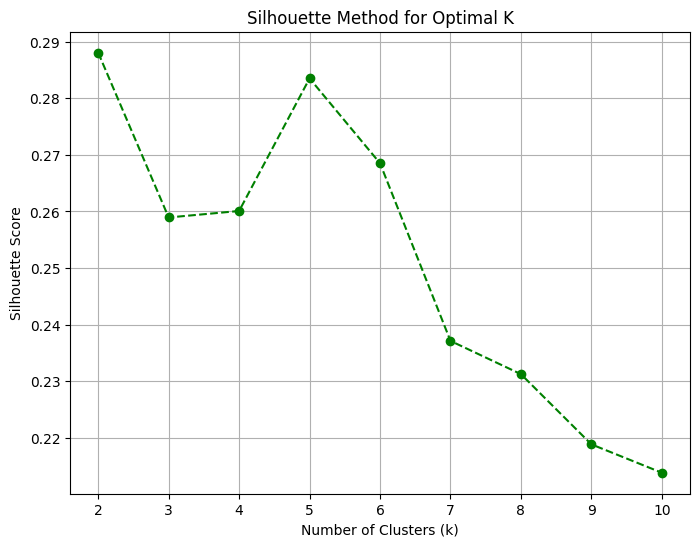

In [69]:
evaluate_kmeans_range(df_vectors_trained_pcasg0, k_range=range(2,11), init_method="k-means++", n_init=10, max_iter=300, tol=1e-4, random_state=42)

In [70]:
kmeans_model_bbc_trained_pcasg0 = run_kmeans(df_vectors_trained_pcasg0, n_clusters=2)

Inertia:
 3352.193603515625
Silhouette Score: 0.2880



Βέλτιστο Silhouette Score: 0.2580 για k = 5


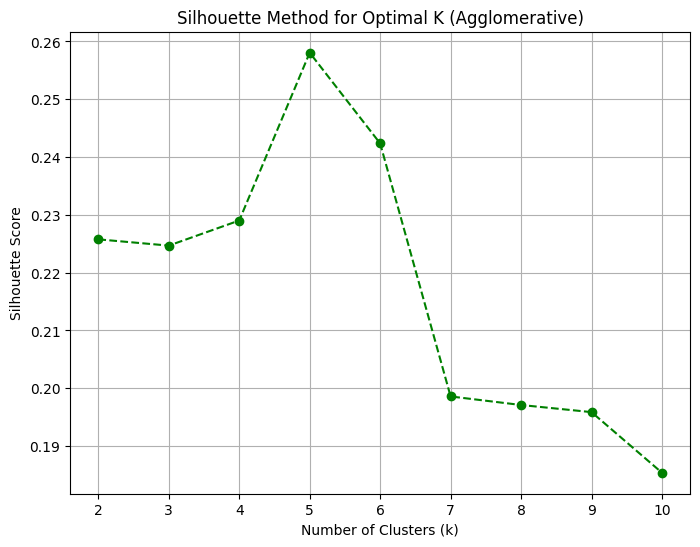

In [71]:
evaluate_agglomerative_range(df_vectors_trained_pcasg0, k_range=range(2, 11), linkage='ward', metric='euclidean', show_scores=True)

In [72]:
agg_model_bbc_trained_pcasg0 = run_agglomerative_clustering(df_vectors_trained_pcasg0, n_clusters=5, show_dendrogram=False)


Silhouette Score: 0.2580


In [73]:
hdbscan_model_bbc_trained_pcasg0 = run_hdbscan_clustering(df_vectors_trained_pcasg0, min_cluster_size=10, min_samples=5, compute_score=True, show_probabilities=False)


Silhouette Score (χωρίς τους outliers): 0.1834

Αριθμός clusters: 2
Αριθμός outliers: 347



KMeans (k = 2):
  NMI: 0.1614
  AMI: 0.1604
  ARI: 0.1187

Agglomerative (k = 5):
  NMI: 0.4898
  AMI: 0.4880
  ARI: 0.4485

HDBSCAN:
  NMI: 0.0253
  AMI: 0.0227
  ARI: 0.0084


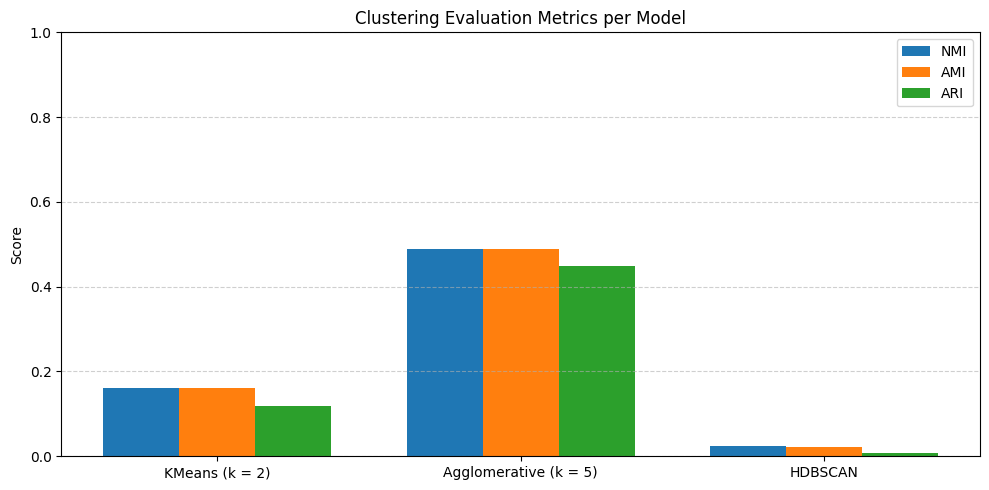

In [74]:
models = [kmeans_model_bbc_trained_pcasg0, agg_model_bbc_trained_pcasg0, hdbscan_model_bbc_trained_pcasg0]
titles = ["KMeans (k = 2)", "Agglomerative (k = 5)", "HDBSCAN (K = 2)"]
true_labels_list = [df["Category"], df["Category"], df["Category"]]

evaluate_clustering_models(true_labels_list, models, titles)

## Παρατήρηση μετά από PCA και αξιολόγηση με KMeans

Ακόμα και μετά την εφαρμογή PCA (`n_components=6`), η εκτέλεση της `evaluate_kmeans_range()` με τιμές `k` από 2 έως 10 έδειξε ότι, ενώ το `k = 5` (που είναι ο πραγματικός αριθμός κατηγοριών) παρουσίασε κάπως βελτιωμένο Silhouette Score, το καλύτερο σκορ συνεχίζει να εμφανίζεται στο `k = 2`, με τιμή **0.2880**.

Παρόλο που με την τωρινή εκδοχή του FastText (`sg=0`) ο `Agglomerative clustering` έδωσε καλά αποτελέσματα, αποφασίστηκε να εκπαιδευτεί ξανά το μοντέλο FastText, αυτή τη φορά με `sg=1` (δηλαδή με χρήση **Skip-gram**), για να εξεταστεί πώς θα συμπεριφερθεί στον KMeans και στον HDBSCAN.

In [75]:
add_results("BBC News dataset",
        "Custom Fasttext SG=0",
        "PCA 6",
        "KMeans",
        2,
        0.2880,
        0.1614,
        0.1604,
        0.1187,
        "Πολύ χαμηλά αποτελέσματα")

add_results("BBC News dataset",
        "Custom Fasttext SG=0",
        "PCA 6",
        "Agglomerative",
        5,
        0.2580,
        0.4898,
        0.4880,
        0.4485,
        "Βελτιωμένα αποτελέσματα")

add_results("BBC News dataset",
        "Custom Fasttext SG=0",
        "PCA 6",
        "HDBSCAN",
        2,
        0.1834,
        0.0253,
        0.0227,
        0.0084,
        "Κακά αποτελέσματα")

In [76]:
# Εκπαίδευση FastText πάνω στα tokens των άρθρων με sg=1
ft_custom_sg_1 = FastText(
    sentences=df["Tokens"],
    vector_size=300,       # ίδια διάσταση με pretrained
    window=5,              # πόσες λέξεις δεξιά/αριστερά κοιτάει
    min_count=2,           # αγνοεί λέξεις που εμφανίζονται <2 φορές
    sg=1,
    epochs=10,
    workers=1
)

Καλώ πάλι τη συνάρτηση `token_vectorized` ώστε να δημιουργήσω το DataFrame με τα διανύσματα των λέξεων, αυτή τη φορά χρησιμοποιώντας το μοντέλο `ft_custom_sg_1` που έχω εκπαιδεύσει. Ενεργοποιώ την παράμετρο `handles_uw=True` επειδή το μοντέλο μπορεί να διαχειριστεί άγνωστες λέξεις.

In [77]:
df_vectors_trainedsg1 = token_vectorized(df, "Tokens", ft_custom_sg_1, handles_uw=True)

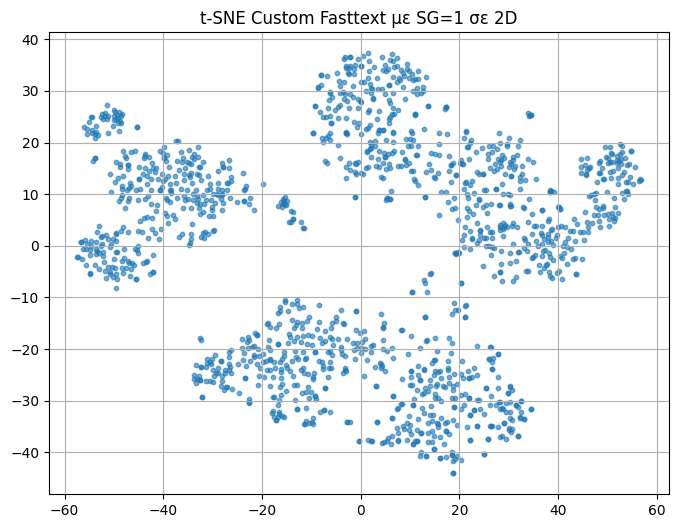

In [78]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
df_vectors_trained_sg1_tsne = tsne.fit_transform(df_vectors_trainedsg1)

plt.figure(figsize=(8, 6))
plt.scatter(df_vectors_trained_sg1_tsne[:, 0], df_vectors_trained_sg1_tsne[:, 1], s=10, alpha=0.6)
plt.title("t-SNE Custom Fasttext με SG=1 σε 2D")
plt.grid(True)
plt.show()

## Παρατήρηση μετά από t-SNE στο Custom FastText (SG = 1) χωρίς PCA

Με την εφαρμογή t-SNE σε δύο διαστάσεις, χρησιμοποιώντας το εκπαιδευμένο μοντέλο FastText με `SG = 1`, ο διαχωρισμός τριών ομάδων φαίνεται **σαφώς βελτιωμένος** σε σχέση με τις προηγούμενες περιπτώσεις.

Ωστόσο, δύο από τις πέντε συνολικά κατηγορίες μοιάζουν να **συγχέονται μεταξύ τους**, καθώς τα δεδομένα στα όριά τους είναι σχετικά **πυκνά και διασκορπισμένα**, δημιουργώντας μια ενδιάμεση περιοχή που δεν διαχωρίζεται καθαρά


Βέλτιστο Silhouette Score: 0.2159 για k = 5


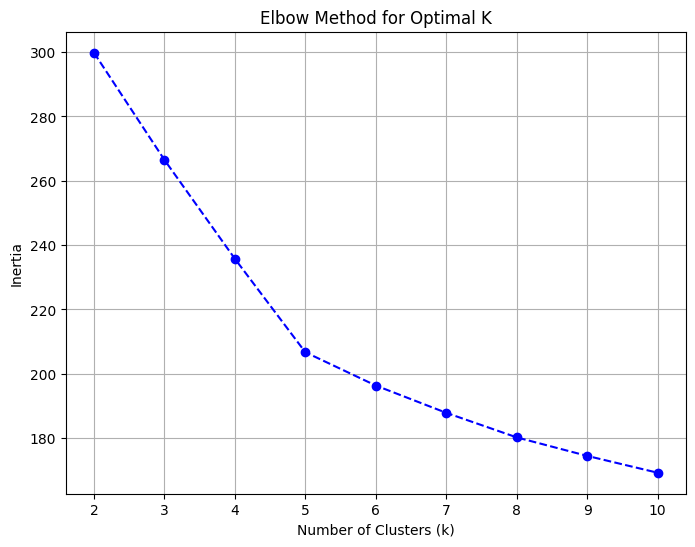

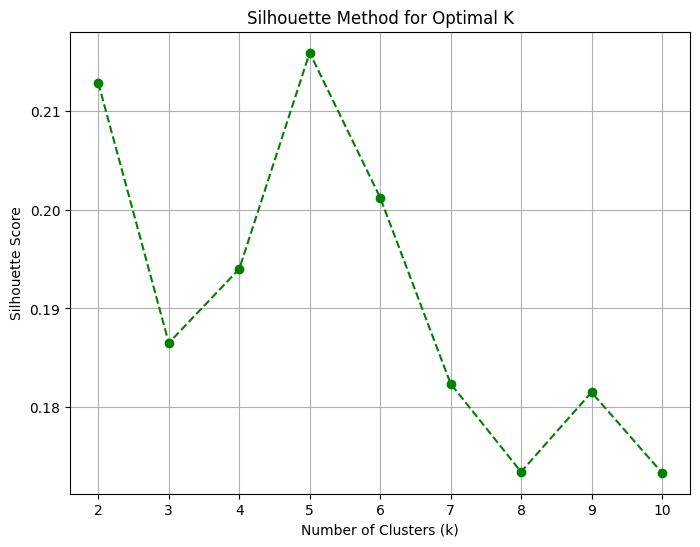

In [79]:
evaluate_kmeans_range(df_vectors_trainedsg1, k_range=range(2,11), init_method="k-means++", n_init=10, max_iter=300, tol=1e-4, random_state=42)

In [80]:
kmeans_model_bbc_trained_g1 = run_kmeans(df_vectors_trainedsg1, n_clusters=5)

Inertia:
 206.72088623046875
Silhouette Score: 0.2159



Βέλτιστο Silhouette Score: 0.2095 για k = 2


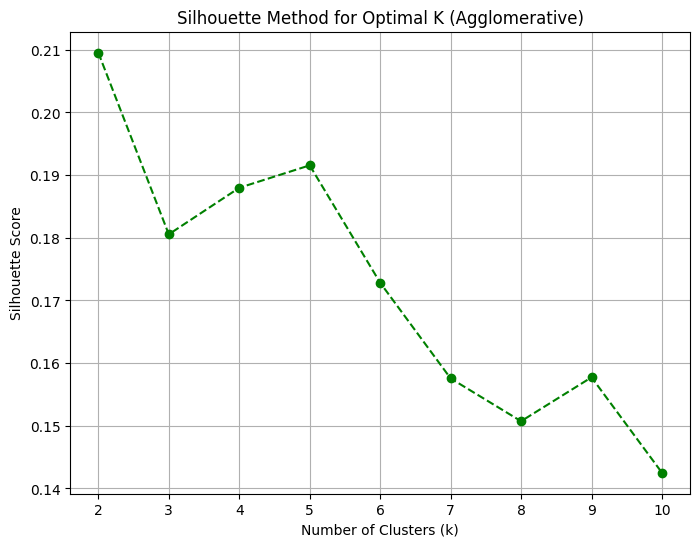

In [81]:
evaluate_agglomerative_range(df_vectors_trainedsg1, k_range=range(2, 11), linkage='ward', metric='euclidean', show_scores=True)

In [82]:
agg_model_bbc_trained_g1 = run_agglomerative_clustering(df_vectors_trainedsg1, n_clusters=2, show_dendrogram=False)


Silhouette Score: 0.2095


In [83]:
hdbscan_model_bbc_trained_g1 = run_hdbscan_clustering(df_vectors_trainedsg1, min_cluster_size=10, min_samples=5, compute_score=True, show_probabilities=False)


Silhouette Score (χωρίς τους outliers): 0.1169

Αριθμός clusters: 2
Αριθμός outliers: 269



KMeans (k = 5):
  NMI: 0.7782
  AMI: 0.7775
  ARI: 0.8055

Agglomerative (k = 2):
  NMI: 0.4857
  AMI: 0.4851
  ARI: 0.3283

HDBSCAN (k = 2):
  NMI: 0.0152
  AMI: 0.0124
  ARI: 0.0012


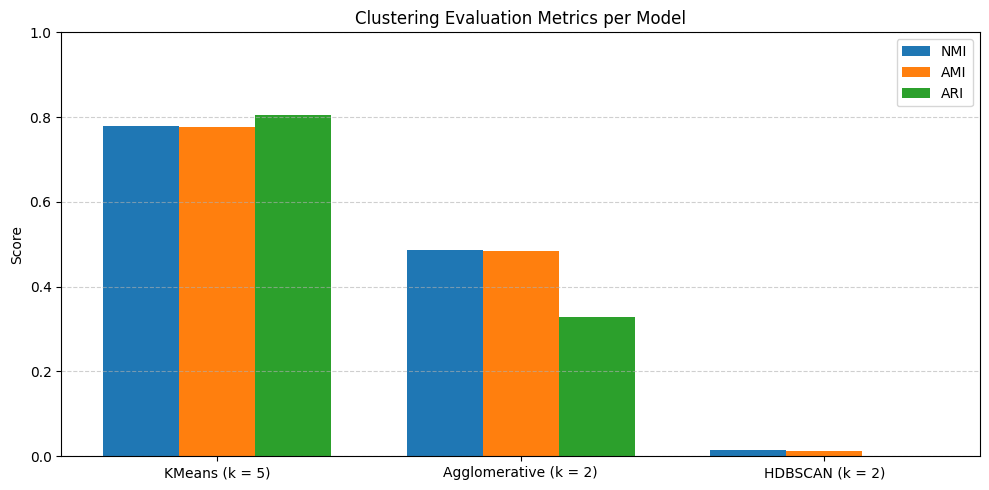

In [84]:
models = [kmeans_model_bbc_trained_g1, agg_model_bbc_trained_g1, hdbscan_model_bbc_trained_g1]
titles = ["KMeans (k = 5)", "Agglomerative (k = 2)", "HDBSCAN (k = 2)"]
true_labels_list = [df["Category"], df["Category"], df["Category"]]

evaluate_clustering_models(true_labels_list, models, titles)

In [85]:
add_results("BBC News dataset",
        "Custom Fasttext SG=1",
        "None",
        "KMeans",
        5,
        0.2159,
        0.7782,
        0.7775,
        0.8055,
        "Πολύ καλά αποτελέσματα")

add_results("BBC News dataset",
        "Custom Fasttext SG=1",
        "None",
        "Agglomerative",
        2,
        0.2095,
        0.4857,
        0.4851,
        0.3283,
        "Μέτρια αποτελέσματα")

add_results("BBC News dataset",
        "Custom Fasttext SG=1",
        "None",
        "HDBSCAN",
        2,
        0.1169,
        0.0152,
        0.0124,
        0.0012,
        "Πολύ χαμηλά αποτελέσματα")

## Trained FastText χωρίς PCA (SG = 1)

Σε αυτή την περίπτωση, χρησιμοποιήθηκε εκπαιδευμένο μοντέλο FastText με `sg=1` (Skip-gram) **χωρίς** εφαρμογή PCA.

Παρατηρείται ότι στην `evaluate_kmeans_range()` αναγνωρίστηκε σωστά ο πραγματικός αριθμός clusters (`k = 5`). Αντίθετα, στον Agglomerative Clustering αυτή τη φορά εντοπίστηκε `k = 2`, που είναι λάθος. 

Αυτά τα αποτελέσματα είναι **αντίστροφα** σε σχέση με εκείνα που προέκυψαν για το **pretrained FastText με `sg=0`**, όπου ο Agglomerative εντόπισε καλύτερα τη δομή ενώ ο KMeans όχι.

Στη συνέχεια, θα εφαρμοστεί PCA για να εξεταστεί αν η μείωση των διαστάσεων μπορεί να βελτιώσει τα αποτελέσματα των clustering αλγορίθμων.

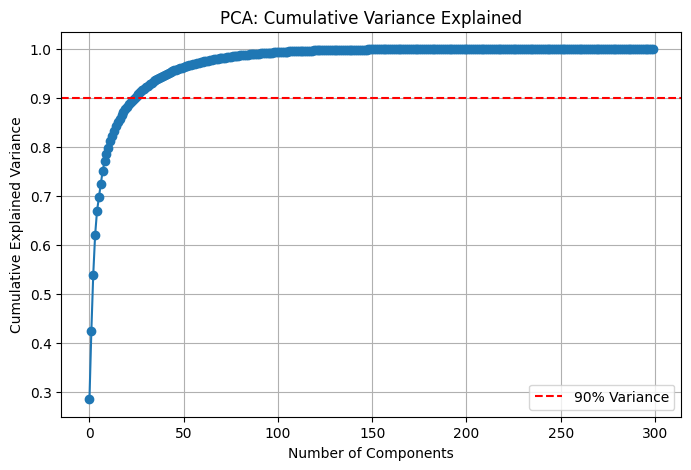

In [86]:
# Κάνουμε PCA με όλους τους συντελεστές για ανάλυση
pca_full = PCA()
pca_full.fit(df_vectors_trainedsg1)

# Υπολογίζω το σωρευτικό άθροισμα (cumulative sum) των ποσοστών διασποράς που εξηγούνται από τις συνιστώσες του PCA.
# Η pca_full.explained_variance_ratio_ περιέχει για κάθε PCA συνιστώσα το ποσοστό της αρχικής πληροφορίας (variance) που εξηγεί.
# Με την np.cumsum υπολογίζω πόση συνολική πληροφορία καλύπτεται αν κρατήσω τις πρώτες n συνιστώσες.
# Αυτό με βοηθά να αποφασίσω πόσες συνιστώσες χρειάζομαι για να διατηρώ, π.χ., το 90% της πληροφορίας.
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Cumulative Variance Explained")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label="90% Variance")
plt.legend()
plt.show()

Στο νέο μοντέλο FastText με `sg=1` (Skip-gram), παρατηρούμε από την ανάλυση PCA ότι το 90% της συνολικής διασποράς εξηγείται περίπου από τα 20 πρώτα κύρια συστατικά. Συνεπώς, για τα επόμενα βήματα θα εφαρμόσουμε PCA με `n_components = 20`.

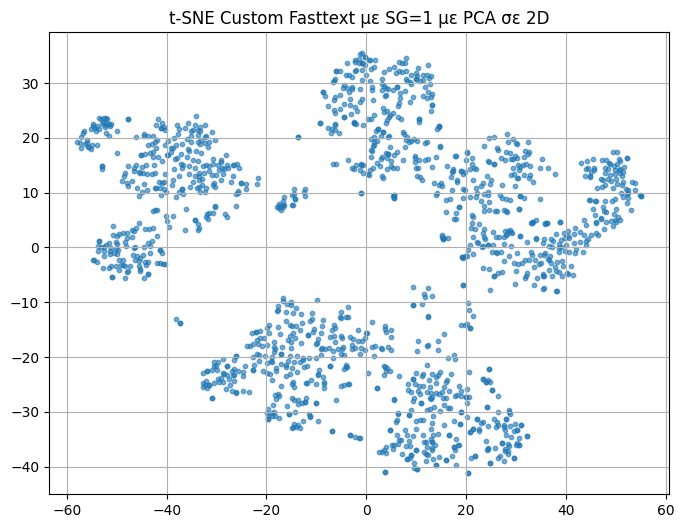

In [99]:
pca_20n = PCA(20)
df_vectors_trained_pcasg1 = pca_20n.fit_transform(df_vectors_trainedsg1)

tsne = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
df_vectors_trained_pcasg1_tsne = tsne.fit_transform(df_vectors_trained_pcasg1)

plt.figure(figsize=(8, 6))
plt.scatter(df_vectors_trained_pcasg1_tsne[:, 0], df_vectors_trained_pcasg1_tsne[:, 1], s=10, alpha=0.6)
plt.title("t-SNE Custom Fasttext με SG=1 με PCA σε 2D")
plt.grid(True)
plt.show()

## Παρατήρηση μετά από t-SNE στο Custom FastText (SG = 1) με PCA

Με την εφαρμογή t-SNE σε δύο διαστάσεις, αφού προηγουμένως έγινε μείωση διαστάσεων με PCA και χρησιμοποιήθηκε το εκπαιδευμένο μοντέλο FastText με `SG = 1`, ο διαχωρισμός των ομάδων φαίνεται **σαφώς βελτιωμένος** σε σχέση με τις προηγούμενες περιπτώσεις.

Παρατηρούνται πλέον **πιο καθαρά πέντε βασικές ομάδες**, ενώ μέσα σε αυτές εμφανίζονται και **υποομάδες**, γεγονός που υποδηλώνει εσωτερική διαφοροποίηση στη θεματολογία.

Αυτό επιβεβαιώνεται και από το γράφημα της `evaluate_kmeans_range`, όπου πέρα από το κύριο peak στο `k = 5`, παρατηρείται και ένα δεύτερο peak στο `k = 9`, ενισχύοντας την υπόθεση ότι υπάρχουν επιμέρους δομές μέσα στις βασικές ομάδες.


Βέλτιστο Silhouette Score: 0.2612 για k = 5


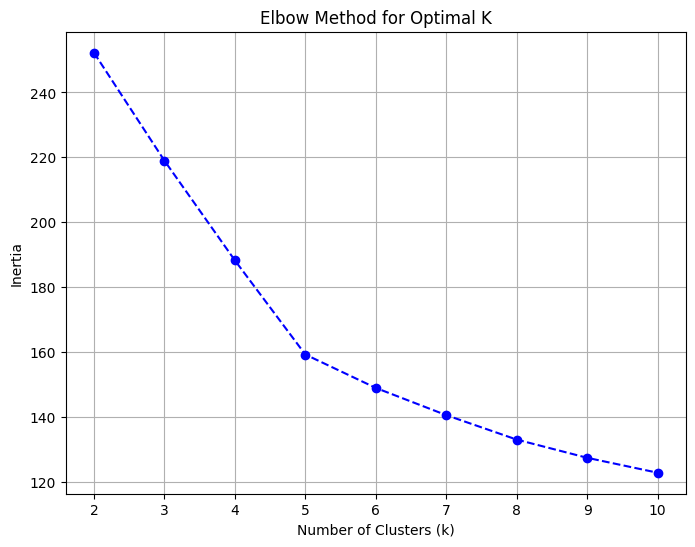

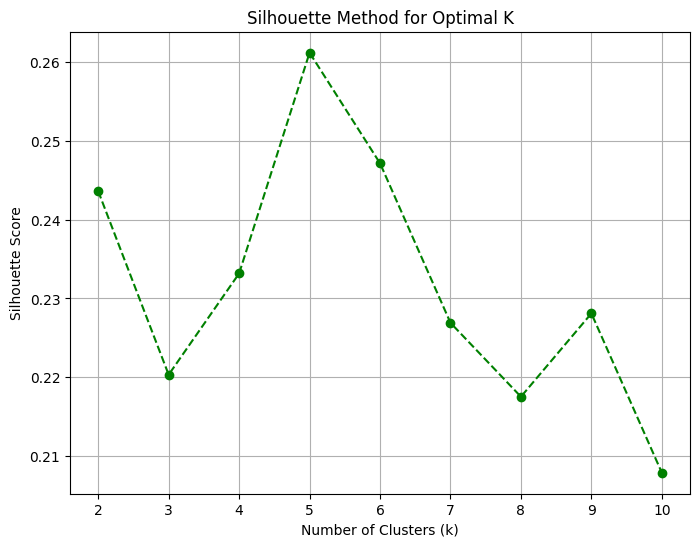

In [100]:
evaluate_kmeans_range(df_vectors_trained_pcasg1, k_range=range(2,11), init_method="k-means++", n_init=10, max_iter=300, tol=1e-4, random_state=42)

Η νέα εκτέλεση της `evaluate_kmeans_range()` για το μοντέλο FastText με `sg=1` και PCA (n_components=20), εμφανίζει πλέον ως βέλτιστη τιμή το **k = 5**, με **Silhouette Score = 0.2612**. Το αποτέλεσμα αυτό συνάδει με τον πραγματικό αριθμό των κατηγοριών στο dataset, και είναι σημαντικά βελτιωμένο σε σχέση με τις προηγούμενες δοκιμές.

In [101]:
kmeans_model_bbc_trained_pca20 = run_kmeans(df_vectors_trained_pcasg1, n_clusters=5)

Inertia:
 159.25753784179688
Silhouette Score: 0.2612


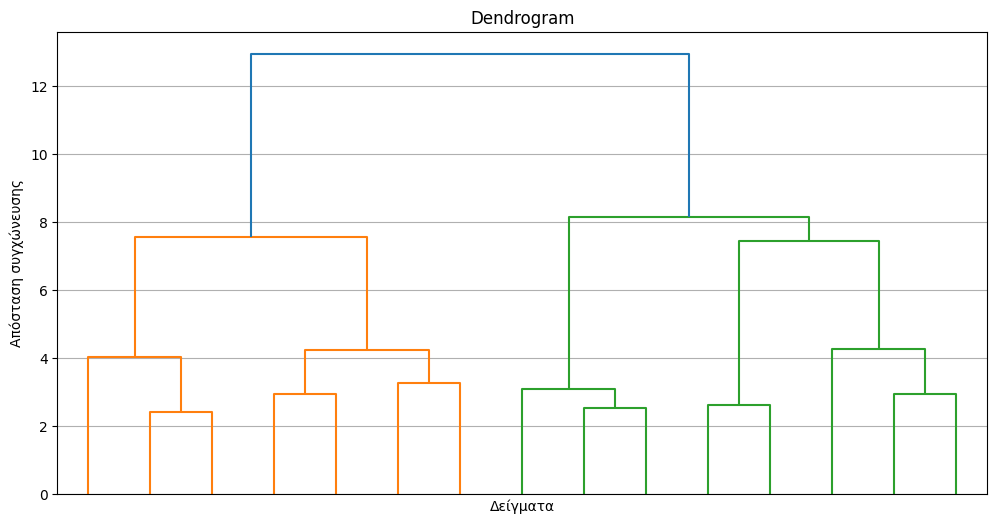

In [102]:
plot_dendrogram_only(df_vectors_trained_pcasg1, linkage_method='ward', metric='euclidean', figsize=(12, 6), title="Dendrogram", truncate_lastp=15)


Βέλτιστο Silhouette Score: 0.2428 για k = 5


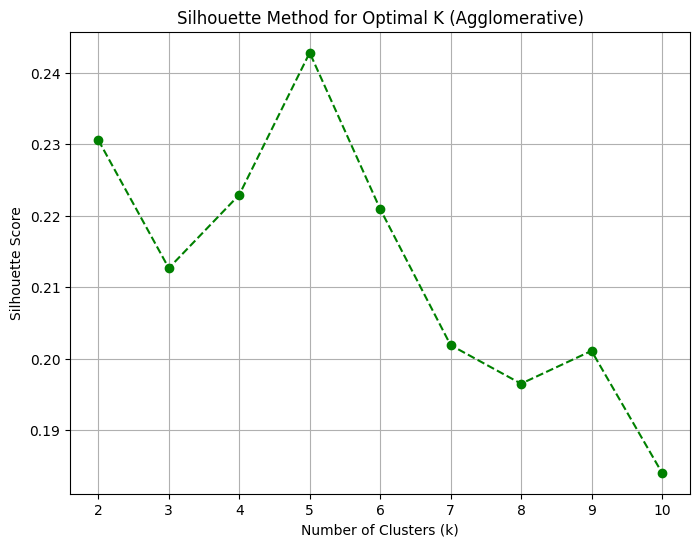

In [103]:
evaluate_agglomerative_range(df_vectors_trained_pcasg1, k_range=range(2, 11), linkage='ward', metric='euclidean', show_scores=True)

Μετά την εφαρμογή PCA ώστε να διατηρηθεί το 90% της διασποράς (με περίπου 20 συνιστώσες), ακολουθήσαμε αξιολόγηση του Agglomerative Clustering με εύρος τιμών k από 2 έως 10.

Παρατηρήσεις:
- Στο δενδρόγραμμα παρατηρούνται 5 ομάδες, όπως και στις προηγούμενες περιπτώσεις.
- Η βέλτιστη τιμή σύμφωνα με τον Silhouette Score είναι **k = 5**, με **Silhouette Score = 0.2428**.

Συνεχίζουμε επομένως με την εκπαίδευση του Agglomerative Clustering για `n_clusters=5`.

In [104]:
agg_model_bbc_trained_pca20 = run_agglomerative_clustering(df_vectors_trained_pcasg1, n_clusters=5, show_dendrogram=False)


Silhouette Score: 0.2428


In [105]:
hdbscan_model_bbc_trained_pca20 = run_hdbscan_clustering(df_vectors_trained_pcasg1, min_cluster_size=10, min_samples=5, compute_score=True, show_probabilities=False)


Silhouette Score (χωρίς τους outliers): 0.2906

Αριθμός clusters: 8
Αριθμός outliers: 943


Μετά την εφαρμογή PCA (n = 20), εφαρμόστηκε HDBSCAN με `min_cluster_size=10` και `min_samples=5`.

Αποτελέσματα:
- **Silhouette Score (χωρίς τους outliers)**: 0.2906
- **Αριθμός clusters**: 8
- **Αριθμός outliers**: 943

Το αποτέλεσμα είναι βελτιωμένο σε σχέση με τις προηγούμενες εφαρμογές του HDBSCAN, τόσο ως προς το Silhouette Score όσο και ως προς την κατανομή των δεδομένων σε περισσότερα clusters.

In [106]:
hdbscan_model_bbc_trained_pca20_2 = run_hdbscan_clustering(df_vectors_trained_pcasg1, min_cluster_size=18, min_samples=7, compute_score=True, show_probabilities=False)


Silhouette Score (χωρίς τους outliers): 0.2569

Αριθμός clusters: 5
Αριθμός outliers: 1021


### Σημασία Παραμετροποίησης στον HDBSCAN

Κατόπιν επαναληπτικών δοκιμών με διαφορετικές τιμές παραμέτρων στον HDBSCAN (PCA n = 20), προέκυψαν τα εξής αποτελέσματα για:

- `min_cluster_size = 18`
- `min_samples = 7`

**Αποτελέσματα:**
- Silhouette Score (χωρίς τους outliers): 0.2564
- Αριθμός clusters: 5
- Αριθμός outliers: 1021

Το αποτέλεσμα αυτό, παρότι εμφανίζει χαμηλότερο Silhouette Score από την προηγούμενη εκτέλεση, δείχνει μικρότερο αριθμό clusters και αυξημένους outliers. Αυτό αναδεικνύει τη σημασία της εις βάθος κατανόησης των αλγορίθμων και της σωστής παραμετροποίησής τους, ώστε να προσαρμόζονται κατάλληλα στο εκάστοτε dataset και πρόβλημα.


KMeans (k = 5):
  NMI: 0.7789
  AMI: 0.7782
  ARI: 0.8054

Agglomerative (k = 5):
  NMI: 0.8106
  AMI: 0.8100
  ARI: 0.8359

HDBSCAN (k = 8):
  NMI: 0.3346
  AMI: 0.3295
  ARI: 0.0644


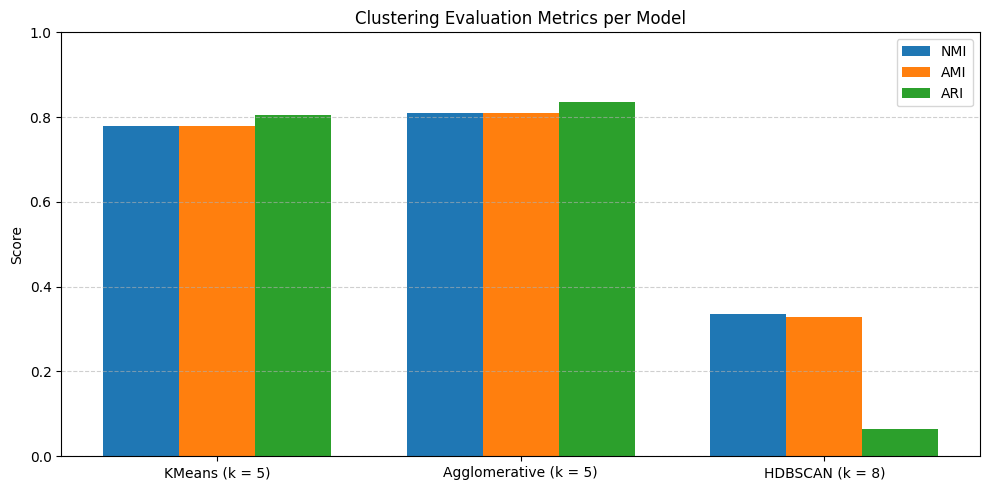

In [107]:
models = [kmeans_model_bbc_trained_pca20, agg_model_bbc_trained_pca20, hdbscan_model_bbc_trained_pca20]
titles = ["KMeans (k = 5)", "Agglomerative (k = 5)", "HDBSCAN (k = 8)"]
true_labels_list = [df["Category"], df["Category"], df["Category"]]

evaluate_clustering_models(true_labels_list, models, titles)

Τα αποτελέσματα δείχνουν ξεκάθαρα τη βελτίωση των KMeans και Agglomerative clustering σε σχέση με τις προηγούμενες εκτελέσεις χωρίς PCA, με **πολύ υψηλές επιδόσεις στις μετρικές NMI, AMI και ARI**.

Παρότι ο HDBSCAN με παραμετροποίηση (min_cluster_size = 18, min_samples = 7) εντοπίζει 5 clusters, τα αποτελέσματα στις μετρικές είναι **χειρότερα** από την προηγούμενη εκτέλεση (`hdbscan_model_bbc_trained_pca20`) που εντόπισε **8 clusters και λιγότερους outliers**. Αυτό επιβεβαιώνει ότι, ακόμα και αν τα clusters “φαίνονται” σωστά οπτικά ή αριθμητικά, η **δομική ομοιότητα με τις αληθινές κατηγορίες** μπορεί να είναι πολύ χαμηλότερη — γεγονός που υπογραμμίζει τη σημασία της **αξιολόγησης με κατάλληλες μετρικές** και όχι μόνο την παρατήρηση πλήθους ή μορφής των clusters.

In [108]:
add_results("BBC News dataset",
        "Custom Fasttext SG=1",
        "PCA 20",
        "KMeans",
        5,
        0.2612,
        0.7789,
        0.7782,
        0.8054,
        "Πολύ καλά αποτελέσματα")

add_results("BBC News dataset",
        "Custom Fasttext SG=1",
        "PCA 20",
        "Agglomerative",
        5,
        0.2428,
        0.8106,
        0.8100,
        0.8359,
        "Πολύ καλά αποτελέσματα")

add_results("BBC News dataset",
        "Custom Fasttext SG=1",
        "PCA 20",
        "HDBSCAN",
        8,
        0.2906,
        0.3346,
        0.3295,
        0.0644,
        "Πολύ χαμηλά αποτελέσματα")

## 2. Ανάλυση στο Dataset "20 Newsgroups"

Σε αυτό το σημείο ξεκινά η ανάλυση στο δεύτερο dataset της εργασίας, το **20 Newsgroups**.

Ακολουθεί ο κώδικας που μας παρείχε ο καθηγητής του μαθήματος για την εξαγωγή και προεπεξεργασία των δεδομένων του dataset, το οποίο θα χρησιμοποιηθεί για την επόμενη φάση της ανάλυσης.

In [109]:
data_20newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents_20newsgroups = data_20newsgroups.data
labels_20newsgroups = data_20newsgroups.target
labels_names_20newsgroups = data_20newsgroups.target_names
news_dict = {
    'label': labels_20newsgroups,
    'comment': documents_20newsgroups,
}
news_df = pd.DataFrame(news_dict)
news_df['label_name'] = news_df['label'].apply(lambda x: labels_names_20newsgroups[x])

_, x_test_news, _, y_test_news = train_test_split(
    news_df,
    news_df['label'],
    test_size=0.1,
    random_state=42,
    stratify=news_df['label']
)
 ### use the x_test_news ###

In [110]:
inspect_data(x_test_news)


Σχήμα DataFrame: (1885, 3)

Πληροφορίες DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 1885 entries, 16313 to 4068
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       1885 non-null   int32 
 1   comment     1885 non-null   object
 2   label_name  1885 non-null   object
dtypes: int32(1), object(2)
memory usage: 51.5+ KB

Πρώτες 5 γραμμές:
       label  \
16313      8   
12        19   
5705       6   
17808      1   
9913      10   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

### Επιθεώρηση του Dataset "20 Newsgroups"

Το dataset αποτελείται από **1885 εγγραφές** και **δεν περιέχει καθόλου NaN τιμές**. Περιλαμβάνει τις εξής στήλες:

- `label`: Ακέραιος αριθμός που αναπαριστά την κατηγορία (θα χρησιμοποιηθεί για την αξιολόγηση των clustering μοντέλων).
- `comment`: Το κυρίως κείμενο των άρθρων, το οποίο αποτελεί το βασικό χαρακτηριστικό για την ανάλυση.
- `label_name`: Η περιγραφική ονομασία της κάθε κατηγορίας.

Τα κείμενα φαίνονται **ακατέργαστα**, με πολλά σημεία στίξης, κεφαλαία και θόρυβο, οπότε θα χρειαστεί **εκτεταμένη προεπεξεργασία**.

Επιπλέον, πολλές από τις κατηγορίες είναι **θεματικά κοντινές μεταξύ τους**, κάτι που πιθανώς θα δυσκολέψει τους αλγορίθμους ομαδοποίησης στην προσπάθεια να διαχωρίσουν τα άρθρα. Αυτό κάνει το συγκεκριμένο dataset πιο απαιτητικό σε σχέση με το προηγούμενο (BBC News), όπου οι θεματικές ήταν πιο διακριτές

Σε αυτό το βήμα εφαρμόζω έναν ελαφρύ "καθαρισμό" στα κείμενα. Χρησιμοποιώ τη συνάρτηση `clean_tokenize`, η οποία:
- διασπά το κείμενο σε λέξεις (`split`)
- μετατρέπει όλες τις λέξεις σε πεζά (`lower`)
- αφαιρεί τελείες και κόμματα που βρίσκονται στο τέλος των λέξεων

Δεν αφαιρώ άλλα σημεία στίξης ή χαρακτήρες, καθώς η εργασία δεν απαιτεί καθολική προεπεξεργασία των δεδομένων.

Στη συνέχεια, δημιουργώ μια νέα στήλη `x_test_news["Tokens"]`, όπου αποθηκεύω τις καθαρισμένες λέξεις κάθε άρθρου σε μορφή λίστας.

In [111]:
x_test_news["Tokens"] = x_test_news["comment"].apply(clean_tokenize)

In [112]:
print(x_test_news["Tokens"])

16313                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            [if, anyone, has, the, current, moto, guzzi, national, owners, club, address, please, e-mail, it, to, me, thanks, in, advance!, t.k.]
12                                                                                                                                               

### Δημιουργία Διανυσμάτων με Χρήση του Pretrained FastText Μοντέλου

Στη συνέχεια, εκτελώ την εντολή:

```python
df_vectors_newsg = token_vectorized(df, "Tokens", pretrained_model_fasttext_model)
```
Ο λόγος που χρησιμοποιώ ξανά το pretrained μοντέλο είναι επειδή στην ουσία συμπεριφέρεται σαν έτοιμο Word2Vec μοντέλο, επομένως θεωρώ ότι αξίζει να μελετηθεί η απόδοσή του στο συγκεκριμένο dataset.

In [113]:
df_vectors_newsg = token_vectorized(x_test_news, "Tokens", pretrained_model_fasttext_model)

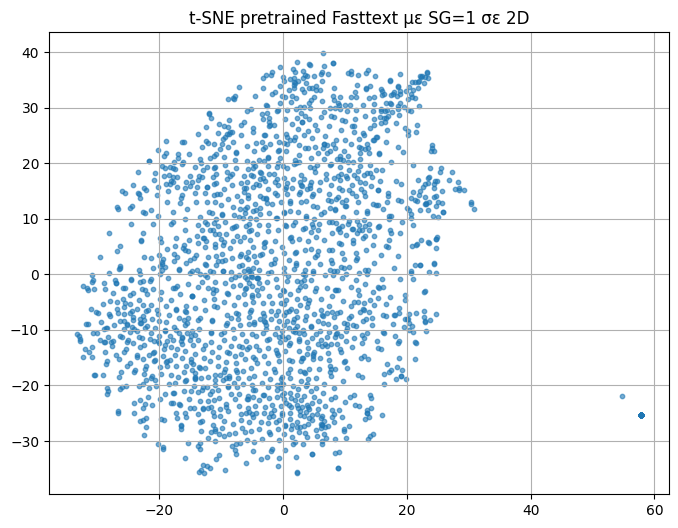

In [114]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
df_vectors_newsgsg1_tsne = tsne.fit_transform(df_vectors_newsg)

plt.figure(figsize=(8, 6))
plt.scatter(df_vectors_newsgsg1_tsne[:, 0], df_vectors_newsgsg1_tsne[:, 1], s=10, alpha=0.6)
plt.title("t-SNE pretrained Fasttext με SG=1 σε 2D")
plt.grid(True)
plt.show()

## Παρατήρηση μετά από t-SNE στο Pretrained FastText (SG = 1) σε 2D

Παρόλο που οπτικά διακρίνονται κάποιες περιοχές με ελαφρώς μεγαλύτερη πυκνότητα, γίνεται φανερό ότι πρόκειται για ένα **δύσκολο dataset**, καθώς **δεν υπάρχει σαφής διαχωρισμός των δεδομένων**.

Η κατανομή δείχνει ότι οι θεματικές κατηγορίες είναι **αλληλοκαλυπτόμενες**, γεγονός που δυσκολεύει σημαντικά το clustering, ακόμα και με τη βοήθεια προεκπαιδευμένων embeddings και τεχνικών οπτικοποίησης όπως το t-SNE.


Βέλτιστο Silhouette Score: 0.6072 για k = 2


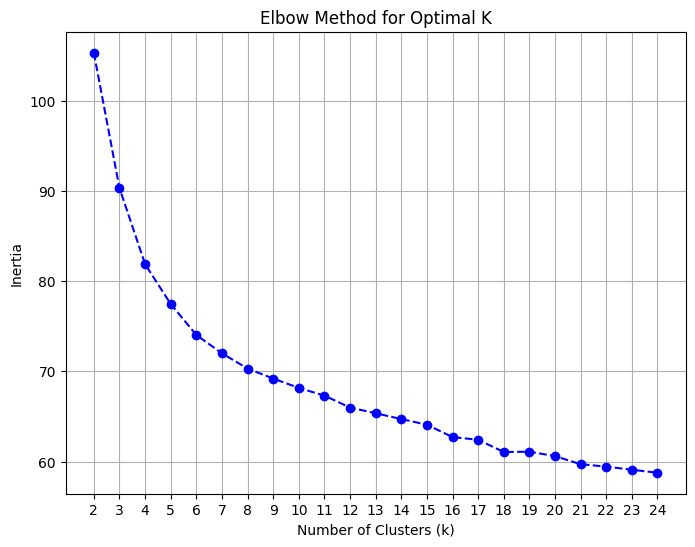

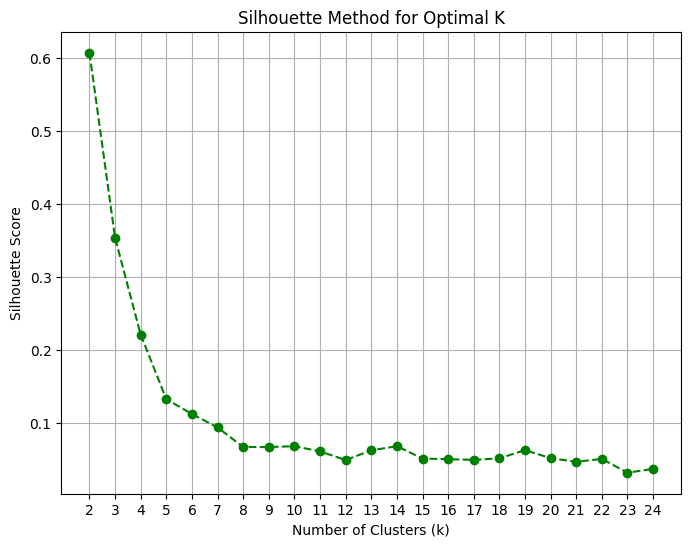

In [115]:
evaluate_kmeans_range(df_vectors_newsg, k_range=range(2,25), init_method="k-means++", n_init=10, max_iter=300, tol=1e-4, random_state=42)

### Αξιολόγηση στο 20 Newsgroups με Pretrained FastText

Εκτελέστηκε η `evaluate_kmeans_range` στο dataset του 20 Newsgroups, χρησιμοποιώντας τα διανύσματα του pretrained FastText μοντέλου. Η μέθοδος Silhouette έδειξε ως **βέλτιστο αριθμό clusters το k = 2**, με μέγιστο Silhouette Score: **0.6072**.

Το αποτέλεσμα δείχνει ότι τα clusters είναι δύσκολο να εντοπιστούν και σε αυτό το dataset.

In [116]:
kmeans_model_newsg = run_kmeans(df_vectors_newsg, n_clusters=2)

Inertia:
 105.29759228120322
Silhouette Score: 0.6072


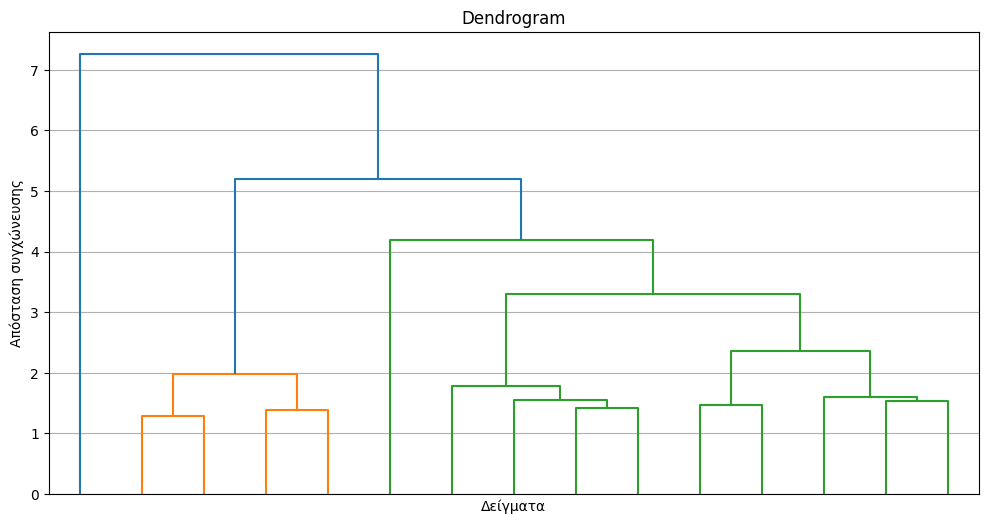

In [117]:
plot_dendrogram_only(df_vectors_newsg, linkage_method='ward', metric='euclidean', figsize=(12, 6), title="Dendrogram", truncate_lastp=15)

Αξιολόγησα τον αλγόριθμο `Agglomerative Clustering` με τη συνάρτηση evaluate_agglomerative_range(). Όπως φαίνεται από τα αποτελέσματα, και εδώ ο αλγόριθμος δυσκολεύεται να εντοπίσει τα clusters, καθώς το βέλτιστο k που προκύπτει είναι 2, με Silhouette Score 0.5814


Βέλτιστο Silhouette Score: 0.5814 για k = 2


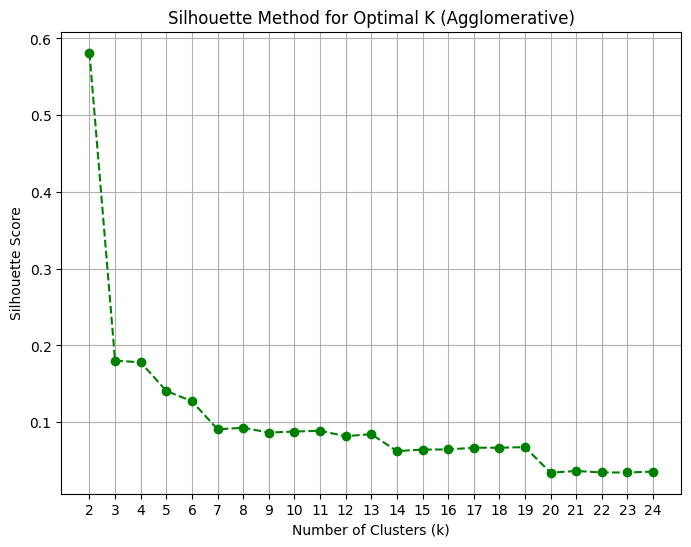

In [118]:
evaluate_agglomerative_range(df_vectors_newsg, k_range=range(2, 25), linkage='ward', metric='euclidean', show_scores=True)

In [119]:
agg_model_newsg = run_agglomerative_clustering(df_vectors_newsg, n_clusters=2, show_dendrogram=False)


Silhouette Score: 0.5814


Συνεχίζω με τον HDBSCAN όπου κι εδώ τα αποτελέσματα δείχνουν οτι ο αλγόριθμος αποτυγχάνει να πλησιάσει τον σωστό αριθμό clusters.

In [120]:
hdbscan_model_newsg = run_hdbscan_clustering(df_vectors_newsg, min_cluster_size=10, min_samples=5, compute_score=True, show_probabilities=False)


Silhouette Score (χωρίς τους outliers): 0.5996

Αριθμός clusters: 2
Αριθμός outliers: 26



KMeans (k = 2):
  NMI: 0.0036
  AMI: 0.0002
  ARI: -0.0001

Agglomerative (k = 2):
  NMI: 0.0034
  AMI: -0.0001
  ARI: -0.0001

HDBSCAN (K = 2):
  NMI: 0.0066
  AMI: -0.0005
  ARI: -0.0002


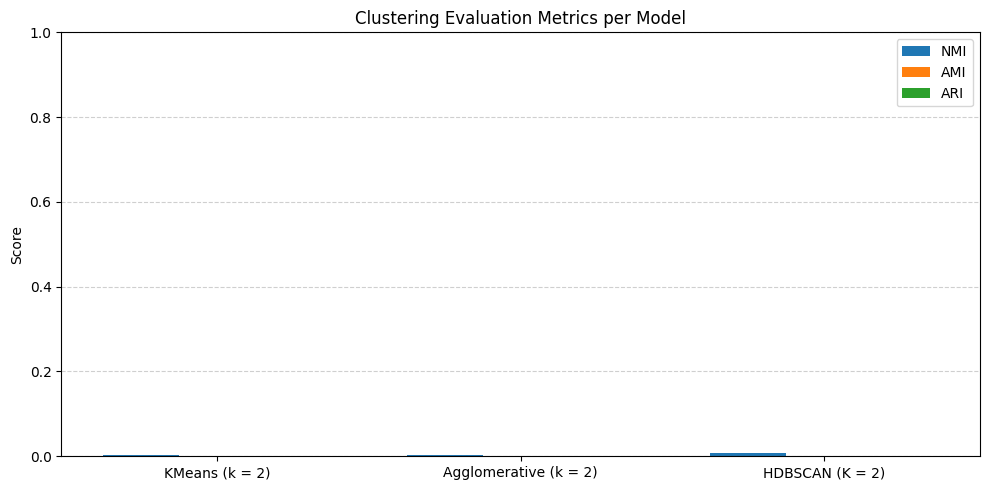

In [126]:
models = [kmeans_model_newsg, agg_model_newsg, hdbscan_model_newsg]
titles = ["KMeans (k = 2)", "Agglomerative (k = 2)", "HDBSCAN (K = 2)"]
true_labels_list = [x_test_news["label"], x_test_news["label"], x_test_news["label"]]

evaluate_clustering_models(true_labels_list, models, titles)

## Αξιολόγηση Αποτελεσμάτων Clustering (20 Newsgroups)

Οι επιδόσεις των μοντέλων είναι εξαιρετικά χαμηλές:

- Οι μετρικές **NMI, AMI και ARI** είναι σχεδόν μηδενικές ή αρνητικές.
- Παρατηρείται πλήρης αποτυχία στην αναγνώριση της των δεδομένων.
- Οι αλγόριθμοι **δεν κατάφεραν να εντοπίσουν ουσιαστικές συσχετίσεις** που να ανταποκρίνονται στις πραγματικές κατηγορίες (`label`).

Συνεχίζω με **PCA** και θα ακολουθησω τα ίδια βήματα.

In [122]:
add_results("20 Newsgroups",
        "Pretrained Fasttext",
        "None",
        "KMeans",
        2,
        0.6072,
        0.0036,
        0.0002,
        -0.0001,
        "Κακά αποτελέσματα")

add_results("20 Newsgroups",
        "Pretrained Fasttext",
        "None",
        "Agglomerative",
        2,
        0.5814,
        0.0034,
        -0.0001,
        -0.0001,
        "Κακά αποτελέσματα")

add_results("20 Newsgroups",
        "Pretrained Fasttext",
        "None",
        "HDBSCAN",
        2,
        0.5996,
        0.0066,
        -0.0005,
        -0.0002,
        "Κακά αποτελέσματα")

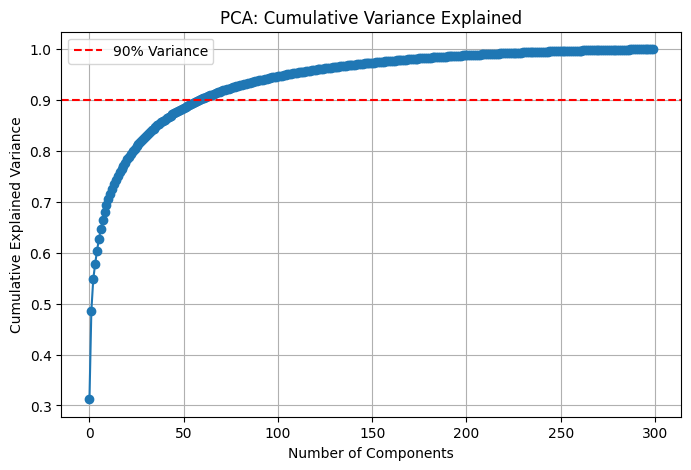

In [123]:
# Κάνουμε PCA με όλους τους συντελεστές για ανάλυση
pca_full = PCA()
pca_full.fit(df_vectors_newsg)

# Υπολογίζω το σωρευτικό άθροισμα (cumulative sum) των ποσοστών διασποράς που εξηγούνται από τις συνιστώσες του PCA.
# Η pca_full.explained_variance_ratio_ περιέχει για κάθε PCA συνιστώσα το ποσοστό της αρχικής πληροφορίας (variance) που εξηγεί.
# Με την np.cumsum υπολογίζω πόση συνολική πληροφορία καλύπτεται αν κρατήσω τις πρώτες n συνιστώσες.
# Αυτό με βοηθά να αποφασίσω πόσες συνιστώσες χρειάζομαι για να διατηρώ, π.χ., το 90% της πληροφορίας.
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Cumulative Variance Explained")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label="90% Variance")
plt.legend()
plt.show()

Η `PCA` ανάλυση δείχνει πως το 90% της πληροφορίας βρίσκεται περίπου για n = 55

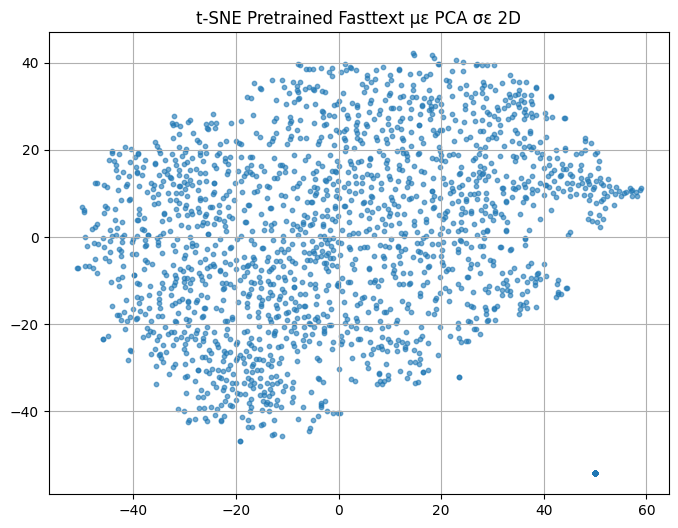

In [124]:
pca_55n = PCA(55)
df_vectors_news20_pca = pca_55n.fit_transform(df_vectors_newsg)

tsne = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
df_vectors_newsgsg1_pca_tsne = tsne.fit_transform(df_vectors_news20_pca)

plt.figure(figsize=(8, 6))
plt.scatter(df_vectors_newsgsg1_pca_tsne[:, 0], df_vectors_newsgsg1_pca_tsne[:, 1], s=10, alpha=0.6)
plt.title("t-SNE Pretrained Fasttext με PCA σε 2D")
plt.grid(True)
plt.show()

## Παρατήρηση μετά από t-SNE στο Pretrained FastText (SG = 1) με PCA σε 2D

Παρατηρείται ότι, ακόμη και μετά την εφαρμογή PCA πριν από την t-SNE οπτικοποίηση, **δεν υπάρχει κάποια σημαντική βελτίωση** στον διαχωρισμό των δεδομένων. 

Τα clusters **συνεχίζουν να είναι δυσδιάκριτα**, με τις θεματικές κατηγορίες να παραμένουν **στενά αλληλένδετες**.


Βέλτιστο Silhouette Score: 0.6635 για k = 2


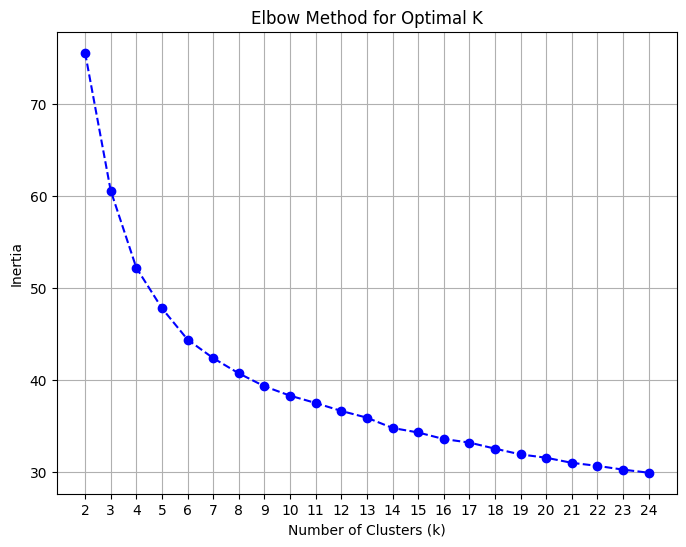

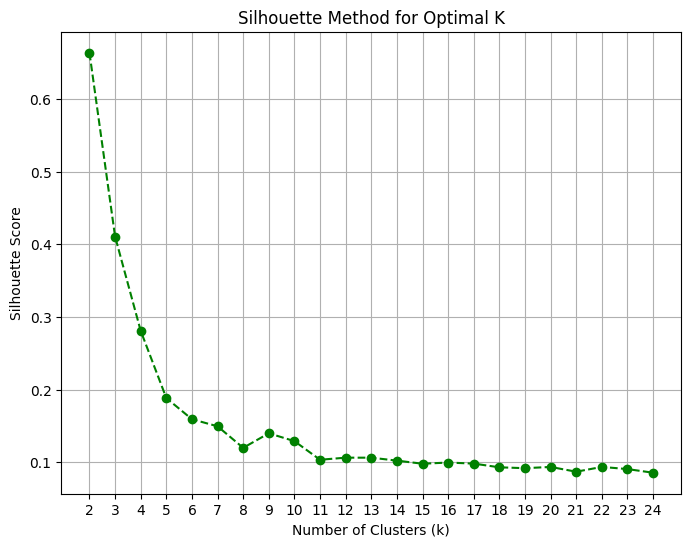

In [125]:
evaluate_kmeans_range(df_vectors_news20_pca, k_range=range(2,25), init_method="k-means++", n_init=10, max_iter=300, tol=1e-4, random_state=42)

In [127]:
kmeans_model_newsg_pca = run_kmeans(df_vectors_news20_pca, n_clusters=2)

Inertia:
 75.52766437456637
Silhouette Score: 0.6635


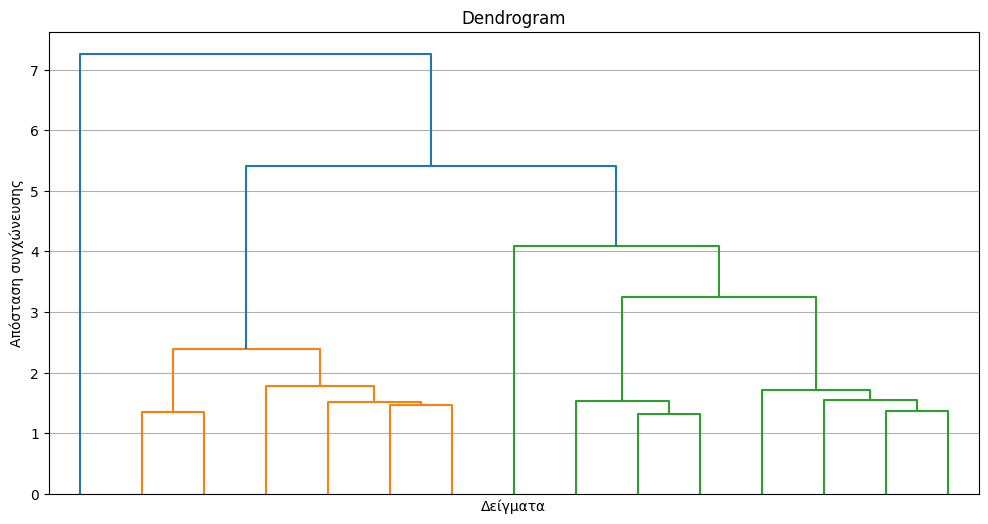

In [128]:
plot_dendrogram_only(df_vectors_news20_pca, linkage_method='ward', metric='euclidean', figsize=(12, 6), title="Dendrogram", truncate_lastp=15)


Βέλτιστο Silhouette Score: 0.6480 για k = 2


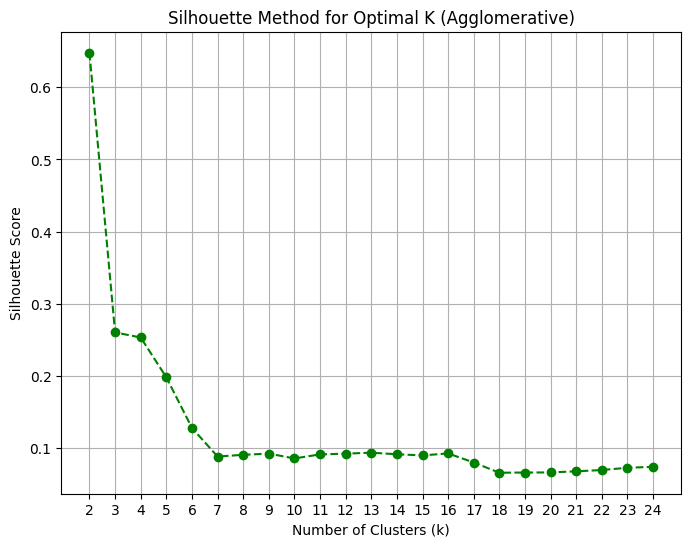

In [129]:
evaluate_agglomerative_range(df_vectors_news20_pca, k_range=range(2, 25), linkage='ward', metric='euclidean', show_scores=True)

In [130]:
agg_model_newsg_pca = run_agglomerative_clustering(df_vectors_news20_pca, n_clusters=2, show_dendrogram=False)


Silhouette Score: 0.6480


In [131]:
hdbscan_model_newsg_pca = run_hdbscan_clustering(df_vectors_news20_pca, min_cluster_size=10, min_samples=5, compute_score=True, show_probabilities=False)


Silhouette Score (χωρίς τους outliers): 0.6623

Αριθμός clusters: 2
Αριθμός outliers: 17



KMeans (k = 2):
  NMI: 0.0036
  AMI: 0.0002
  ARI: -0.0001

Agglomerative (k = 2):
  NMI: 0.0034
  AMI: -0.0001
  ARI: -0.0001

HDBSCAN:
  NMI: 0.0064
  AMI: -0.0007
  ARI: -0.0001


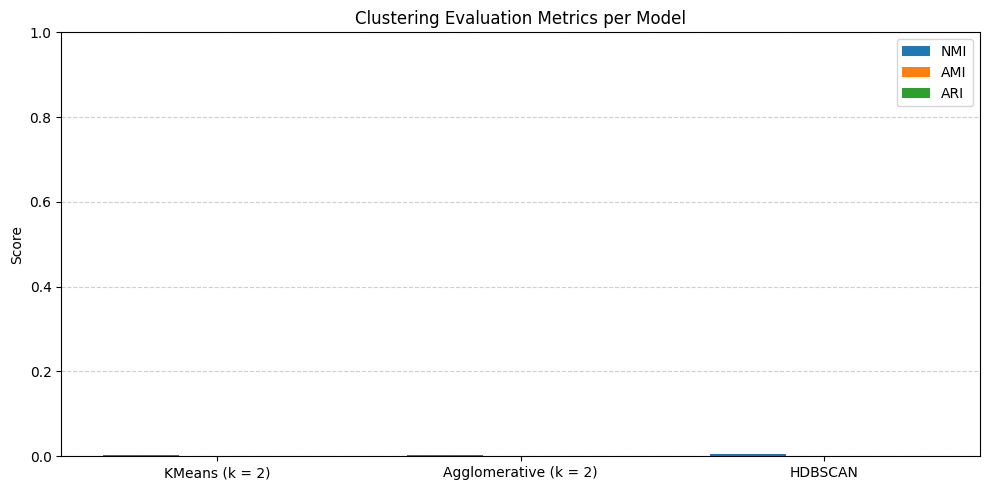

In [132]:
models = [kmeans_model_newsg_pca, agg_model_newsg_pca, hdbscan_model_newsg_pca]
titles = ["KMeans (k = 2)", "Agglomerative (k = 2)", "HDBSCAN"]
true_labels_list = [x_test_news["label"], x_test_news["label"], x_test_news["label"]]

evaluate_clustering_models(true_labels_list, models, titles)

## Παρατήρηση μετά την PCA

Παρατηρούμε πως δεν υπάρχει καμία απολύτως βελτίωση με την τεχνική PCA.  
Οι αλγόριθμοι εξακολουθούν να αποτυγχάνουν στον εντοπισμό της δομής των δεδομένων.

Συνεχίζω με εκπαίδευση FastText μοντέλου και επανάληψη των βημάτων clustering και αξιολόγησης.

In [133]:
add_results("20 Newsgroups",
        "Pretrained Fasttext με PCA",
        "PCA 55",
        "KMeans",
        2,
        0.6635,
        0.0036,
        0.0002,
        -0.0001,
        "Κακά αποτελέσματα")

add_results("20 Newsgroups",
        "Pretrained Fasttext με PCA",
        "PCA 55",
        "Agglomerative",
        2,
        0.6480,
        0.0034,
        -0.0001,
        -0.0001,
        "Κακά αποτελέσματα")

add_results("20 Newsgroups",
        "Pretrained Fasttext με PCA",
        "PCA 55",
        "HDBSCAN",
        2,
        0.6623,
        0.0064,
        -0.0007,
        -0.0001,
        "Κακά αποτελέσματα")

In [134]:
# Εκπαίδευση FastText πάνω στα tokens των άρθρων
ft_custom_2 = FastText(
    sentences=x_test_news["Tokens"],
    vector_size=300,       # ίδια διάσταση με pretrained
    window=10,              # πόσες λέξεις δεξιά/αριστερά κοιτάει
    min_count=2,           # αγνοεί λέξεις που εμφανίζονται <2 φορές
    sg=1,                  # 1 = skip-gram
    epochs=10,
    workers=1              
)

In [135]:
df_vectors_newsg_trained = token_vectorized(x_test_news, "Tokens", ft_custom_2, handles_uw=True)

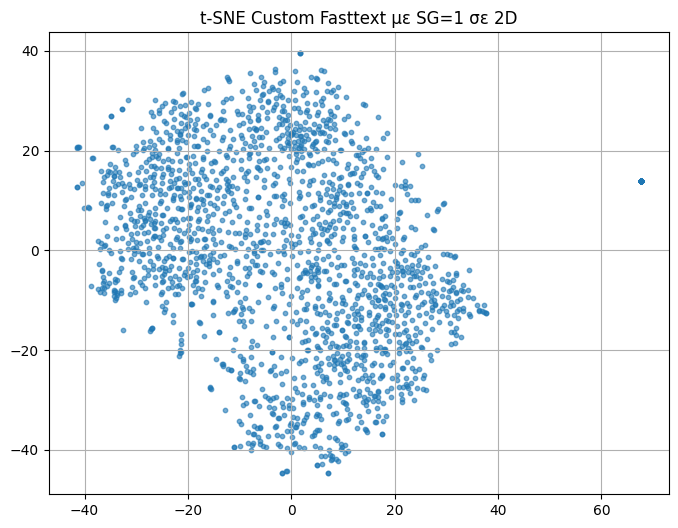

In [136]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
df_vectors_newsg_trained_tsne = tsne.fit_transform(df_vectors_newsg_trained)

plt.figure(figsize=(8, 6))
plt.scatter(df_vectors_newsg_trained_tsne[:, 0], df_vectors_newsg_trained_tsne[:, 1], s=10, alpha=0.6)
plt.title("t-SNE Custom Fasttext με SG=1 σε 2D")
plt.grid(True)
plt.show()

## Παρατήρηση μετά από t-SNE στο Custom FastText (SG = 1) σε 2D

Ακόμα και μετά την εκπαίδευση μοντέλου FastText με επιλογή `SG = 1` και την απεικόνιση των δεδομένων με t-SNE, **δεν παρατηρείται σαφής διαχωρισμός** μεταξύ των ομάδων. 

Τα δεδομένα συνεχίζουν να εμφανίζουν **μεγάλο βαθμό επικάλυψης**, γεγονός που ενισχύει την εντύπωση ότι το dataset παρουσιάζει **υψηλή πολυπλοκότητα** και αλληλεπικάλυψη θεματικών.


Βέλτιστο Silhouette Score: 0.5674 για k = 3


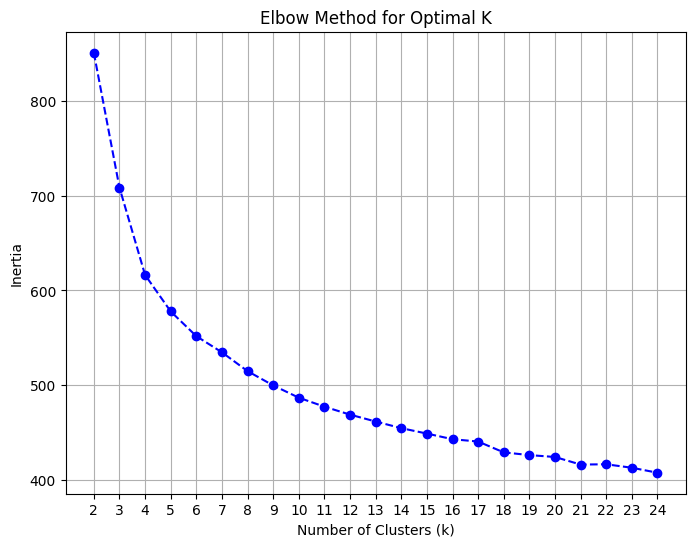

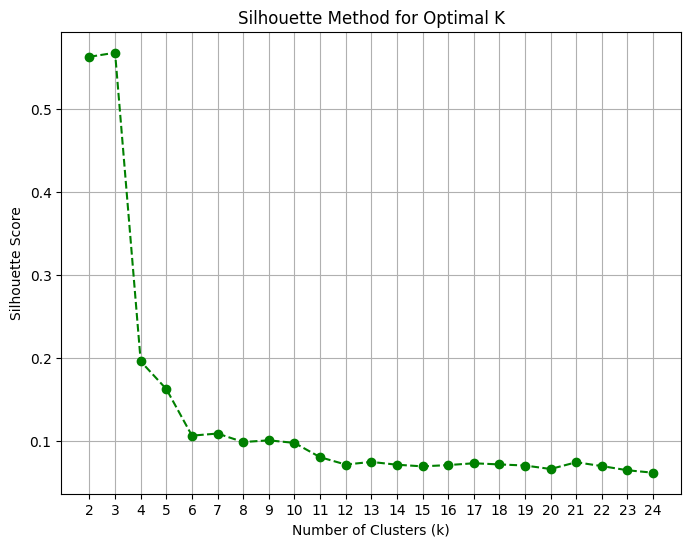

In [137]:
evaluate_kmeans_range(df_vectors_newsg_trained, k_range=range(2,25), init_method="k-means++", n_init=10, max_iter=300, tol=1e-4, random_state=42)

In [138]:
kmeans_model_newsg_trained = run_kmeans(df_vectors_newsg_trained, n_clusters=3)

Inertia:
 708.4247735065173
Silhouette Score: 0.5674



Βέλτιστο Silhouette Score: 0.5658 για k = 3


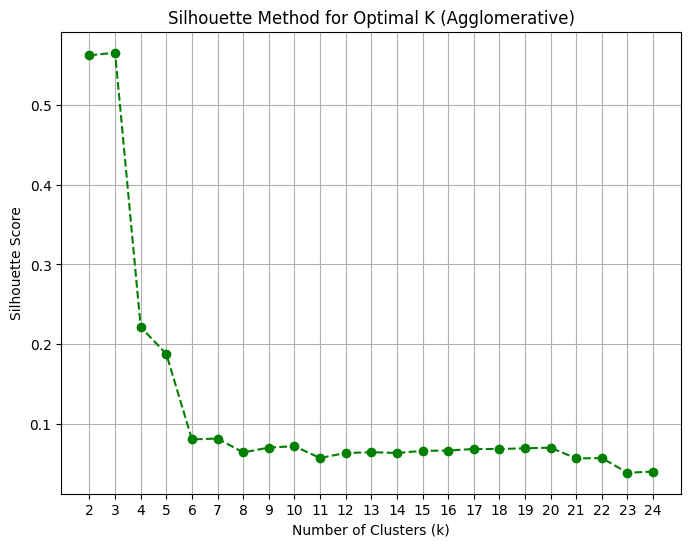

In [139]:
evaluate_agglomerative_range(df_vectors_newsg_trained, k_range=range(2, 25), linkage='ward', metric='euclidean', show_scores=True)

In [140]:
agg_model_newsg_trained = run_agglomerative_clustering(df_vectors_newsg_trained, n_clusters=3, show_dendrogram=False)


Silhouette Score: 0.5658


In [141]:
hdbscan_model_newsg_trained = run_hdbscan_clustering(df_vectors_newsg_trained, min_cluster_size=10, min_samples=5, compute_score=True, show_probabilities=False)


Silhouette Score (χωρίς τους outliers): 0.5751

Αριθμός clusters: 2
Αριθμός outliers: 13



KMeans (k = 3):
  NMI: 0.0048
  AMI: 0.0002
  ARI: -0.0001

Agglomerative (k = 3):
  NMI: 0.0048
  AMI: 0.0002
  ARI: -0.0001

HDBSCAN (k = 2):
  NMI: 0.0074
  AMI: 0.0004
  ARI: -0.0001


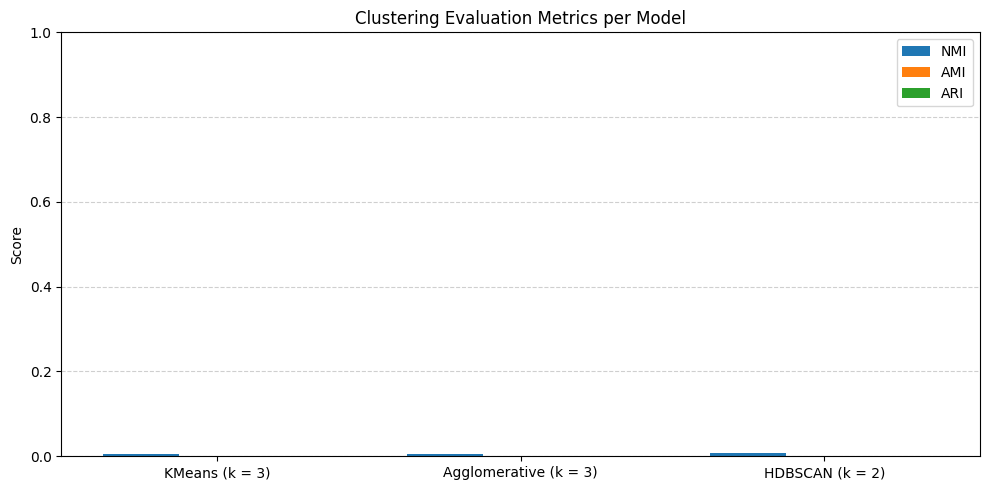

In [142]:
models = [kmeans_model_newsg_trained, agg_model_newsg_trained, hdbscan_model_newsg_trained]
titles = ["KMeans (k = 3)", "Agglomerative (k = 3)", "HDBSCAN (k = 2)"]
true_labels_list = [x_test_news["label"], x_test_news["label"], x_test_news["label"]]

evaluate_clustering_models(true_labels_list, models, titles)

## Αξιολόγηση με Εκπαιδευμένο FastText Μοντέλο

Παρατηρούμε πως και με το εκπαιδευμένο μοντέλο δεν υπήρξε ουσιαστική πρόοδος ως προς την αποτελεσματικότητα των αλγορίθμων.  
Τα αποτελέσματα συνεχίζουν να είναι, σύμφωνα με τις μετρικές, πλήρως αποτυχημένα.

Συνεχίζω με `PCA` τεχνική και επανάληψη των βημάτων.

In [143]:
add_results("20 Newsgroups",
        "Custom Fasttext",
        "None",
        "KMeans",
        3,
        0.5674,
        0.0048,
        0.0002,
        -0.0001,
        "Κακά αποτελέσματα")

add_results("20 Newsgroups",
        "Custom Fasttext",
        "None",
        "Agglomerative",
        3,
        0.5658,
        0.0048,
        0.0002,
        -0.0001,
        "Κακά αποτελέσματα")

add_results("20 Newsgroups",
        "Custom Fasttext",
        "None",
        "HDBSCAN",
        2,
        0.5751,
        0.0074,
        0.0004,
        -0.0001,
        "Κακά αποτελέσματα")

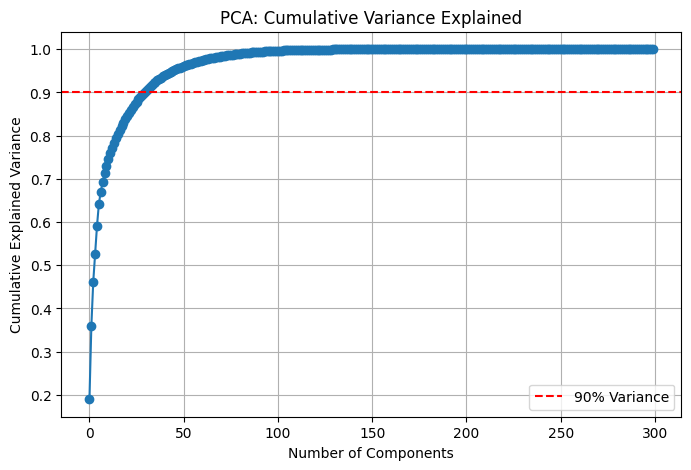

In [144]:
# Κάνουμε PCA με όλους τους συντελεστές για ανάλυση
pca_full = PCA()
pca_full.fit(df_vectors_newsg_trained)

# Υπολογίζω το σωρευτικό άθροισμα (cumulative sum) των ποσοστών διασποράς που εξηγούνται από τις συνιστώσες του PCA.
# Η pca_full.explained_variance_ratio_ περιέχει για κάθε PCA συνιστώσα το ποσοστό της αρχικής πληροφορίας (variance) που εξηγεί.
# Με την np.cumsum υπολογίζω πόση συνολική πληροφορία καλύπτεται αν κρατήσω τις πρώτες n συνιστώσες.
# Αυτό με βοηθά να αποφασίσω πόσες συνιστώσες χρειάζομαι για να διατηρώ, π.χ., το 90% της πληροφορίας.
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Cumulative Variance Explained")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label="90% Variance")
plt.legend()
plt.show()

## PCA Ανάλυση - Custom FastText Μοντέλο
Παρατηρούμε πως σύμφωνα με την `PCA` το 90% της πληροφορίας βρίσκεται περίπου στα πρώτα 45 στοιχεία (components).

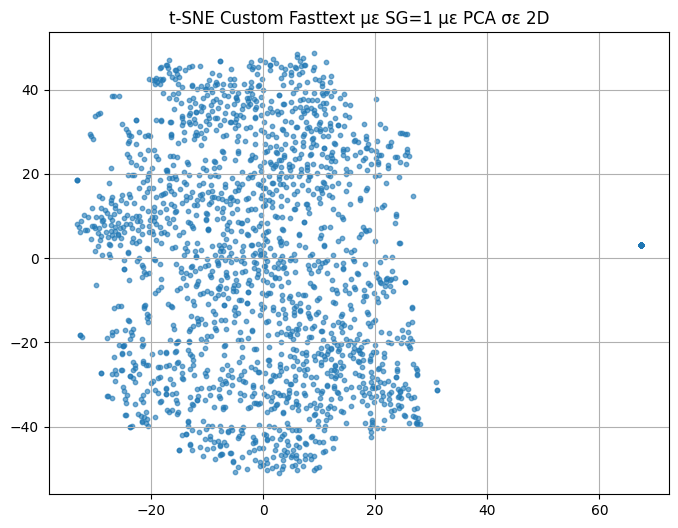

In [145]:
pca_45n = PCA(45)
df_vectors_news20_trained_pca =pca_45n.fit_transform(df_vectors_newsg_trained)

tsne = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
df_vectors_newsg_trained_pca_tsne = tsne.fit_transform(df_vectors_news20_trained_pca)

plt.figure(figsize=(8, 6))
plt.scatter(df_vectors_newsg_trained_pca_tsne[:, 0], df_vectors_newsg_trained_pca_tsne[:, 1], s=10, alpha=0.6)
plt.title("t-SNE Custom Fasttext με SG=1 με PCA σε 2D")
plt.grid(True)
plt.show()

## Παρατήρηση μετά από t-SNE στο Custom FastText (SG = 1) με PCA σε 2D

Ακόμα και μετά την εφαρμογή PCA πριν το t-SNE και τη χρήση εκπαιδευμένου μοντέλου FastText με `SG = 1`, **δεν παρατηρείται κάποιος ουσιαστικός διαχωρισμός** στα δεδομένα.

Οι ομάδες συνεχίζουν να **συγγενεύουν σημαντικά μεταξύ τους**, χωρίς να προκύπτει καθαρή δομή ή ξεκάθαρα όρια μεταξύ των θεματικών κατηγοριών.


Βέλτιστο Silhouette Score: 0.6225 για k = 3


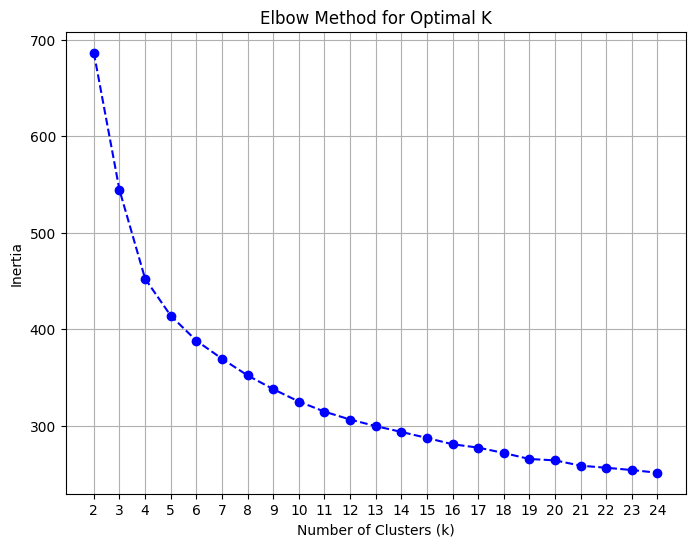

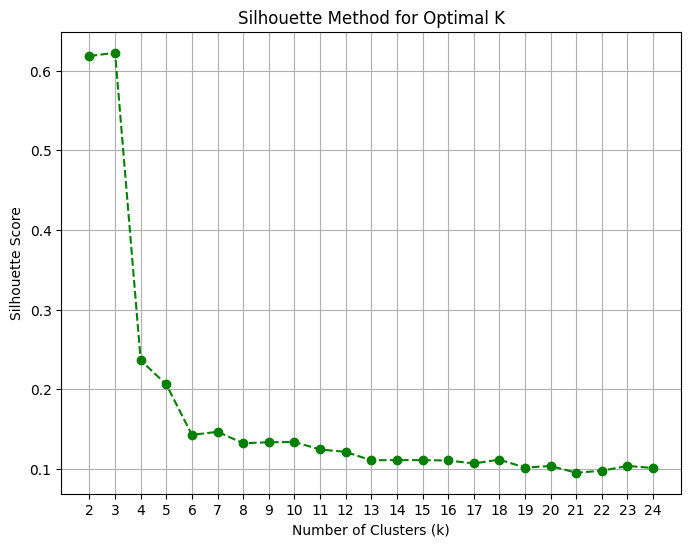

In [146]:
evaluate_kmeans_range(df_vectors_news20_trained_pca, k_range=range(2,25), init_method="k-means++", n_init=10, max_iter=300, tol=1e-4, random_state=42)

In [147]:
kmeans_model_newsg_trained_pca = run_kmeans(df_vectors_news20_trained_pca, n_clusters=3)

Inertia:
 544.3381357447704
Silhouette Score: 0.6225


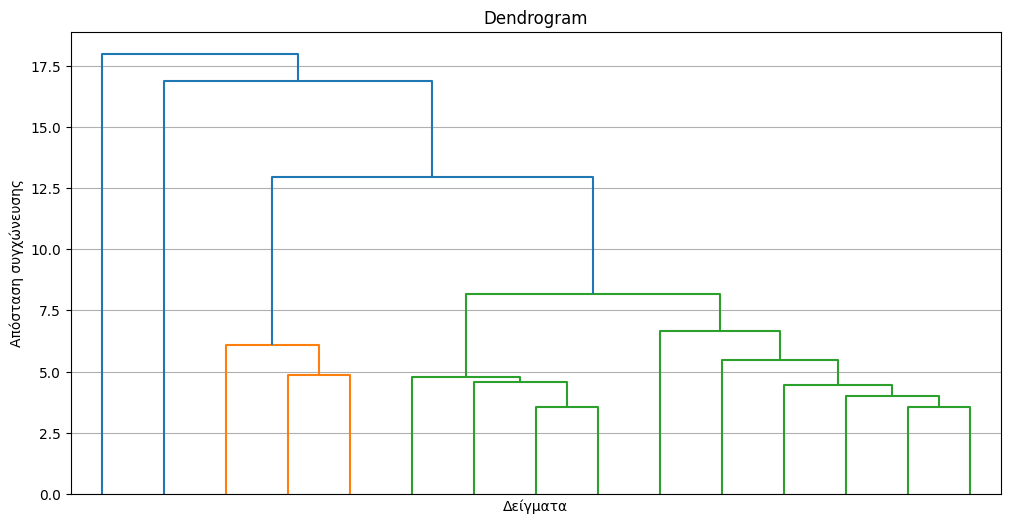

In [148]:
plot_dendrogram_only(df_vectors_news20_trained_pca, linkage_method='ward', metric='euclidean', figsize=(12, 6), title="Dendrogram", truncate_lastp=15)


Βέλτιστο Silhouette Score: 0.6217 για k = 3


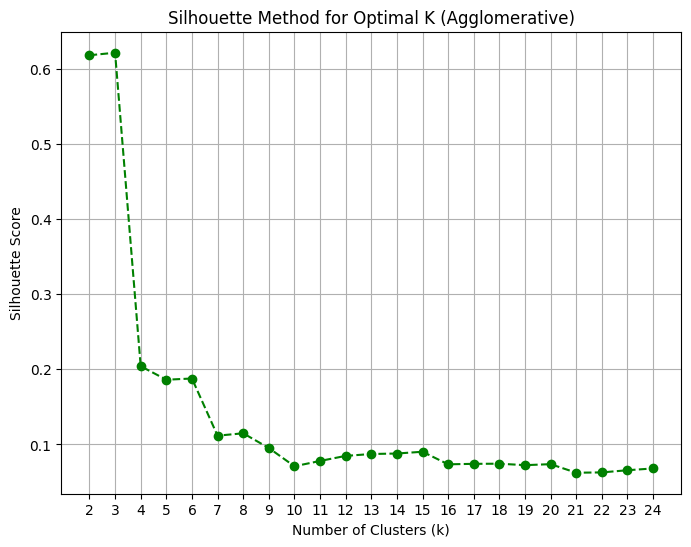

In [149]:
evaluate_agglomerative_range(df_vectors_news20_trained_pca, k_range=range(2, 25), linkage='ward', metric='euclidean', show_scores=True)

In [150]:
agg_model_newsg_trained_pca = run_agglomerative_clustering(df_vectors_news20_trained_pca, n_clusters=3, show_dendrogram=False)


Silhouette Score: 0.6217


In [151]:
hdbscan_model_newsg_trained_pca = run_hdbscan_clustering(df_vectors_news20_trained_pca, min_cluster_size=10, min_samples=5, compute_score=True, show_probabilities=False)


Silhouette Score (χωρίς τους outliers): 0.6296

Αριθμός clusters: 2
Αριθμός outliers: 10



KMeans (k = 3):
  NMI: 0.0048
  AMI: 0.0002
  ARI: -0.0001

Agglomerative (k = 3):
  NMI: 0.0048
  AMI: 0.0002
  ARI: -0.0001

HDBSCAN (k = 2):
  NMI: 0.0075
  AMI: 0.0007
  ARI: -0.0001


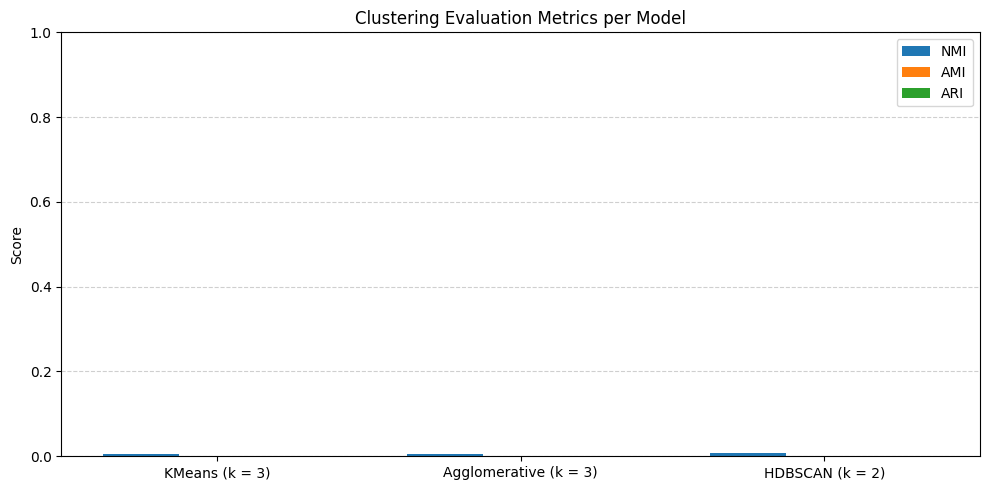

In [152]:
models = [kmeans_model_newsg_trained_pca, agg_model_newsg_trained_pca, hdbscan_model_newsg_trained_pca]
titles = ["KMeans (k = 3)", "Agglomerative (k = 3)", "HDBSCAN (k = 2)"]
true_labels_list = [x_test_news["label"], x_test_news["label"], x_test_news["label"]]

evaluate_clustering_models(true_labels_list, models, titles)

## Αξιολόγηση Μετά από Εκπαίδευση FastText και PCA

Βλέπουμε πως, ακόμα και με το εκπαιδευμένο μοντέλο και μετά την εφαρμογή `PCA`, οι αλγόριθμοι δεν καταφέρνουν να εντοπίσουν κάποια σαφή δομή στο συγκεκριμένο dataset.

Συνεχίζω με εκπαίδευση ενός `TF-IDF` μοντέλου.

In [153]:
add_results("20 Newsgroups",
        "Custom Fasttext",
        "PCA 45",
        "KMeans",
        3,
        0.0048,
        0.0002,
        0.0002,
        -0.0001,
        "Κακά αποτελέσματα")

add_results("20 Newsgroups",
        "Custom Fasttext",
        "PCA 45",
        "Agglomerative",
        3,
        0.6217,
        0.0048,
        0.0002,
        -0.0001,
        "Κακά αποτελέσματα")

add_results("20 Newsgroups",
        "Custom Fasttext",
        "PCA 45",
        "HDBSCAN",
        2,
        0.6296,
        0.0075,
        0.0007,
        -0.0001,
        "Κακά αποτελέσματα")

In [154]:
# Φτιάχνουμε τον vectorizer
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',        # αφαιρεί αγγλικά stopwords
    max_df=0.6,                  # αγνοεί όρους που εμφανίζονται σε πάνω από 90% των εγγράφων
    min_df=15,                    # αγνοεί όρους που εμφανίζονται σε λιγότερα από 5 έγγραφα
    max_features=3000,           # περιορίζει τις διαστάσεις για καλύτερο clustering
    ngram_range=(1, 2)
)

# Ενώνουμε τα tokens ξανά σε κείμενα
x_test_news["Cleaned_Text"] = x_test_news["Tokens"].apply(lambda tokens: " ".join(tokens))

# Φτιάχνουμε το TF-IDF matrix πάνω σε φιλτραρισμένα, καθαρά κείμενα
tfidf_matrix = tfidf_vectorizer.fit_transform(x_test_news["Cleaned_Text"])

# Μετατροπή σε DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

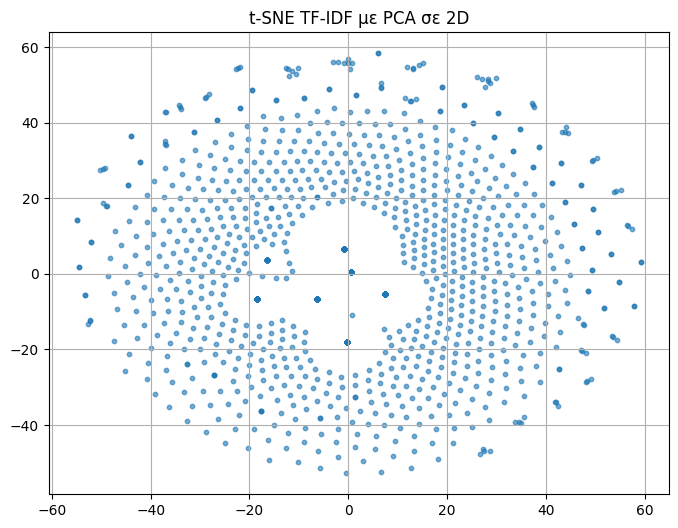

In [163]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
tfidf_newsg_tsne = tsne.fit_transform(tfidf_df)

plt.figure(figsize=(8, 6))
plt.scatter(tfidf_newsg_tsne[:, 0], tfidf_newsg_tsne[:, 1], s=10, alpha=0.6)
plt.title("t-SNE TF-IDF χωρίς PCA σε 2D")
plt.grid(True)
plt.show()

### Παρατήρηση t-SNE σε TF-IDF με PCA

Στο παραπάνω γράφημα, παρατηρώ ότι με τη χρήση του **TF-IDF**, τα δεδομένα στη πλειονότητά τους εμφανίζονται σαν **θόρυβος**, χωρίς ξεκάθαρη δομή. Υπάρχουν μερικές συστάδες στον **εξωτερικό δακτύλιο**, που ενδέχεται να υποδεικνύουν κάποιες μικρές, ασθενείς δομές. Ωστόσο, η γενική εικόνα δείχνει ότι το μοντέλο δεν κατόρθωσε να αποτυπώσει σαφώς τις εσωτερικές σχέσεις μεταξύ των κειμένων.


Βέλτιστο Silhouette Score: 0.0112 για k = 13


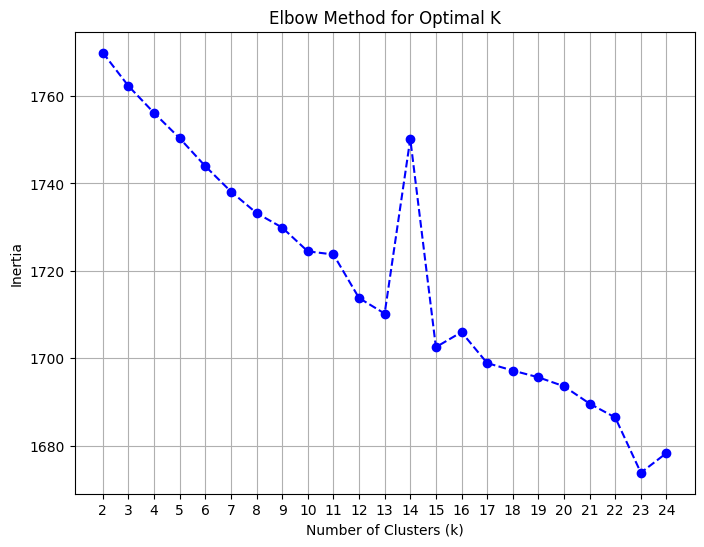

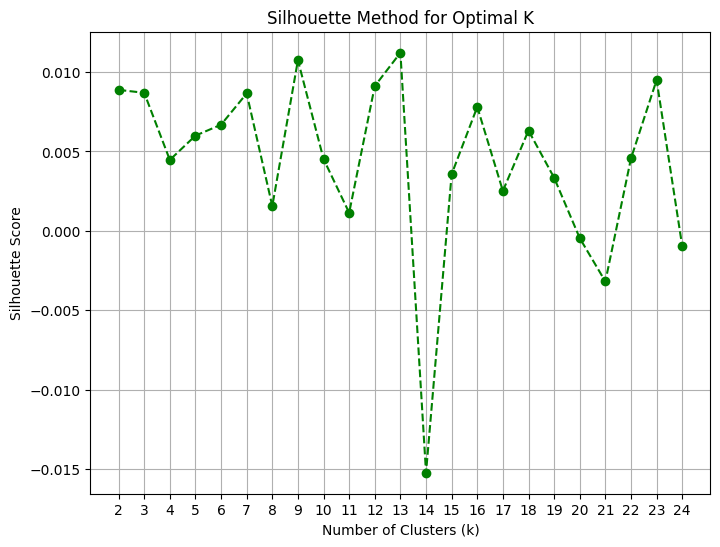

In [155]:
evaluate_kmeans_range(tfidf_df, k_range=range(2,25), init_method="k-means++", n_init=10, max_iter=300, tol=1e-4, random_state=42)

In [156]:
kmeans_model_newsg_tfidf = run_kmeans(tfidf_df, n_clusters=13)

Inertia:
 1710.2250049747565
Silhouette Score: 0.0112


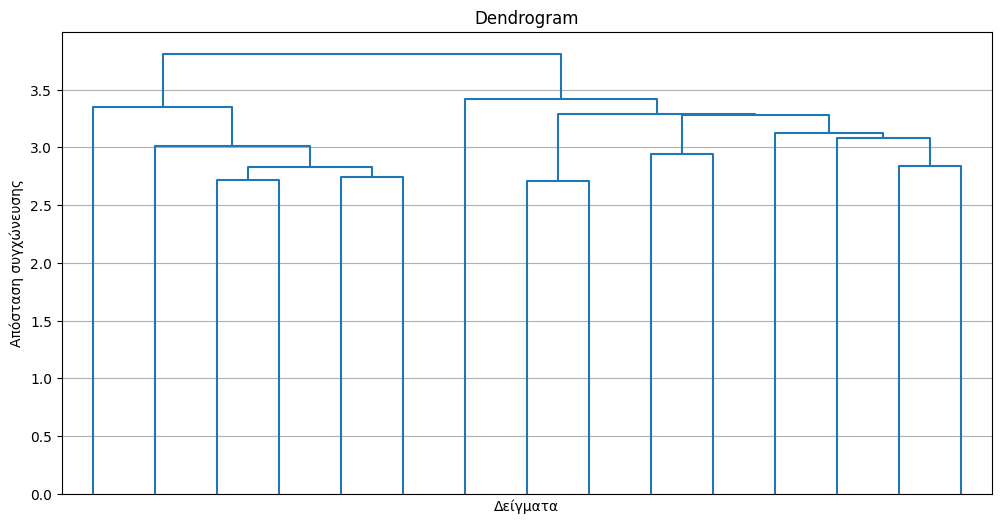

In [157]:
plot_dendrogram_only(tfidf_df, linkage_method='ward', metric='euclidean', figsize=(12, 6), title="Dendrogram", truncate_lastp=15)


Βέλτιστο Silhouette Score: 0.0103 για k = 2


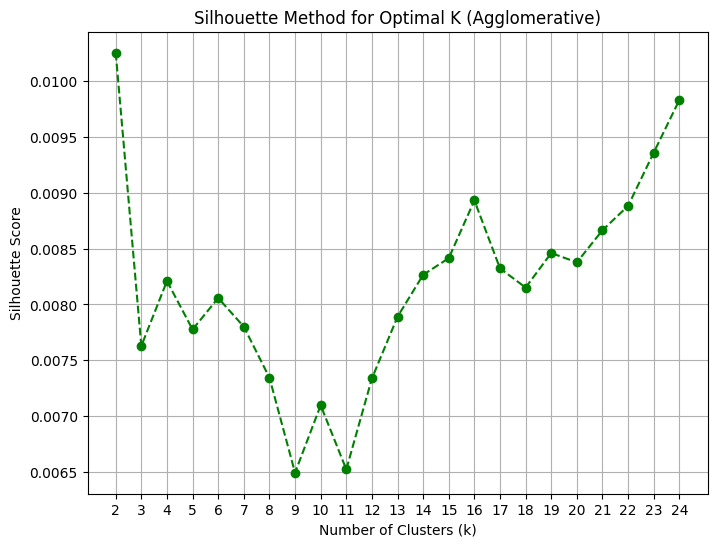

In [158]:
evaluate_agglomerative_range(tfidf_df, k_range=range(2, 25), linkage='ward', metric='euclidean', show_scores=True)

In [159]:
agg_model_newsg_tfidf = run_agglomerative_clustering(tfidf_df, n_clusters=2, show_dendrogram=False)


Silhouette Score: 0.0103


In [160]:
hdbscan_model_newsg_tfidf = run_hdbscan_clustering(tfidf_df, min_cluster_size=7, min_samples=1, compute_score=True, show_probabilities=False)


Silhouette Score (χωρίς τους outliers): 0.4121

Αριθμός clusters: 4
Αριθμός outliers: 1758



KMeans (k = 13):
  NMI: 0.2671
  AMI: 0.2483
  ARI: 0.0586

Agglomerative (k = 2):
  NMI: 0.0871
  AMI: 0.0845
  ARI: 0.0225

HDBSCAN (k = 4):
  NMI: 0.0195
  AMI: 0.0075
  ARI: -0.0001


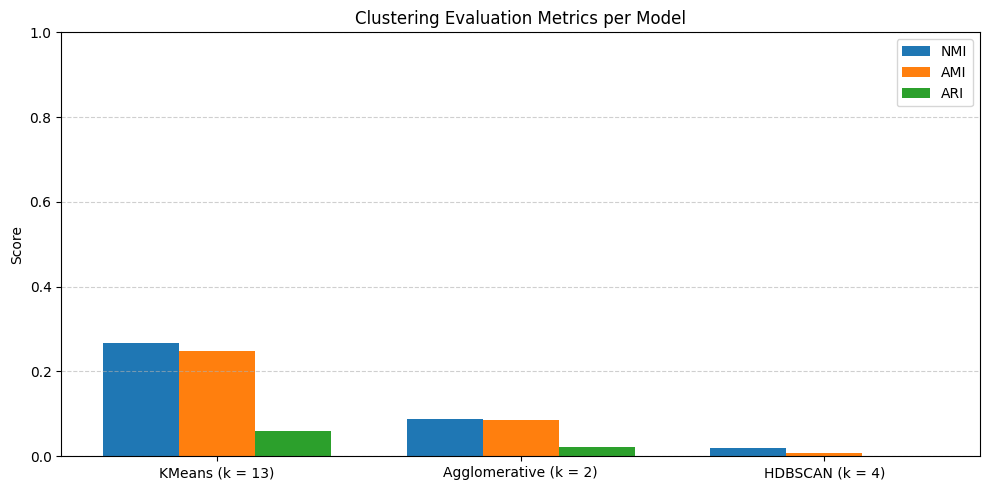

In [161]:
models = [kmeans_model_newsg_tfidf, agg_model_newsg_tfidf, hdbscan_model_newsg_tfidf]
titles = ["KMeans (k = 13)", "Agglomerative (k = 2)", "HDBSCAN (k = 4)"]
true_labels_list = [x_test_news["label"], x_test_news["label"], x_test_news["label"]]

evaluate_clustering_models(true_labels_list, models, titles)

## Αξιολόγηση Μετά από TF-IDF 

Υπάρχει μια μικρή αλλά καθόλου ικανοποιητική βελτίωση ως προς τις μετρικές για τον kmeans αλγόριθμος

In [162]:
add_results("20 Newsgroups",
        "TF-IDF",
        "None",
        "KMeans",
        13,
        0.0112,
        0.2671,
        0.2483,
        0.0586,
        "Πολύ χαμηλά αποτελέσματα")

add_results("20 Newsgroups",
        "TF-IDF",
        "None",
        "Agglomerative",
        2,
        0.0103,
        0.0871,
        0.0845,
        0.0225,
        "Κακά αποτελέσματα")

add_results("20 Newsgroups",
        "TF-IDF",
        "None",
        "HDBSCAN",
        4,
        0.4121,
        0.0195,
        0.0075,
        -0.0001,
        "Κακά αποτελέσματα")

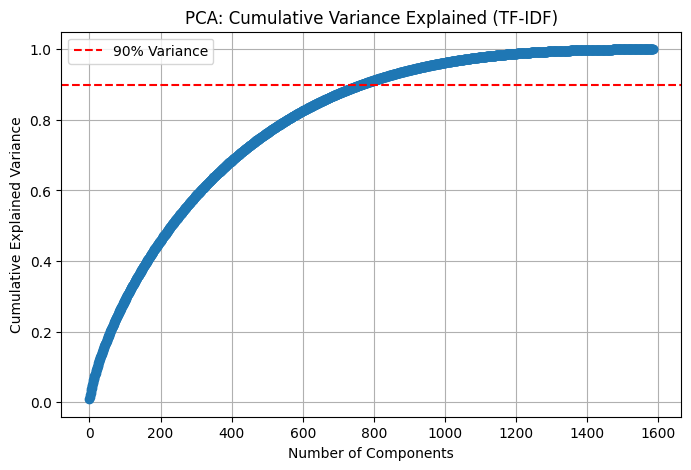

In [164]:
# PCA για visual έλεγχο διασποράς
pca_full = PCA()
pca_full.fit(tfidf_df)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot για να δούμε πόσα components κρατάμε
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Cumulative Variance Explained (TF-IDF)")
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--', label="90% Variance")
plt.legend()
plt.show()

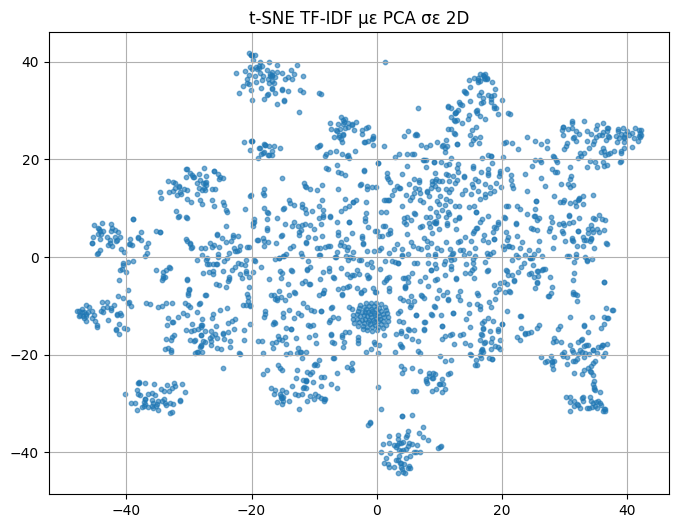

In [170]:
pca_2d = PCA(n_components=20)
tfidf_pca_2d = pca_2d.fit_transform(tfidf_df)

tsne = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
df_tfidf_pca_2d_newsg_pca_tsne = tsne.fit_transform(tfidf_pca_2d)

plt.figure(figsize=(8, 6))
plt.scatter(df_tfidf_pca_2d_newsg_pca_tsne[:, 0], df_tfidf_pca_2d_newsg_pca_tsne[:, 1], s=10, alpha=0.6)
plt.title("t-SNE TF-IDF με PCA σε 2D")
plt.grid(True)
plt.show()

## Παρατήρηση μετά από t-SNE στο TF-IDF με PCA σε 2D

Παρόλο που το **Cumulative Variance Explained** έδειχνε ότι το 90% της πληροφορίας διατηρείται περίπου για **N = 800 components**, η οπτικοποίηση με **t-SNE** σε αυτό τον αριθμό δεν έδειχνε καμία συνοχή στα δεδομένα.

Για τον λόγο αυτό, επέλεξα να μειώσω αισθητά τον αριθμό των components σε **μόλις 20**, ώστε να μπορέσει το t-SNE να αποτυπώσει πιθανές δομές στα δεδομένα. Με αυτόν τον τρόπο, άρχισαν να διαφαίνονται κάποιες ομάδες, παρόλο που η συνολική εικόνα παραμένει θολή.

Παρακάτω παρουσιάζεται η **t-SNE** για **n=800**

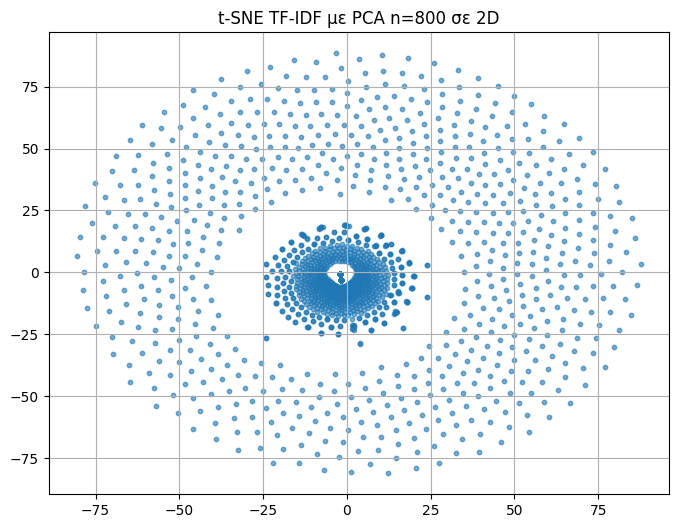

In [169]:
pca_2d = PCA(n_components=800)
tfidf_pca_800 = pca_2d.fit_transform(tfidf_df)

tsne = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
df_tfidf_800_newsg_pca_tsne = tsne.fit_transform(tfidf_pca_800)

plt.figure(figsize=(8, 6))
plt.scatter(df_tfidf_800_newsg_pca_tsne[:, 0], df_tfidf_800_newsg_pca_tsne[:, 1], s=10, alpha=0.6)
plt.title("t-SNE TF-IDF με PCA n=800 σε 2D")
plt.grid(True)
plt.show()

## Παρατήρηση για t-SNE με PCA (TF-IDF)

Αν και από το γράφημα με τη cumulative variance φαινόταν ότι 800 συνιστώσες του PCA κρατούσαν το 90% της πληροφορίας, όταν έβαλα αυτά τα δεδομένα στο t-SNE το αποτέλεσμα ήταν εντελώς συμπιεσμένο, με μια περίεργη κυκλική δομή.

Ίσως αυτή η κυκλική κατανομή να μην έχει νόημα και να οφείλεται σε «σκουπίδια», θόρυβο ή επαναλαμβανόμενες λέξεις χωρίς πληροφορία. Δεν φαίνεται να υπάρχει κάποιος ξεκάθαρος διαχωρισμός.

Αντίθετα, όταν κράτησα μόνο τις 20 πρώτες συνιστώσες από το PCA, το t-SNE έδειξε καλύτερη εικόνα, με αρκετές μικρές ομάδες και πιο ξεκάθαρη κατανομή. Δεν είμαι σίγουρος γιατί, αλλά φαίνεται ότι έτσι βγάζει περισσότερη «δομή» στα δεδομένα.

Ίσως το μεγάλο πλήθος συνιστωσών «πνίγει» το t-SNE και το αναγκάζει να επικεντρώνεται σε λεπτομέρειες χωρίς ουσία.

Η εργασία συνεχίζεται με **n = 20**


Βέλτιστο Silhouette Score: 0.1546 για k = 20


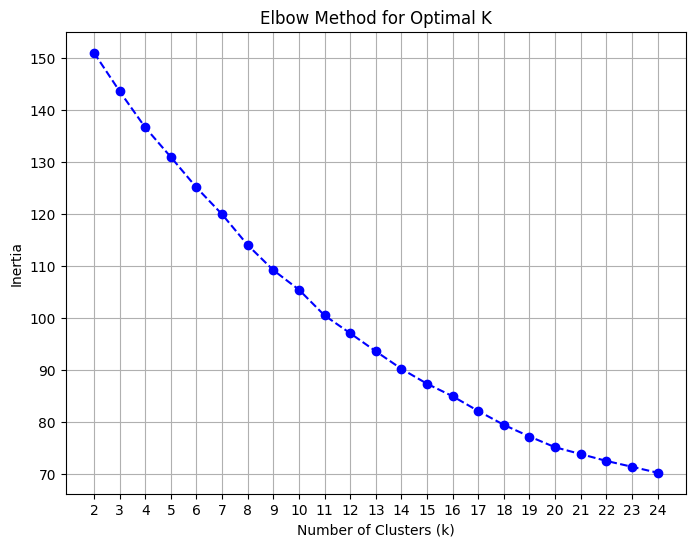

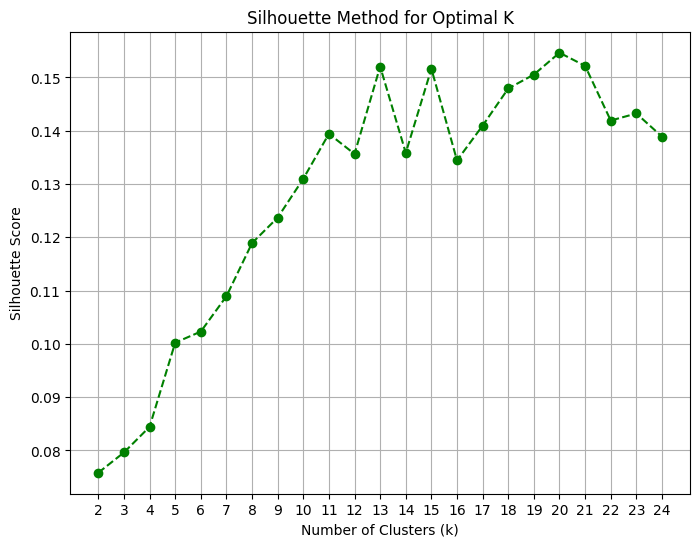

In [176]:
evaluate_kmeans_range(tfidf_pca_2d, k_range=range(2,25), init_method="k-means++", n_init=10, max_iter=300, tol=1e-4, random_state=42)

In [172]:
kmeans_model_newsg_tfidf_pca = run_kmeans(tfidf_pca_2d, n_clusters=20)

Inertia:
 75.1657522886281
Silhouette Score: 0.1546


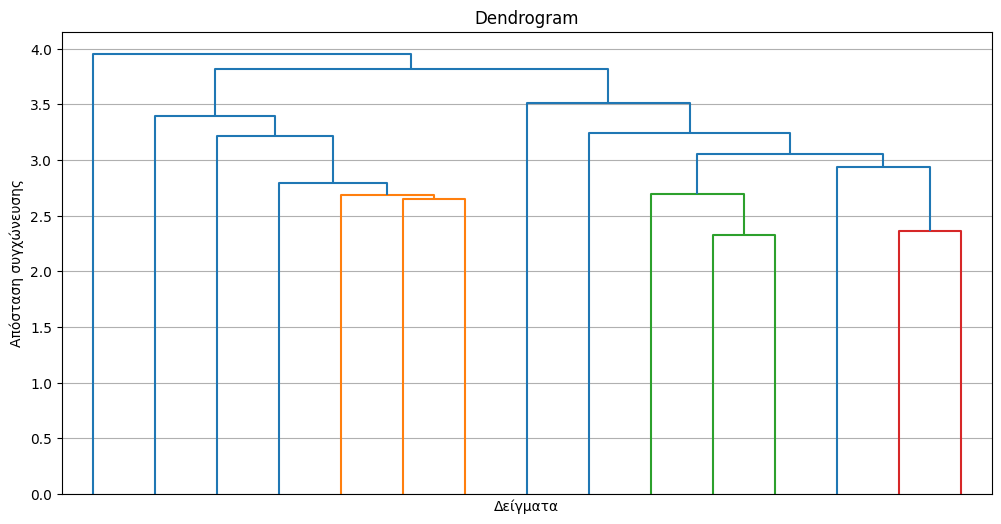

In [173]:
plot_dendrogram_only(tfidf_pca_2d, linkage_method='ward', metric='euclidean', figsize=(12, 6), title="Dendrogram", truncate_lastp=15)


Βέλτιστο Silhouette Score: 0.1878 για k = 2


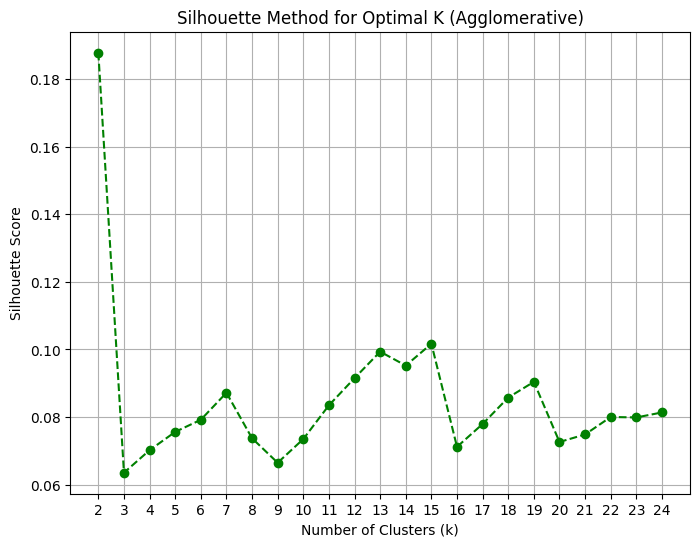

In [177]:
evaluate_agglomerative_range(tfidf_pca_2d, k_range=range(2, 25), linkage='ward', metric='euclidean', show_scores=True)

In [178]:
agg_model_newsg_tfidf_pca = run_agglomerative_clustering(tfidf_pca_2d, n_clusters=2, show_dendrogram=False)


Silhouette Score: 0.1878


In [179]:
hdbscan_model_newsg_tfidf_pca = run_hdbscan_clustering(tfidf_pca_2d, min_cluster_size=7, min_samples=1, compute_score=True, show_probabilities=False)


Silhouette Score (χωρίς τους outliers): 0.2484

Αριθμός clusters: 15
Αριθμός outliers: 1295



KMeans (k = 20):
  NMI: 0.2658
  AMI: 0.2372
  ARI: 0.0638

Agglomerative (k = 2):
  NMI: 0.0620
  AMI: 0.0589
  ARI: 0.0040

HDBSCAN (k = 15):
  NMI: 0.0773
  AMI: 0.0402
  ARI: 0.0019


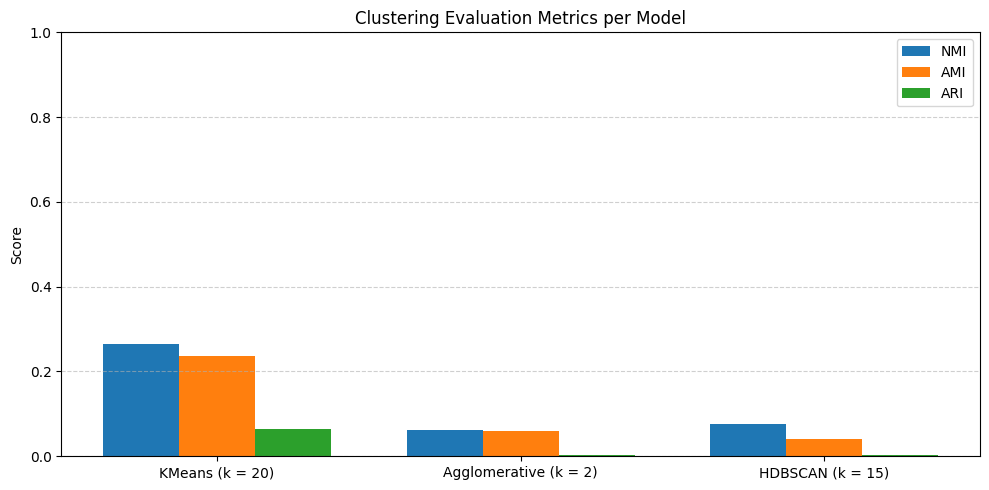

In [183]:
models = [kmeans_model_newsg_tfidf_pca, agg_model_newsg_tfidf_pca, hdbscan_model_newsg_tfidf_pca]
titles = ["KMeans (k = 20)", "Agglomerative (k = 2)", "HDBSCAN (k = 15)"]
true_labels_list = [x_test_news["label"], x_test_news["label"], x_test_news["label"]]

evaluate_clustering_models(true_labels_list, models, titles)

## Αξιολόγηση

Παρατηρείται πως το TF-IDF βοήθησε αισθητά, ειδικά στον αλγόριθμο KMeans, συγκριτικά με τα προηγούμενα αποτελέσματα. Παρόλα αυτά, η συνολική απόδοση παραμένει χαμηλή και οι μετρικές δεν δείχνουν πραγματικά καλή ανακάλυψη θεματικών ομάδων. 

Παρόλο που ο kmeans βρήκε τον σωστό αριθμό clusters οι μετρικες δείχνουν πως μάλλον πρόκειται για τυχαίο γεγονός παρά για ουσιαστική κατανόσηση των δεδομένων.

Στην περίπτωση του HDBSCAN, η απόδοση ήταν αρκετά χαμηλή. Μάλιστα, όταν δοκίμασα με `min_samples=5`, δεν δημιουργούνταν καθόλου clusters — μόνο outliers. Μετά από κάποιες δοκιμές, διαπίστωσα ότι αν το κατεβάσω στο `min_samples=1`, τότε αρχίζουν να σχηματίζονται κάποια clusters, αν και τα αποτελέσματα παραμένουν πολυ κακά.

## Σκέψεις πάνω στις παραμέτρους του TF-IDF

Από όσα παρατήρησα κατά τη διάρκεια των δοκιμών, φαίνεται ότι κάποιες ρυθμίσεις επηρεάζουν αρκετά την ποιότητα του clustering. Δεν είμαι σίγουρος για τον ακριβή τρόπο που επιδρά η κάθε παράμετρος, αλλά βάσει των αποτελεσμάτων, διαμορφώνω τις εξής εντυπώσεις:

    max_df: Ίσως βοηθά να αφαιρούνται λέξεις που είναι υπερβολικά κοινές και εμφανίζονται σχεδόν σε όλα τα έγγραφα, γιατί δεν συμβάλλουν στο να ξεχωρίσουν τα clusters. Όταν το άφηνα πολύ ψηλά, τα αποτελέσματα έδειχναν να χειροτερεύουν.

    min_df: Εδώ φαίνεται πως χρειάζεται κάποια ισορροπία. Αν είναι πολύ μικρό, μπορεί να κρατάει λέξεις που εμφανίζονται ελάχιστα και ίσως είναι απλά θόρυβος. Αντίθετα, αν το ανεβάσω πολύ, ίσως χάνω λέξεις που παίζουν ρόλο στη θεματολογία.

    max_features: Δεν είδα μεγάλη διαφορά όταν το αύξανα, πιθανόν επειδή είχα ήδη φιλτράρει λέξεις με τα min_df και max_df. Όταν το μείωσα πολύ, τα αποτελέσματα επιδεινώθηκαν. Ακόμα κι αν στο t-SNE φαινόντουσαν πιο καθαροί οπτικοί διαχωρισμοί, οι μετρικές παρέμεναν χαμηλές, οπότε ίσως χρειάζεται ένας ενδιάμεσος αριθμός χαρακτηριστικών.

    ngram_range: Δοκίμασα και μόνο unigrams και έως trigrams. Η εντύπωσή μου είναι πως τα (1,2) n-grams έδωσαν τα πιο σταθερά αποτελέσματα.

Συνολικά, χωρίς να μπορώ να εξηγήσω με ακρίβεια γιατί, το TF-IDF με τις παραπάνω ρυθμίσεις έδωσε αισθητά καλύτερα αποτελέσματα από τα embeddings του εκπαιδευμένου FastText μοντέλου.

In [198]:
add_results("20 Newsgroups",
        "TF-IDF",
        "PCA 20",
        "KMeans",
        20,
        0.1546,
        0.2658,
        0.2372,
        0.0638,
        "Πολύ χαμηλά αποτελέσματα")

add_results("20 Newsgroups",
        "TF-IDF",
        "PCA 20",
        "Agglomerative",
        2,
        0.1878,
        0.0620,
        0.0589,
        0.0040,
        "Κακά αποτελέσματα")

add_results("20 Newsgroups",
        "TF-IDF",
        "PCA 20",
        "HDBSCAN",
        15,
        0.2936,
        0.0960,
        0.0574,
        0.0025,
        "Κακά αποτελέσματα")

In [199]:
display(clustering_results_df)

,Dataset,Embedding,Dim_Reduction,Clustering,n_clusters,Silhouette,NMI,AMI,ARI,Notes
0,BBC News dataset,Pretrained Fasttext,None,KMeans,2,0.1539,0.1886,0.1876,0.1299,Χαμηλά αποτελέσματα
1,BBC News dataset,Pretrained Fasttext,None,Agglomerative,2,0.1255,0.3001,0.2993,0.2329,Λίγο καλύτερο από KMeans
2,BBC News dataset,Pretrained Fasttext,None,HDBSCAN,2,0.4357,0.0344,0.0316,0.0013,Πολύ χαμηλά αποτελέσματα
3,BBC News dataset,Pretrained Fasttext,PCA 65,KMeans,2,0.1720,0.1886,0.1876,0.1299,Χαμηλά αποτελέσματα
4,BBC News dataset,Pretrained Fasttext,PCA 65,Agglomerative,2,0.1370,0.4122,0.4115,0.3016,Αρκετή βελτίωση αλλά όχι αρκετή
5,BBC News dataset,Pretrained Fasttext,PCA 65,HDBSCAN,2,0.4751,0.0361,0.0332,0.0012,Κακά αποτελέσματα
6,BBC News dataset,Custom Fasttext SG=0,None,KMeans,2,0.2564,0.1614,0.1604,0.1187,Χαμηλά αποτελέσματα
7,BBC News dataset,Custom Fasttext SG=0,None,Agglomerative,2,0.2903,0.1368,0.1356,0.0370,Χαμηλά αποτελέσματα
8,BBC News dataset,Custom Fasttext SG=0,None,HDBSCAN,3,0.2604,0.1633,0.1604,0.0586,Χαμηλά αποτελέσματα
9,BBC News dataset,Custom Fasttext SG=0,PCA 6,KMeans,2,0.2880,0.1614,0.1604,0.1187,Πολύ χαμηλά αποτελέσματα
